# Scn2a Naive Choice

In [1]:
import glob2 as glob
from datetime import date
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import math
import pandas as pd

## Prepare code for downsampling, scoring, and post-processing

### Prep code for downsampling

In [2]:
key_word = '2024_10_'

commandStart = 'ffprobe -v error -select_streams v -of default=noprint_wrappers=1:nokey=1 -show_entries stream=r_frame_rate "'
commandEnd = '"'

malePath = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Male_Choosing/'
femalePath = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Female_Choosing/'
maleFiles = glob.glob(malePath + '*' + key_word + '*')
femaleFiles = glob.glob(femalePath + '*' + key_word + '*')
fileList = femaleFiles + maleFiles
fileList

['/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Female_Choosing/Scn2a_NC32_2024_10_10_11_43_19.mp4',
 '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Female_Choosing/Scn2a_NC30_2024_10_08_11_44_59.mp4',
 '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Female_Choosing/Scn2a_NC31_2024_10_08_11_45_00.mp4',
 '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Female_Choosing/Scn2a_NC33_2024_10_10_11_43_20.mp4',
 '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Female_Choosing/Scn2a_NC29_2024_10_08_11_44_57.mp4']

In [3]:
## Make scripts for ffprobe (find out what the frame rate is)

nc_ffprobeList = []
for file in fileList:
    ffProbe_command = commandStart + file + commandEnd
    print(ffProbe_command)
    nc_ffprobeList.append(ffProbe_command)

commandFileName = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Downsampled' + 'NC_ffprobe_' + date.today().strftime("%Y%m%d") + '.txt'
with open(commandFileName, 'w') as f:
    for line in nc_ffprobeList:
        f.write(line)
        f.write('\n')
print('****************************************')
print('ffprobe script path: ' + commandFileName)

ffprobe -v error -select_streams v -of default=noprint_wrappers=1:nokey=1 -show_entries stream=r_frame_rate "/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Female_Choosing/Scn2a_NC32_2024_10_10_11_43_19.mp4"
ffprobe -v error -select_streams v -of default=noprint_wrappers=1:nokey=1 -show_entries stream=r_frame_rate "/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Female_Choosing/Scn2a_NC30_2024_10_08_11_44_59.mp4"
ffprobe -v error -select_streams v -of default=noprint_wrappers=1:nokey=1 -show_entries stream=r_frame_rate "/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Female_Choosing/Scn2a_NC31_2024_10_08_11_45_00.mp4"
ffprobe -v error -select_streams v -of default=noprint_wrappers=1:nokey=1 -show_entries stream=r_frame_rate "/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Female_Choosing/Scn2a_NC33_2024_10_10_11_43_20.mp4"
ffprobe -v e

In [4]:
## Make scripts for ffmpeg (for actual downsampling)

nc_ffmpegList = []
outputPath = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Downsampled/'
for file in fileList:
    vidName = file.split('/')[-1]
    ffmpeg_command ='ffmpeg -i ' + file + ' -r 60 -vf scale="iw/4:ih/4" ' + outputPath + vidName[0:-4] + '.scaled.transcoded.mp4'
    
    print(ffmpeg_command)
    nc_ffmpegList.append(ffmpeg_command)

commandFileName = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Downsampled' + 'NC_ffmpeg_' + date.today().strftime("%Y%m%d") + '.txt'
with open(commandFileName, 'w') as f:
    for line in nc_ffmpegList:
        f.write(line)
        f.write('\n')
print('****************************************')
print('ffmpeg script path: ' + commandFileName)

ffmpeg -i /Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Female_Choosing/Scn2a_NC32_2024_10_10_11_43_19.mp4 -r 60 -vf scale="iw/4:ih/4" /Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Downsampled/Scn2a_NC32_2024_10_10_11_43_19.scaled.transcoded.mp4
ffmpeg -i /Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Female_Choosing/Scn2a_NC30_2024_10_08_11_44_59.mp4 -r 60 -vf scale="iw/4:ih/4" /Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Downsampled/Scn2a_NC30_2024_10_08_11_44_59.scaled.transcoded.mp4
ffmpeg -i /Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Female_Choosing/Scn2a_NC31_2024_10_08_11_45_00.mp4 -r 60 -vf scale="iw/4:ih/4" /Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Downsampled/Scn2a_NC31_2024_10_08_11_45_00.scaled.transcoded.mp4
ffmpeg -i /Users/joshs

In [9]:
key_word = '.mp4'

commandStart = 'ffprobe -v error -select_streams v -of default=noprint_wrappers=1:nokey=1 -show_entries stream=r_frame_rate "'
commandEnd = '"'

videoPath = '/Users/joshsteighner/Library/CloudStorage/Box-Box/OxtR_cFos/videos/'
fileList = glob.glob(videoPath + '*' + key_word + '*')
fileList

['/Users/joshsteighner/Library/CloudStorage/Box-Box/OxtR_cFos/videos/Pair08_KOM_Stranger_20241016_133944.mp4',
 '/Users/joshsteighner/Library/CloudStorage/Box-Box/OxtR_cFos/videos/Pair07_KOF_Partner_20240911_132049.scaled.transcoded.mp4',
 '/Users/joshsteighner/Library/CloudStorage/Box-Box/OxtR_cFos/videos/Pair05_WTM_Stranger_20240911_122457.mp4',
 '/Users/joshsteighner/Library/CloudStorage/Box-Box/OxtR_cFos/videos/Pair06_WTM_Partner_20240911_124515.mp4',
 '/Users/joshsteighner/Library/CloudStorage/Box-Box/OxtR_cFos/videos/Pair01_WTF_Partner_20240814_120424.mp4',
 '/Users/joshsteighner/Library/CloudStorage/Box-Box/OxtR_cFos/videos/Pair01_WTF_Partner_20240814_120424.scaled.transcoded.mp4',
 '/Users/joshsteighner/Library/CloudStorage/Box-Box/OxtR_cFos/videos/Pair04_KOM_Partner_20240906_123411.scaled.transcoded.mp4',
 '/Users/joshsteighner/Library/CloudStorage/Box-Box/OxtR_cFos/videos/Pair06_WTM_Partner_20240911_124515.scaled.transcoded.mp4',
 '/Users/joshsteighner/Library/CloudStorage/Bo

In [10]:

## Make scripts for ffprobe (find out what the frame rate is)

oxtr_ffprobeList = []
for file in fileList:
    if not file.endswith('transcoded.mp4'):
        ffProbe_command = commandStart + file + commandEnd
        print(ffProbe_command)
        oxtr_ffprobeList.append(ffProbe_command)

commandFileName = videoPath + 'oxtr_ffprobe_' + date.today().strftime("%Y%m%d") + '.txt'
with open(commandFileName, 'w') as f:
    for line in oxtr_ffprobeList:
        f.write(line)
        f.write('\n')
print('****************************************')
print('ffprobe script path: ' + commandFileName)

oxtr_ffmpegList = []
outputPath = videoPath
for file in fileList:
    if not file.endswith('transcoded.mp4'):
        vidName = file.split('/')[-1]
        ffmpeg_command ='ffmpeg -i ' + file + ' -r 60 -vf scale="iw/4:ih/4" ' + outputPath + vidName[0:-4] + '.scaled.transcoded.mp4'
        
        print(ffmpeg_command)
        oxtr_ffmpegList.append(ffmpeg_command)

commandFileName =  videoPath + 'oxtr_ffmpeg_' + date.today().strftime("%Y%m%d") + '.txt'
with open(commandFileName, 'w') as f:
    for line in oxtr_ffmpegList:
        f.write(line)
        f.write('\n')
print('****************************************')
print('ffmpeg script path: ' + commandFileName)

ffprobe -v error -select_streams v -of default=noprint_wrappers=1:nokey=1 -show_entries stream=r_frame_rate "/Users/joshsteighner/Library/CloudStorage/Box-Box/OxtR_cFos/videos/Pair08_KOM_Stranger_20241016_133944.mp4"
ffprobe -v error -select_streams v -of default=noprint_wrappers=1:nokey=1 -show_entries stream=r_frame_rate "/Users/joshsteighner/Library/CloudStorage/Box-Box/OxtR_cFos/videos/Pair05_WTM_Stranger_20240911_122457.mp4"
ffprobe -v error -select_streams v -of default=noprint_wrappers=1:nokey=1 -show_entries stream=r_frame_rate "/Users/joshsteighner/Library/CloudStorage/Box-Box/OxtR_cFos/videos/Pair06_WTM_Partner_20240911_124515.mp4"
ffprobe -v error -select_streams v -of default=noprint_wrappers=1:nokey=1 -show_entries stream=r_frame_rate "/Users/joshsteighner/Library/CloudStorage/Box-Box/OxtR_cFos/videos/Pair01_WTF_Partner_20240814_120424.mp4"
ffprobe -v error -select_streams v -of default=noprint_wrappers=1:nokey=1 -show_entries stream=r_frame_rate "/Users/joshsteighner/Libr

### Prep code for parameters

In [351]:
# Make list of folders containing parameters files, import and combine totals into one dataframe
AJ_Path = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/ContoursAndParameters/'
AJ_subfolders = glob.glob(parentPath+'*/')
VN_path = ['/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/VN_Results/contour_pipeline/']
folderlist = AJ_subfolders + VN_path

NC_parameters = []
for path in folderlist: NC_parameters = NC_parameters + glob.glob(path + '*' + '.parameters')

parameter_list = []
for path in NC_parameters: 
    tmp_df = pd.read_csv(path)
    fname = path.split('/')[-1]
    if fname != 'PPTclip.top.parameters':
    
        if 'ContoursAndParameters' in path: tmp_df.insert(0,'scorer',['AJ'])
        elif 'VN_Results' in path: tmp_df.insert(0,'scorer',['VN'])

        tmp_df.insert(0,'filename',[fname])
        tmp_df.insert(0,"NC_ID",[fname.split('_')[1]])
        tmp_df = tmp_df.set_index('NC_ID',drop=True)
        tmp_df = tmp_df[tmp_df.columns[0:-1]]
        parameter_list.append(tmp_df)
NC_parameter = pd.concat(parameter_list)
NC_parameter

,filename,scorer,ROI_CORNERS,BOUND_LT_X,BOUND_LT_Y,BOUND_LB_X,BOUND_LB_Y,BOUND_RT_X,BOUND_RT_Y,BOUND_RB_X,BOUND_RB_Y,THRESHOLD,CONTOUR_MIN_AREA,CONTOUR_MAX_AREA
NC_ID,,,,,,,,,,,,,,
NC5,Scn2a_NC5_2024_02_12_11_45_28.parameters,AJ,"293,312,1666,273,1662,741,296,765",758,383,764,673,1180,360,1201,670,54,795.700572,78402.582769
NC9,Scn2a_NC9_2024_02_14_11_43_11.parameters,AJ,"216,293,1589,316,1579,785,209,742",687,385,706,651,1077,394,1076,662,50,844.158736,61430.475118
NC10,Scn2a_NC10_2024_02_14_11_43_09.parameters,AJ,"229,464,1631,453,1628,934,222,908",725,525,739,818,1122,515,1131,824,48,1007.969678,43657.491768
NC14,Scn2a_NC14_2024_03_12_11_43_29_2.parameters,AJ,"184,297,1583,285,1576,727,209,765",670,350,680,658,1071,371,1082,646,52,897.946763,58505.214398
NC1,Scn2a_NC1_2024_02_09_11_44_18.parameters,AJ,"262,184,1649,206,1659,654,254,656",748,308,751,583,1149,319,1154,597,46,609.838232,53065.954103
NC2,Scn2a_NC2_2024_02_09_11_44_19.parameters,AJ,"267,428,1651,420,1633,885,251,880",731,479,745,778,1161,493,1167,807,50,710.595272,61430.475118
NC16,Scn2a_NC16_2024_04_17_11_45_49.parameters,VN,"225,241,1616,229,1617,295,1602,298,1599,367,16...",732,420,743,611,1091,420,1100,609,58,1239.675564,61506.026156
NC18,Scn2a_NC18_2024_04_17_11_45_45.parameters,VN,"296,352,1660,339,1661,425,1643,430,1647,542,16...",780,496,781,706,1149,494,1149,695,58,1239.675564,61430.475118
NC12,Scn2a_NC12_2024_03_12_11_43_24.parameters,VN,"309,332,1672,311,1673,458,1656,467,1659,595,16...",801,456,814,671,1164,451,1164,661,58,1255.988448,58505.214398


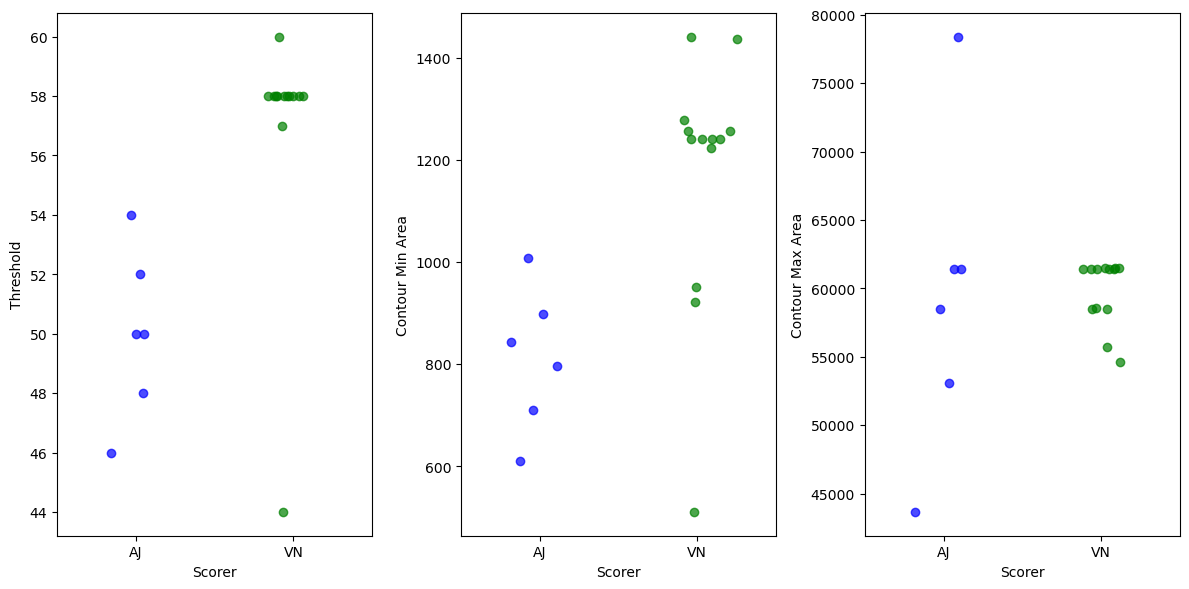

In [380]:
AJ_data = NC_parameter[NC_parameter['scorer']=='AJ'][NC_parameter.columns[-3:]]
VN_data = NC_parameter[NC_parameter['scorer']=='VN'][NC_parameter.columns[-3:]]

jitter = 0.075
df_AJ_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=AJ_data.values.shape), columns=AJ_data.columns,index = AJ_data.index)
df_AJ_jitter += [0,0,0] 
df_VN_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=VN_data.values.shape), columns=VN_data.columns,index = VN_data.index)
df_VN_jitter += [1,1,1] 


fig, axs = plt.subplots(1,3,figsize=(12,6))
axs[0].scatter(df_AJ_jitter['THRESHOLD'],AJ_data['THRESHOLD'],c='b',alpha=0.7)
axs[0].scatter(df_VN_jitter['THRESHOLD'],VN_data['THRESHOLD'],c='g',alpha=0.7)
axs[0].set_xticks([0,1],['AJ','VN'])
axs[0].set_xlim([-0.5,1.5])
axs[0].set_xlabel('Scorer')
axs[0].set_ylabel('Threshold')

axs[1].scatter(df_AJ_jitter['CONTOUR_MIN_AREA'],AJ_data['CONTOUR_MIN_AREA'],c='b',alpha=0.7)
axs[1].scatter(df_VN_jitter['CONTOUR_MIN_AREA'],VN_data['CONTOUR_MIN_AREA'],c='g',alpha=0.7)
axs[1].set_xticks([0,1],['AJ','VN'])
axs[1].set_xlim([-0.5,1.5])
axs[1].set_xlabel('Scorer')
axs[1].set_ylabel('Contour Min Area')

axs[2].scatter(df_AJ_jitter['CONTOUR_MAX_AREA'],AJ_data['CONTOUR_MAX_AREA'],c='b',alpha=0.7)
axs[2].scatter(df_VN_jitter['CONTOUR_MAX_AREA'],VN_data['CONTOUR_MAX_AREA'],c='g',alpha=0.7)
axs[2].set_xticks([0,1],['AJ','VN'])
axs[2].set_xlim([-0.5,1.5])
axs[2].set_xlabel('Scorer')
axs[2].set_ylabel('Contour Max Area')
fig.tight_layout()


### Prep code for scoring

In [91]:
homeFolder = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/JS_results/'
videoList = glob.glob(homeFolder+'*scaled.transcoded.mp4')

commandList = []
for video in videoList:
    filename = video.split('/')[-1].split('.')[0]
    if int(filename.split('_')[1][2:]) > 25:
        print('writing code for '+filename+'...')
        for command in ['prep', 'detect', 'trace','edit','readout']:
            commandList.append('sh '+ command +'.sh '+ filename)

commandFileName = homeFolder + 'NC_score_' + date.today().strftime("%Y%m%d") + '.txt'
with open(commandFileName, 'w') as f:
    for line in commandList:
        f.write(line)
        f.write('\n')
print('****************************************')
print('score script path: ' + commandFileName)


writing code for Scn2a_NC29_2024_10_08_11_44_57...
writing code for Scn2a_NC32_2024_10_10_11_43_19...
writing code for Scn2a_NC30_2024_10_08_11_44_59...
writing code for Scn2a_NC33_2024_10_10_11_43_20...
writing code for Scn2a_NC31_2024_10_08_11_45_00...
****************************************
score script path: /Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/JS_results/NC_score_20241119.txt


In [28]:
resolvedPath = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/JS_results/Scn2a_NC22_2024_08_27_11_46_38.resolved2.contours'
with open(resolvedPath) as resolved: 
    lines=resolved.readlines()
errors = []
edited = []
for line in lines:
    if (',vole_c' in line) and ('vole_l+vole_c' in line):
        new_line = line.replace("vole_l+vole_c","vole_l")
        #errors.append(line)
        edited.append(new_line)
    else: edited.append(line)

fname = resolvedPath.split('.')[0]+'.resolved3.contours'
with open(fname, 'w') as f:
    for line in edited:
        f.write(line)


In [31]:
resolvedPath = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/JS_results/Scn2a_NC22_2024_08_27_11_46_38.resolved3.contours'
with open(resolvedPath) as resolved: 
    lines=resolved.readlines()
errors = []
edited = []
for line in lines:
    if (',vole_c' in line) and ('vole_l+vole_c' in line):
        new_line = line.replace("vole_l+vole_c","vole_l")
        errors.append(line)
        edited.append(new_line)
    else: edited.append(line)
print(len(errors))

0


### Prep code for generating readouts

In [76]:
def contour_readout_script(path,keyword='',fullpath=False):

    videoList = glob.glob(contourPath + '*' + 'resolved.contours')
    fnameList = [video.split('/')[-1].split('.')[0] for video in videoList]

    nc_readoutList = []
    for f in fnameList:
        if fullpath==False:
            fname = f
        elif fullpath==True:
            fname = path+f
        
        print('making script for '+fname+'...')
        resolvedList = glob.glob(contourPath + '*' + f +'*resolved*')
        if len(resolvedList) == 0: print('Error: no resolved files!')
        elif len(resolvedList) == 1: Nres = ''
        else: Nres = np.max([int(res.split('/')[-1].split('.')[1][-1]) for res in resolvedList if res.split('/')[-1].split('.')[1][-1] != 'd'])

        script = 'python analyze_ppt/generate_readout.py --resolved_contours '+fname+'.resolved'+str(Nres)+'.contours --output '+\
        fname+'.readout.csv --jobfile '+fname+'.parameters --input_video '+fname+'.scaled.transcoded.mp4 --frame_index '+\
        fname+'.frameindex --chamber_time_output '+fname+'.chamber.time.csv --output_grouped '+fname+'.chamber.grouped.time.csv'

        nc_readoutList.append(script)

    return nc_readoutList

def export_commands(filename, mylist):
    with open(filename, 'w') as f:
        for line in mylist:
            f.write(line)
            f.write('\n')
    print('****************************************')
    print('readout script path: ' + filename)


In [77]:
contourPath = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/VN_Results/contour_pipeline/'

VN_nc_readoutList = contour_readout_script(contourPath)
commandFileName = contourPath + 'NC_readoutscript_' + date.today().strftime("%Y%m%d") +'.sh'
export_commands(commandFileName,VN_nc_readoutList)

making script for Scn2a_NC12_2024_03_12_11_43_24...
making script for Scn2a_NC13_2024_03_12_11_43_26...
making script for Scn2a_NC6_2024_02_12_11_45_29...
making script for Scn2a_NC19_2024_04_19_11_45_11...
making script for Scn2a_NC5_2024_02_12_11_45_28...
making script for Scn2a_NC8_2024_02_14_11_43_14...
making script for Scn2a_NC16_2024_04_17_11_45_49...
making script for Scn2a_NC17_2024_04_17_11_45_50...
making script for Scn2a_NC20_2024_04_19_11_45_13...
making script for Scn2a_NC15_2024_04_17_11_45_52...
making script for Scn2a_NC18_2024_04_17_11_45_45...
making script for Scn2a_NC11_2024_02_14_11_43_05...
making script for Scn2a_NC4_2024_02_12_11_45_27...
****************************************
readout script path: /Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/VN_Results/contour_pipeline/NC_readoutscript_20241114.sh


In [4]:
contourPath = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/JS_results/'

JS_nc_readoutList = contour_readout_script(contourPath)
commandFileName = contourPath + 'NC_readoutscript_' + date.today().strftime("%Y%m%d") +'.sh'
export_commands(commandFileName,JS_nc_readoutList)

making script for Scn2a_NC24_2024_08_29_11_45_45...
making script for Scn2a_NC22_2024_08_27_11_46_38...
making script for Scn2a_NC25_2024_08_29_11_45_46...
****************************************
readout script path: /Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/JS_results/NC_readoutscript_20241113.sh


This script can be run by navigating to the counters pipeline folder, activating the contour environment, and typing: \
sh NC_readoutscript_20240930.sh

In [94]:
parentPath = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/ContoursAndParameters/'
subfolders = glob.glob(parentPath+'*/')

AJ_nc_readoutlist = []
for contourPath in subfolders:
    if not contourPath.endswith('partially done/'): 
        AJ_nc_readout = contour_readout_script(contourPath,fullpath=True)
        #print(AJ_nc_readout)
        AJ_nc_readoutlist.append(AJ_nc_readout[0])

commandFileName = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/VN_Results/contour_pipeline/'+ 'NC_readoutscript_' \
+ date.today().strftime("%Y%m%d") +'_2'+'.sh'
export_commands(commandFileName,AJ_nc_readoutlist)

making script for /Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/ContoursAndParameters/Scn2a_NC9_2024_02_14_11_43_11/Scn2a_NC9_2024_02_14_11_43_11...
making script for /Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/ContoursAndParameters/Scn2a_NC10_2024_02_14_11_43_09/Scn2a_NC10_2024_02_14_11_43_09...
making script for /Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/ContoursAndParameters/Scn2a_NC14_2024_03_12_11_43_29/Scn2a_NC14_2024_03_12_11_43_29_2...
making script for /Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/ContoursAndParameters/Scn2a_NC1_2024_02_09_11_44_18/Scn2a_NC1_2024_02_09_11_44_18...
making script for /Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/ContoursAndParameters/Scn2a_NC2_2024_02_09_11_44_19/Scn2a_NC2_2024_02_09_11_44_19...
****************************************
readout 

## Analyzing readout CSVs

### Copying all readout files into one folder

In [86]:
import glob2 as glob
import shutil

def copyFiles(pathList, destinationPath):
    for filepath in pathList: 
        shutil.copyfile(filepath,destinationPath+filepath.split('/')[-1])
        print('...copying '+filepath.split('/')[-1]+' to '+'/'.join(destinationPath.split('/')[-4:-1]))
    print('Completed.')

In [87]:
# Make list of folders containing csvs, import and combine totals into one dataframe
AJ_Path = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/ContoursAndParameters/'
AJ_subfolders = glob.glob(AJ_Path+'*/')
VN_path = ['/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/VN_Results/contour_pipeline/']
JS_path = ['/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/JS_results/']
folderlist = AJ_subfolders + VN_path + JS_path

NC_chambertime = []
NC_grouped = []
NC_readout = []
for path in folderlist: 
    NC_chambertime = NC_chambertime + glob.glob(path + '*' + 'chamber.time.csv')
    NC_grouped = NC_grouped + glob.glob(path + '*' + 'chamber.grouped.time.csv')
    NC_readout = NC_readout + glob.glob(path + '*' + 'readout.csv')
destination = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Readouts/'
for pathList in [NC_chambertime, NC_grouped, NC_readout]: copyFiles(pathList, destination)


...copying Scn2a_NC9_2024_02_14_11_43_11.chamber.time.csv to Scn2a_X1Behavior_Nov22/Naive_Choice/Readouts
...copying Scn2a_NC10_2024_02_14_11_43_09.chamber.time.csv to Scn2a_X1Behavior_Nov22/Naive_Choice/Readouts
...copying Scn2a_NC14_2024_03_12_11_43_29_2.chamber.time.csv to Scn2a_X1Behavior_Nov22/Naive_Choice/Readouts
...copying Scn2a_NC1_2024_02_09_11_44_18.chamber.time.csv to Scn2a_X1Behavior_Nov22/Naive_Choice/Readouts
...copying Scn2a_NC2_2024_02_09_11_44_19.chamber.time.csv to Scn2a_X1Behavior_Nov22/Naive_Choice/Readouts
...copying Scn2a_NC6_2024_02_12_11_45_29.chamber.time.csv to Scn2a_X1Behavior_Nov22/Naive_Choice/Readouts
...copying Scn2a_NC20_2024_04_19_11_45_13.chamber.time.csv to Scn2a_X1Behavior_Nov22/Naive_Choice/Readouts
...copying Scn2a_NC19_2024_04_19_11_45_11.chamber.time.csv to Scn2a_X1Behavior_Nov22/Naive_Choice/Readouts
...copying Scn2a_NC17_2024_04_17_11_45_50.chamber.time.csv to Scn2a_X1Behavior_Nov22/Naive_Choice/Readouts
...copying Scn2a_NC15_2024_04_17_11_45_

### Adjusting total time in chambertime files using trimmed grouped files, adding latencies, durations, and counts to chambertimes

In [161]:
def import_grouped(path):
    grouped = pd.read_csv(path,index_col='serial_number')
    colPrefix = ['_'.join(col.split('_')[:-1]) for col in grouped.columns]
    colPrefix = list(set(colPrefix))
    
    for pref in colPrefix:
        start_col = pref+'_start'
        stop_col = pref+'_stop'
    
        durs = grouped[stop_col] - grouped[start_col]
        col_name = pref+'_duration'
        col_num = list(grouped.columns).index(stop_col)+1
    
        grouped.insert(col_num,col_name,durs)

    return grouped

def add_latencies_counts_durations(chambertime, grouped):
    start_cols = [col for col in grouped.columns if col.endswith('start')]
    start_adj = np.min(grouped.loc[0,start_cols])
    
    maxDurations = []
    latencies = []
    counts = []
    for row in chambertime.index:
        if row not  in ['Huddle_Unknown','Huddle_Center','Known']:
            durcol = row+'_duration'
            #print(durcol + ': ' +str(np.max(grouped.loc[:,durcol])))
            maxDurations.append(np.max(grouped.loc[:,durcol]))
            counts.append(int(np.sum(np.logical_not(np.isnan(grouped[durcol])))))
            latcol = row+'_start'
            #print(latcol + ': ' +str(np.min(grouped.loc[:,latcol])-start_adj))
            latencies.append(np.min(grouped.loc[:,latcol])-start_adj)
        else:
            maxDurations.append(np.nan)
            latencies.append(np.nan)
            counts.append(np.nan)
    chambertime.insert(1, 'maximum_duration_s',maxDurations)
    chambertime.insert(1, 'latency_s',latencies)
    chambertime.insert(1, 'count',counts)
    return chambertime

def edit_chambertime(groupedPath,grouped,overwrite=True):
    # calculate sums for each duration column
    duration_cols = [col for col in grouped.columns if col.endswith('duration')]
    sums = grouped[duration_cols].sum()
    for idx in sums.index: sums = sums.rename(index={idx: idx[0:-9]})
    for side in ['Right','Left']: sums[side] = sums['Huddle_'+side]+sums[side]

    # import chambertime csv
    fname = groupedPath.split('/')[-1].split('.')[0]
    folder = '/'.join(groupedPath.split('/')[0:-1])+'/'
    chambertimePath = folder+fname+'.chamber.time.csv'
    chambertime = pd.read_csv(chambertimePath,index_col = 'chamber')

    # insert new column with adjusted values
    if 'time_adjusted_s' in chambertime.columns:
        num_cols = len([col for col in chambertime.columns if col.startswith('time_adjusted_s')])
        print('time_adjusted_exists...creating time_adjusted_s'+str(num_cols))
        chambertime.insert(0,'time_adjusted_s'+str(num_cols),sums)
    else:
        chambertime.insert(0,'time_adjusted_s',sums)

    chambertime = chambertime.fillna(0)
    
    known = [np.sum(chambertime.loc[['Center','Left','Right'],col]) for col in chambertime.columns]
    chambertime.loc['Known'] = known

    chambertime = add_latencies_counts_durations(chambertime, grouped)
    
    if overwrite==True: 
        chambertime.to_csv(chambertimePath)
        print('saving to '+chambertimePath)
        
    return chambertime

def import_grouped_and_edit_chambertime(groupedPath):
    grouped = import_grouped(groupedPath)
    chambertime = edit_chambertime(groupedPath,grouped,overwrite=True)
    return grouped, chambertime

In [177]:
readouts = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Readouts/'
groupPathlist = glob.glob(readouts+'*grouped*csv')
groupList = []
for groupedPath in groupPathlist: 
    pairID = groupedPath.split('/')[-1].split('_')[1]
    print('starting '+pairID + '...')
    grouped,chambertime = import_grouped_and_edit_chambertime(groupedPath)
    grouped.index = grouped.index.rename(pairID)
    groupList.append(grouped)
print('Completed')

starting NC6...
saving to /Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Readouts/Scn2a_NC6_2024_02_12_11_45_29.chamber.time.csv
starting NC25...
saving to /Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Readouts/Scn2a_NC25_2024_08_29_11_45_46.chamber.time.csv
starting NC18...
saving to /Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Readouts/Scn2a_NC18_2024_04_17_11_45_45.chamber.time.csv
starting NC22...
saving to /Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Readouts/Scn2a_NC22_2024_08_27_11_46_38.chamber.time.csv
starting NC10...
saving to /Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Readouts/Scn2a_NC10_2024_02_14_11_43_09.chamber.time.csv
starting NC24...
saving to /Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Readouts/Scn2a_NC24_2024_08_29_11_45_45

### Importing chambertime and adding to larger dataframe

In [302]:
def import_NC_metadata(metadatapath):
    metadata_NC = pd.read_excel(metadatapath, usecols = 'B:E,X:AQ')
    metadata_NC = metadata_NC[1:].reset_index(drop=True)
    NC_IDs = [ID.split('_')[-1] for ID in metadata_NC['Notes']]
    metadata_NC.insert(0, 'NC_ID',NC_IDs)
    metadata_NC = metadata_NC.set_index('NC_ID')
    NC = [int(idx.replace('NC','')) for idx in metadata_NC.index]
    metadata_NC.insert(0, 'NC', NC)
    metadata_NC = metadata_NC.sort_values('NC')
    return metadata_NC

In [300]:
def import_NC_chambertime_new(path,time_col = 'time_adjusted_s'):
    
    raw_df = pd.read_csv(path,index_col=0)
    raw_df = pd.DataFrame(raw_df[time_col])
    raw_df = raw_df.transpose()
    ID = path.split('/')[-1].split('_')[1]
    raw_df.insert(0, "NC_ID", [ID])
    raw_df = raw_df.set_index('NC_ID').fillna(0)
    raw_df = raw_df.add_suffix('_sec')
    return raw_df

def create_proportion_DF(raw_df):
    cols = [col for col in raw_df.columns if 'nown' not in col]
    total_time_known = raw_df.loc[raw_df.index[0],'Known_sec']
    new_cols = []
    proportions = []
    for col in cols:
        new_cols.append(col.replace('sec','prop'))
        proportions.append(raw_df.loc[raw_df.index[0],col]/total_time_known)
    propDF = pd.DataFrame(data={raw_df.index[0]: proportions},index=new_cols)
    propDF = propDF.transpose()
    return propDF

def subset_DF(path, col,rows = ['Center','Huddle_Center','Right','Huddle_Right','Left','Huddle_Left']):
    DF = pd.read_csv(path,index_col=0)
    DF = pd.DataFrame(DF.loc[rows,col])
    DF = DF.transpose()
    ID = path.split('/')[-1].split('_')[1]
    DF.insert(0, "NC_ID", [ID])
    DF = DF.set_index('NC_ID').fillna(0)
    if col == 'latency_s': suffix = '_lat'
    elif col == 'count': suffix = '_ct'
    DF = DF.add_suffix(suffix)
    return DF

def import_and_process_chambertime(path):
    raw_df = import_NC_chambertime_new(path)
    propDF = create_proportion_DF(raw_df)
    countDF = subset_DF(path, col = 'count')
    latencyDF = subset_DF(path, col = 'latency_s')
    fullRow = pd.concat([raw_df,propDF,countDF,latencyDF], axis=1)
    fullRow = fullRow.sort_index(axis=1)
    return fullRow

def import_and_merge_chambertime(readout_path):
    chambertimeList = glob.glob(readout_path+'*chamber.time*csv')
    chambertimeDFlist = []
    for path in chambertimeList: chambertimeDFlist.append(import_and_process_chambertime(path))
    NC_chambertime = pd.concat(chambertimeDFlist,axis=0)
    NC = [int(idx.replace('NC','')) for idx in NC_chambertime.index]
    NC_chambertime.insert(0, 'NC', NC)
    NC_chambertime = NC_chambertime.sort_values('NC')
    return NC_chambertime

In [306]:
def add_metadata_to_df(chambertimeDF, metadataDF):
    # Add Het chamber location from metadata
    Het_Chambers = []
    Het_Sex = []
    for row in chambertimeDF.iterrows():
        if metadataDF[metadataDF.index==row[0]]['RightChamberGenotype'].values == 'HT': 
            Het_Chambers.append('Right')
        elif metadataDF[metadataDF.index==row[0]]['LeftChamberGenotype'].values == 'HT': 
            Het_Chambers.append('Left')
        
        if metadataDF[metadataDF.index==row[0]]['Sex'].values[0].startswith('M'): 
            Het_Sex.append('F')
        elif metadataDF[metadataDF.index==row[0]]['Sex'].values[0].startswith('F'): 
            Het_Sex.append('M')
    chambertimeDF.insert(1, 'Het_Sex', Het_Sex)
    chambertimeDF.insert(2, 'Het_Side', Het_Chambers)
    return chambertimeDF


In [308]:
def preferenceIndex(a,b):
    # a is stimulus to be represented as +1, b is stimulus to be represented as -1
    ab_diff = a - b
    ab_sum = a + b
    if ab_sum == 0: PI = 0
    else: PI = ab_diff/ab_sum
    
    return PI

In [315]:
# Import metadata (excel formatted according to current metadata guidelines, using PPT columns for NC)
metadatapath = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/241114_NC_metadata_NWB.xlsx'
metadata_NC = import_NC_metadata(metadatapath)
metadata_NC.head(1)

,NC,Notes,Sex,Line,Genotype,PPTDate,PPTNotes,RightChamberEartag,RightChamberDOB,RightChamberLine,...,LeftChamberDOB,LeftChamberLine,LeftChamberGenotype,LeftChamberBreeder,LeftChamberEarTagSide,LeftChamberType,PPTRoom,PPTExperimenter,PPTScorer,IncludeAnimalPPT
NC_ID,,,,,,,,,,,,,,,,,,,,,
NC1,1,Scn2a_NC1,F,Behavior,WT,20240209.0,lane 1,B8308,NaN,Scn2A,...,NaN,Scn2A,HT,NaN,ETR,NaN,NaN,GW,AJ,NaN


In [370]:
readouts = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Readouts/'
NC_chambertime = import_and_merge_chambertime(readouts)
NC_chambertime = add_metadata_to_df(NC_chambertime, metadata_NC)
side_PI = []
for row in NC_chambertime.iterrows(): side_PI.append(preferenceIndex(row[1]['Huddle_Left_sec'],row[1]['Huddle_Right_sec']))
NC_chambertime.insert(30, 'Huddle_LR_PI',side_PI)
NC_chambertime.head()

,NC,Het_Sex,Het_Side,Center_ct,Center_lat,Center_prop,Center_sec,Huddle_Center_ct,Huddle_Center_lat,Huddle_Center_prop,...,Left_ct,Left_lat,Left_prop,Left_sec,Right_ct,Right_lat,Right_prop,Right_sec,Unknown_sec,Huddle_LR_PI
NC1,1,M,Left,68.0,0.0,0.023886,517.466664,0.0,0.0,0.000000,...,716.0,372.083333,0.946579,20506.650006,251.0,292.516667,0.029535,639.850000,0.000000,0.954287
NC2,2,M,Right,129.0,0.0,0.060288,1305.050008,0.0,0.0,0.000000,...,989.0,346.333333,0.671845,14543.299987,493.0,47.350000,0.267866,5798.450005,0.000000,0.948025
NC4,4,F,Right,338.0,0.0,0.112434,2447.416667,0.0,0.0,0.000000,...,774.0,3.166667,0.569360,12393.633333,1111.0,89.883333,0.318206,6926.600000,0.000000,0.446484
NC5,5,F,Left,192.0,0.0,0.049301,1072.816667,0.0,0.0,0.000063,...,787.0,49.833333,0.199610,4343.616667,1505.0,41.333333,0.751089,16344.050000,2.383333,-0.584727
NC6,6,F,Left,260.0,0.0,0.068117,1481.516676,0.0,0.0,0.000000,...,1040.0,75.450000,0.784255,17057.299996,456.0,1.583333,0.147628,3210.866658,0.000000,0.909729


### Adding genotype columns

In [363]:
def create_genotype_df(chambertimeDF):
    # name columns
    left_columns = [col for col in chambertimeDF.columns if 'Left' in col]
    right_columns = [col.replace('Left','Right') for col in left_columns]
    WT_columns = [col.replace('Left','WT') for col in left_columns]
    HT_columns = [col.replace('Left','HT') for col in left_columns]

    # extract left/right columns from main dataframe for ease of use/visualization
    LeftRightDF = chambertimeDF.loc[:,['Het_Side']+left_columns+right_columns]
    
    # for each row, use het side to determine which side is for which genotype
    for row in LeftRightDF.iterrows():
        if row[0] == 'NC1':
            if row[1]['Het_Side'] == 'Left':
                HT_data = row[1][left_columns]
                WT_data = row[1][right_columns]
            elif row[1]['Het_Side'] == 'Right':
                HT_data = row[1][right_columns]
                WT_data = row[1][left_columns]
            WT_df = pd.DataFrame([(WT_data.values)], columns= WT_columns,index = [row[0]]) # keeping columns in the correct order, create a new df with WT column names
            HT_df = pd.DataFrame([(HT_data.values)], columns= HT_columns,index = [row[0]]) # keeping columns in the correct order, create a new df with Het column names
            genotype_df = pd.concat([WT_df,HT_df],axis=1) # merge WT and Het dfs into one longer row
        else:
            if row[1]['Het_Side'] == 'Left':
                HT_data = row[1][left_columns]
                WT_data = row[1][right_columns]
            elif row[1]['Het_Side'] == 'Right':
                HT_data = row[1][right_columns]
                WT_data = row[1][left_columns]
            WT_df = pd.DataFrame([(WT_data.values)], columns= WT_columns,index = [row[0]])
            HT_df = pd.DataFrame([(HT_data.values)], columns= HT_columns,index = [row[0]])
            row_df = pd.concat([WT_df,HT_df],axis=1)
            genotype_df = pd.concat([genotype_df,row_df],axis=0) # add longer rows vertically
    return genotype_df

In [371]:
genotype_df = create_genotype_df(NC_chambertime)
NC_chambertime = pd.concat([NC_chambertime,genotype_df],axis=1)
geno_PI = []
for row in NC_chambertime.iterrows(): geno_PI.append(preferenceIndex(row[1]['Huddle_WT_sec'],row[1]['Huddle_HT_sec']))
NC_chambertime.insert(47, 'Huddle_geno_PI',geno_PI)
NC_chambertime.head()

,NC,Het_Sex,Het_Side,Center_ct,Center_lat,Center_prop,Center_sec,Huddle_Center_ct,Huddle_Center_lat,Huddle_Center_prop,...,WT_sec,Huddle_HT_ct,Huddle_HT_lat,Huddle_HT_prop,Huddle_HT_sec,HT_ct,HT_lat,HT_prop,HT_sec,Huddle_geno_PI
NC1,1,M,Left,68.0,0.0,0.023886,517.466664,0.0,0.0,0.000000,...,639.850000,696.0,373.383333,0.745278,16145.683310,716.0,372.083333,0.946579,20506.650006,-0.954287
NC2,2,M,Right,129.0,0.0,0.060288,1305.050008,0.0,0.0,0.000000,...,14543.299987,469.0,40.400000,0.013590,294.183379,493.0,47.350000,0.267866,5798.450005,0.948025
NC4,4,F,Right,338.0,0.0,0.112434,2447.416667,0.0,0.0,0.000000,...,12393.633333,994.0,577.666667,0.133795,2912.400000,1111.0,89.883333,0.318206,6926.600000,0.446484
NC5,5,F,Left,192.0,0.0,0.049301,1072.816667,0.0,0.0,0.000063,...,16344.050000,731.0,51.666667,0.128282,2791.483333,787.0,49.833333,0.199610,4343.616667,0.584727
NC6,6,F,Left,260.0,0.0,0.068117,1481.516676,0.0,0.0,0.000000,...,3210.866658,946.0,81.383333,0.626685,13630.199980,1040.0,75.450000,0.784255,17057.299996,-0.909729


In [372]:
print('... exporting to '+readouts+'combinedChamberTime.csv')
NC_chambertime.to_csv(readouts+'combinedChamberTime.csv')

... exporting to /Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/Readouts/combinedChamberTime.csv


### Analyzing readout CSVs_OLD

#### After manually removing pre-assay start frames from csvs, add adjusted column to chamber.time.csv

In [6]:
def import_grouped(path):
    grouped = pd.read_csv(path,index_col='serial_number')
    colPrefix = ['_'.join(col.split('_')[:-1]) for col in grouped.columns]
    colPrefix = list(set(colPrefix))
    
    for pref in colPrefix:
        start_col = pref+'_start'
        stop_col = pref+'_stop'
    
        durs = grouped[stop_col] - grouped[start_col]
        col_name = pref+'_duration'
        col_num = list(grouped.columns).index(stop_col)+1
    
        grouped.insert(col_num,col_name,durs)

    return grouped

def edit_chambertime(groupedPath,grouped,overwrite=True):
    # calculate sums for each duration column
    duration_cols = [col for col in grouped.columns if col.endswith('duration')]
    sums = grouped[duration_cols].sum()
    for idx in sums.index: sums = sums.rename(index={idx: idx[0:-9]})
    for side in ['Right','Left']: sums[side] = sums['Huddle_'+side]+sums[side]

    # import chambertime csv
    fname = groupedPath.split('/')[-1].split('.')[0]
    folder = '/'.join(groupedPath.split('/')[0:-1])+'/'
    chambertimePath = folder+fname+'.chamber.time.csv'
    chambertime = pd.read_csv(chambertimePath,index_col = 'chamber')

    # insert new column with adjusted values
    if 'time_adjusted' in chambertime.columns:
        num_cols = len([col for col in chambertime.columns if col.startswith('time_adjusted')])
        print('time_adjusted_exists...creating time_adjusted_'+str(num_cols))
        chambertime.insert(0,'time_adjusted_'+str(num_cols),sums)
    else:
        chambertime.insert(0,'time_adjusted',sums)

    if overwrite==True: 
        chambertime.to_csv(chambertimePath)
        print('saving to '+chambertimePath)

    return chambertime

def import_grouped_and_edit_chambertime(groupedPath):
    grouped = import_grouped(groupedPath)
    chambertime = edit_chambertime(groupedPath,grouped)
    return grouped, chambertime

In [7]:
# create new chambertime csv
groupedPath = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/JS_results/Scn2a_NC24_2024_08_29_11_45_45.chamber.grouped.time.csv'
grouped,chambertime = import_grouped_and_edit_chambertime(groupedPath)

saving to /Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/JS_results/Scn2a_NC24_2024_08_29_11_45_45.chamber.time.csv


#### Import Metadata and Readout CSVs

In [74]:
def import_NC_chambertime(file,time_col = 'time (seconds)'):
    
    raw_df = pd.read_csv(path,index_col=0)
    raw_df = pd.DataFrame(raw_df[time_col])
    raw_df = raw_df.transpose()
    ID = file.split('/')[-1].split('_')[1]
    raw_df.insert(0, "NC_ID", [ID])
    raw_df = raw_df.set_index('NC_ID').fillna(0)
    return raw_df

def preferenceIndex(a,b):
    # a is stimulus to be represented as +1, b is stimulus to be represented as -1
    ab_diff = a - b
    ab_sum = a + b
    if ab_sum == 0: PI = 0
    else: PI = ab_diff/ab_sum
    
    return PI

def import_NC_metadata(metadatapath):
    metadata_NC = pd.read_excel(metadatapath, usecols = 'B:E,X:AQ')
    metadata_NC = metadata_NC[1:].reset_index(drop=True)
    NC_IDs = [ID.split('_')[-1] for ID in metadata_NC['Notes']]
    metadata_NC.insert(0, 'NC_ID',NC_IDs)
    metadata_NC = metadata_NC.set_index('NC_ID')
    metadata_NC = metadata_NC.sort_index()
    return metadata_NC

In [75]:
# Import metadata (excel formatted according to current metadata guidelines, using PPT columns for NC)
metadatapath = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/241114_NC_metadata_NWB.xlsx'
metadata_NC = import_NC_metadata(metadatapath)
metadata_NC.head()

,Notes,Sex,Line,Genotype,PPTDate,PPTNotes,RightChamberEartag,RightChamberDOB,RightChamberLine,RightChamberGenotype,...,LeftChamberDOB,LeftChamberLine,LeftChamberGenotype,LeftChamberBreeder,LeftChamberEarTagSide,LeftChamberType,PPTRoom,PPTExperimenter,PPTScorer,IncludeAnimalPPT
NC_ID,,,,,,,,,,,,,,,,,,,,,
NC1,Scn2a_NC1,F,Behavior,WT,20240209.0,lane 1,B8308,NaN,Scn2A,WT,...,NaN,Scn2A,HT,NaN,ETR,NaN,NaN,GW,AJ,NaN
NC10,Scn2a_NC10,M,Behavior,WT,20240214.0,lane 3,B8313,NaN,Scn2A,HT,...,NaN,Scn2A,WT,NaN,ETR,NaN,NaN,GW,AJ,NaN
NC11,Scn2a_NC11,M,Behavior,WT,20240214.0,lane 4,B8307,NaN,Scn2A,WT,...,NaN,Scn2A,HT,NaN,ETL,NaN,NaN,GW,VN,NaN
NC12,Scn2a_NC12,M,Behavior,WT,20240312.0,lane 1,B8326,NaN,Scn2A,WT,...,NaN,Scn2A,HT,NaN,ETL,NaN,NaN,GW,VN,NaN
NC13,Scn2a_NC13,M,Behavior,WT,20240312.0,lane 2,B8330,NaN,Scn2A,HT,...,NaN,Scn2A,WT,NaN,ETR,NaN,NaN,GW,VN,NaN


In [277]:
# Make list of folders containing csvs, import and combine totals into one dataframe
AJ_Path = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/ContoursAndParameters/'
AJ_subfolders = glob.glob(parentPath+'*/')
VN_path = ['/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/VN_Results/contour_pipeline/']
JS_path = ['/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/JS_results/']
folderlist = AJ_subfolders + VN_path + JS_path

NC_summaryfiles = []
for path in folderlist: NC_summaryfiles = NC_summaryfiles + glob.glob(path + '*' + 'chamber.time.csv')

df_list = []
for i,file in enumerate(NC_summaryfiles): df_list.append(import_NC_chambertime(file))
NC_chambertime = pd.concat(df_list)

total_times = []
percents_unknown = []
for row in NC_chambertime.iterrows():
    total_time = np.sum(row[1][['Unknown','Right','Center','Left']])
    percent_unknown = row[1]['Unknown']/total_time
    total_times.append(total_time)
    percents_unknown.append(percent_unknown)
NC_chambertime.insert(8, 'Percent_Unknown',  percents_unknown)
NC_chambertime.insert(8, 'Total_Time',  total_times)
NC_chambertime = NC_chambertime.sort_index()

# Add Het chamber location from metadata
Het_Chambers = []
Het_Sex = []
for row in NC_chambertime.iterrows():
    if metadata_NC[metadata_NC.index==row[0]]['RightChamberGenotype'].values == 'HT': 
        Het_Chambers.append('Right')
    elif metadata_NC[metadata_NC.index==row[0]]['LeftChamberGenotype'].values == 'HT': 
        Het_Chambers.append('Left')
    
    if metadata_NC[metadata_NC.index==row[0]]['Sex'].values[0].startswith('M'): 
        Het_Sex.append('F')
    elif metadata_NC[metadata_NC.index==row[0]]['Sex'].values[0].startswith('F'): 
        Het_Sex.append('M')
NC_chambertime.insert(0, 'Het_Sex', Het_Sex)
NC_chambertime.insert(0, 'Het_Side', Het_Chambers)
NC_chambertime.head()

chamber,Het_Side,Het_Sex,Center,Huddle_Center,Unknown,Huddle_Unknown,Right,Huddle_Right,Left,Huddle_Left,Total_Time,Percent_Unknown
NC_ID,,,,,,,,,,,,
NC1,Left,M,526.600000,0.0,0.766667,0.0,640.416667,377.666667,20509.183333,16145.683333,21676.966667,0.000035
NC10,Right,F,1890.000000,0.0,6.616667,0.0,918.466667,52.833333,18931.600000,4226.700000,21746.683333,0.000304
NC11,Left,F,13669.500000,0.0,2.416667,0.0,4882.066667,308.233333,3204.666667,283.716667,21758.650000,0.000111
NC12,Left,F,1357.216667,0.0,2.500000,0.0,3620.166667,1067.800000,16777.500000,10277.366667,21757.383333,0.000115
NC13,Right,F,1877.716667,0.0,3.566667,0.0,4071.800000,674.900000,15805.116667,816.633333,21758.200000,0.000164


In [277]:
# Make list of folders containing csvs, import and combine totals into one dataframe
AJ_Path = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/ContoursAndParameters/'
AJ_subfolders = glob.glob(parentPath+'*/')
VN_path = ['/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/VN_Results/contour_pipeline/']
JS_path = ['/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/JS_results/']
folderlist = AJ_subfolders + VN_path

NC_summaryfiles = []
for path in folderlist: NC_summaryfiles = NC_summaryfiles + glob.glob(path + '*' + 'chamber.time.csv')

df_list = []
for i,file in enumerate(NC_summaryfiles): df_list.append(import_NC_chambertime(file))
NC_chambertime = pd.concat(df_list)

total_times = []
percents_unknown = []
for row in NC_chambertime.iterrows():
    total_time = np.sum(row[1][['Unknown','Right','Center','Left']])
    percent_unknown = row[1]['Unknown']/total_time
    total_times.append(total_time)
    percents_unknown.append(percent_unknown)
NC_chambertime.insert(8, 'Percent_Unknown',  percents_unknown)
NC_chambertime.insert(8, 'Total_Time',  total_times)
NC_chambertime = NC_chambertime.sort_index()

# Add Het chamber location from metadata
Het_Chambers = []
Het_Sex = []
for row in NC_chambertime.iterrows():
    if metadata_NC[metadata_NC.index==row[0]]['RightChamberGenotype'].values == 'HT': 
        Het_Chambers.append('Right')
    elif metadata_NC[metadata_NC.index==row[0]]['LeftChamberGenotype'].values == 'HT': 
        Het_Chambers.append('Left')
    
    if metadata_NC[metadata_NC.index==row[0]]['Sex'].values[0].startswith('M'): 
        Het_Sex.append('F')
    elif metadata_NC[metadata_NC.index==row[0]]['Sex'].values[0].startswith('F'): 
        Het_Sex.append('M')
NC_chambertime.insert(0, 'Het_Sex', Het_Sex)
NC_chambertime.insert(0, 'Het_Side', Het_Chambers)
NC_chambertime.head()

chamber,Het_Side,Het_Sex,Center,Huddle_Center,Unknown,Huddle_Unknown,Right,Huddle_Right,Left,Huddle_Left,Total_Time,Percent_Unknown
NC_ID,,,,,,,,,,,,
NC1,Left,M,526.600000,0.0,0.766667,0.0,640.416667,377.666667,20509.183333,16145.683333,21676.966667,0.000035
NC10,Right,F,1890.000000,0.0,6.616667,0.0,918.466667,52.833333,18931.600000,4226.700000,21746.683333,0.000304
NC11,Left,F,13669.500000,0.0,2.416667,0.0,4882.066667,308.233333,3204.666667,283.716667,21758.650000,0.000111
NC12,Left,F,1357.216667,0.0,2.500000,0.0,3620.166667,1067.800000,16777.500000,10277.366667,21757.383333,0.000115
NC13,Right,F,1877.716667,0.0,3.566667,0.0,4071.800000,674.900000,15805.116667,816.633333,21758.200000,0.000164


In [278]:
Chamber_Het = []
Huddle_Het = []
Chamber_WT = []
Huddle_WT = []
prefIdx = []

for row in NC_chambertime.iterrows():
    het_side = row[1]['Het_Side']
    if het_side == 'Left': wt_side = 'Right'
    elif het_side == 'Right': wt_side = 'Left'
    het_cols = [col for col in NC_chambertime.columns if col.endswith(het_side)]
    wt_cols = [col for col in NC_chambertime.columns if col.endswith(wt_side)]
    [chamber_het, huddle_het] = row[1][het_cols]
    [chamber_wt, huddle_wt] = row[1][wt_cols]
    
    PI = preferenceIndex(huddle_wt,huddle_het) # WT = +1, Het = -1
    
    for mylist, val in zip([Chamber_Het,Huddle_Het,Chamber_WT,Huddle_WT],[chamber_het,huddle_het,chamber_wt, huddle_wt]): mylist.append(val/row[1]['Total_Time'])
    prefIdx.append(PI)
    
for col_name, data in zip(['prefIdx','Huddle_Het','Chamber_Het','Huddle_WT','Chamber_WT'],[prefIdx,Huddle_Het,Chamber_Het,Huddle_WT,Chamber_WT]):
     NC_chambertime.insert(12, col_name, data)

NC_chambertime.head()

chamber,Het_Side,Het_Sex,Center,Huddle_Center,Unknown,Huddle_Unknown,Right,Huddle_Right,Left,Huddle_Left,Total_Time,Percent_Unknown,Chamber_WT,Huddle_WT,Chamber_Het,Huddle_Het,prefIdx
NC_ID,,,,,,,,,,,,,,,,,
NC1,Left,M,526.600000,0.0,0.766667,0.0,640.416667,377.666667,20509.183333,16145.683333,21676.966667,0.000035,0.029544,0.017422,0.946128,0.744831,-0.954287
NC10,Right,F,1890.000000,0.0,6.616667,0.0,918.466667,52.833333,18931.600000,4226.700000,21746.683333,0.000304,0.870551,0.194361,0.042235,0.002429,0.975309
NC11,Left,F,13669.500000,0.0,2.416667,0.0,4882.066667,308.233333,3204.666667,283.716667,21758.650000,0.000111,0.224374,0.014166,0.147282,0.013039,0.041417
NC12,Left,F,1357.216667,0.0,2.500000,0.0,3620.166667,1067.800000,16777.500000,10277.366667,21757.383333,0.000115,0.166388,0.049078,0.771118,0.472362,-0.811761
NC13,Right,F,1877.716667,0.0,3.566667,0.0,4071.800000,674.900000,15805.116667,816.633333,21758.200000,0.000164,0.726398,0.037532,0.187139,0.031018,0.095025


In [299]:
outputPath = '/Users/joshsteighner/Documents/ManoliLab/JupyterNotebook/NaiveChoice/'
outputName = outputPath + 'NaiveChoice_chambertimes_' + date.today().strftime("%Y%m%d") + '.xlsx'
pd.ExcelWriter(outputName)
NC_chambertime.to_excel(outputName)

#### Add new rows as more videos are processed

In [65]:
def import_NC_chambertime(file,time_col = 'time (seconds)'):
    
    raw_df = pd.read_csv(path,index_col=0)
    raw_df = pd.DataFrame(raw_df[time_col])
    raw_df = raw_df.transpose()
    ID = file.split('/')[-1].split('_')[1]
    raw_df.insert(0, "NC_ID", [ID])
    raw_df = raw_df.set_index('NC_ID').fillna(0)
    return raw_df

def preferenceIndex(a,b):
    # a is stimulus to be represented as +1, b is stimulus to be represented as -1
    ab_diff = a - b
    ab_sum = a + b
    if ab_sum == 0: PI = 0
    else: PI = ab_diff/ab_sum
    return PI



def add_percents_unknown(df):
    total_times = []
    percents_unknown = []
    for row in df.iterrows():
        total_time = np.sum(row[1][['Unknown','Right','Center','Left']])
        percent_unknown = row[1]['Unknown']/total_time
        total_times.append(total_time*(1-percent_unknown))
        percents_unknown.append(percent_unknown)
    df.insert(8, 'Percent_Unknown',  percents_unknown)
    df.insert(8, 'Total_Time',  total_times)
    df = df.sort_index()
    return df

def add_NC_metadata(data_df, metadata_df):

    Het_Chambers = []
    Het_Sex = []
    for row in data_df.iterrows():
        if metadata_df[metadata_df.index==row[0]]['RightChamberGenotype'].values == 'HT': 
            Het_Chambers.append('Right')
        elif metadata_df[metadata_df.index==row[0]]['LeftChamberGenotype'].values == 'HT': 
            Het_Chambers.append('Left')

        if metadata_df[metadata_df.index==row[0]]['Sex'].values[0].startswith('M'): 
            Het_Sex.append('F')
        elif metadata_df[metadata_df.index==row[0]]['Sex'].values[0].startswith('F'): 
            Het_Sex.append('M')
    data_df.insert(0, 'Het_Sex', Het_Sex)
    data_df.insert(0, 'Het_Side', Het_Chambers)
    
    return data_df

def addGenotypeSides(chambertimedf):

    Chamber_Het = []
    Huddle_Het = []
    Chamber_WT = []
    Huddle_WT = []
    prefIdx = []
    
    for row in chambertimedf.iterrows():
        het_side = row[1]['Het_Side']
        if het_side == 'Left': wt_side = 'Right'
        elif het_side == 'Right': wt_side = 'Left'
        het_cols = [col for col in chambertimedf.columns if col.endswith(het_side)]
        wt_cols = [col for col in chambertimedf.columns if col.endswith(wt_side)]
        [chamber_het, huddle_het] = row[1][het_cols]
        [chamber_wt, huddle_wt] = row[1][wt_cols]
        
        PI = preferenceIndex(huddle_wt,huddle_het) # WT = +1, Het = -1
        
        for mylist, val in zip([Chamber_Het,Huddle_Het,Chamber_WT,Huddle_WT],[chamber_het,huddle_het,chamber_wt, huddle_wt]): mylist.append(val/row[1]['Total_Time'])
        prefIdx.append(PI)
        
    for col_name, data in zip(['prefIdx','Huddle_Het','Chamber_Het','Huddle_WT','Chamber_WT'],[prefIdx,Huddle_Het,Chamber_Het,Huddle_WT,Chamber_WT]):
         chambertimedf.insert(12, col_name, data)
    
    return chambertimedf

In [66]:
pathList = ['/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/JS_results/Scn2a_NC22_2024_08_27_11_46_38.chamber.time.csv',
           '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/JS_results/Scn2a_NC25_2024_08_29_11_45_46.chamber.time.csv',
           '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/JS_results/Scn2a_NC24_2024_08_29_11_45_45.chamber.time.csv']

df_list = []
for path in pathList: df_list.append(import_NC_chambertime(path,'time_adjusted'))
if len(df_list)>1: new_chambertime_files = pd.concat(df_list)
else: new_chambertime_files = df_list[0]
new_chambertime_files = add_percents_unknown(new_chambertime_files)
new_chambertime_files.head()

chamber,Center,Huddle_Center,Unknown,Huddle_Unknown,Right,Huddle_Right,Left,Huddle_Left,Total_Time,Percent_Unknown
NC_ID,,,,,,,,,,
NC22,1326.216954,0.0,4.633327,0.0,6885.25002,3455.333324,13466.216699,10918.599975,21677.683673,0.000214
NC24,2459.267334,0.0,0.000000,0.0,7574.50000,4086.000000,11647.866667,8208.483333,21681.634000,0.000000
NC25,787.383666,0.0,0.000000,0.0,6856.85000,4257.766667,14025.033333,12618.816667,21669.267000,0.000000


In [67]:
# Import metadata and add to new chambertime dataframe
metadatapath = '/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/241114_NC_metadata_NWB.xlsx'
metadata_NC = import_NC_metadata(metadatapath)
new_chambertime = add_NC_metadata(new_chambertime_files, metadata_NC)
new_chambertime = addGenotypeSides(new_chambertime)
new_chambertime.head()

chamber,Het_Side,Het_Sex,Center,Huddle_Center,Unknown,Huddle_Unknown,Right,Huddle_Right,Left,Huddle_Left,Total_Time,Percent_Unknown,Chamber_WT,Huddle_WT,Chamber_Het,Huddle_Het,prefIdx
NC_ID,,,,,,,,,,,,,,,,,
NC22,Right,M,1326.216954,0.0,4.633327,0.0,6885.25002,3455.333324,13466.216699,10918.599975,21677.683673,0.000214,0.621202,0.503679,0.317619,0.159396,0.519222
NC24,Right,M,2459.267334,0.0,0.000000,0.0,7574.50000,4086.000000,11647.866667,8208.483333,21681.634000,0.000000,0.537223,0.378592,0.349351,0.188454,0.335312
NC25,Left,M,787.383666,0.0,0.000000,0.0,6856.85000,4257.766667,14025.033333,12618.816667,21669.267000,0.000000,0.316432,0.196489,0.647232,0.582337,-0.495423


In [68]:
# Import existing chambertime file and add new chambertime dataframe
NC_chambertime_path = '/Users/joshsteighner/Documents/ManoliLab/JupyterNotebook/NaiveChoice/NaiveChoice_chambertimes_20241004.xlsx'
NC_chambertime = pd.read_excel(NC_chambertime_path, header=0)
NC_chambertime = NC_chambertime.set_index('NC_ID')
NC_chambertime = pd.concat([NC_chambertime,new_chambertime])
NC_chambertime

,Het_Side,Het_Sex,Center,Huddle_Center,Unknown,Huddle_Unknown,Right,Huddle_Right,Left,Huddle_Left,Total_Time,Percent_Unknown,Chamber_WT,Huddle_WT,Chamber_Het,Huddle_Het,prefIdx
NC_ID,,,,,,,,,,,,,,,,,
NC1,Left,M,526.600000,0.000000,0.766667,0.0,640.416667,377.666667,20509.183333,16145.683333,21676.966667,0.000035,0.029544,0.017422,0.946128,0.744831,-0.954287
NC10,Right,F,1890.000000,0.000000,6.616667,0.0,918.466667,52.833333,18931.600000,4226.700000,21746.683333,0.000304,0.870551,0.194361,0.042235,0.002429,0.975309
NC11,Left,F,13669.500000,0.000000,2.416667,0.0,4882.066667,308.233333,3204.666667,283.716667,21758.650000,0.000111,0.224374,0.014166,0.147282,0.013039,0.041417
NC12,Left,F,1357.216667,0.000000,2.500000,0.0,3620.166667,1067.800000,16777.500000,10277.366667,21757.383333,0.000115,0.166388,0.049078,0.771118,0.472362,-0.811761
NC13,Right,F,1877.716667,0.000000,3.566667,0.0,4071.800000,674.900000,15805.116667,816.633333,21758.200000,0.000164,0.726398,0.037532,0.187139,0.031018,0.095025
NC14,Right,F,1370.416667,0.000000,1.116667,0.0,5956.566667,2506.033333,14428.666667,9224.416667,21756.766667,0.000051,0.663181,0.423979,0.273780,0.115184,0.572730
NC15,Right,F,565.450000,0.000000,0.666667,0.0,790.116667,65.966667,20358.633333,3198.650000,21714.866667,0.000031,0.937544,0.147302,0.036386,0.003038,0.959587
NC16,Left,F,1386.366667,0.000000,569.416667,0.0,14832.283333,10079.950000,4928.116667,513.816667,21716.183333,0.026221,0.683006,0.464168,0.226933,0.023661,0.902996
NC17,Left,F,1313.416667,0.000000,6.466667,0.0,3202.466667,277.216667,17192.100000,9605.950000,21714.450000,0.000298,0.147481,0.012766,0.791735,0.442376,-0.943901


In [72]:
NC_chambertime_path = '/Users/joshsteighner/Documents/ManoliLab/JupyterNotebook/NaiveChoice/NaiveChoice_chambertimes_20241114.xlsx'
NC_chambertime = pd.read_excel(NC_chambertime_path, header=0)
NC_chambertime.head()

,NC_ID,Het_Side,Het_Sex,Center,Huddle_Center,Unknown,Huddle_Unknown,Right,Huddle_Right,Left,Huddle_Left,Total_Time,Percent_Unknown,Chamber_WT,Huddle_WT,Chamber_Het,Huddle_Het,prefIdx
0,NC1,Left,M,526.600000,0.0,0.766667,0,640.416667,377.666667,20509.183333,16145.683333,21676.200000,0.000035,0.029545,0.017423,0.946161,0.744858,-0.954287
1,NC10,Right,F,1890.000000,0.0,6.616667,0,918.466667,52.833333,18931.600000,4226.700000,21740.066667,0.000304,0.870816,0.194420,0.042248,0.002430,0.975309
2,NC11,Left,F,13669.500000,0.0,2.416667,0,4882.066667,308.233333,3204.666667,283.716667,21756.233333,0.000111,0.224399,0.014168,0.147299,0.013041,0.041417
3,NC12,Left,F,1357.216667,0.0,2.500000,0,3620.166667,1067.800000,16777.500000,10277.366667,21754.883333,0.000115,0.166407,0.049083,0.771206,0.472417,-0.811761
4,NC13,Right,F,1877.716667,0.0,3.566667,0,4071.800000,674.900000,15805.116667,816.633333,21754.633333,0.000164,0.726517,0.037538,0.187169,0.031023,0.095025


In [ ]:
inputdf = NC_chambertime
raw_columns = ['Center',	'Huddle_Center',	'Huddle_Unknown',	'Right',	'Huddle_Right',	'Left',	'Huddle_Left']

for raw_column in raw_columns:
    adj_column = []
    adj_column_name = raw_column+'_prop'


#### Plot

##### Code

In [58]:
def testNormal(input, alpha=0.05):
    if len(input) >= 20:
        #This function is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality
        results = scipy.stats.normaltest(input) 
        p_values = results.pvalue
        normal_method = "D'Agostino-Pearson test (combined kurtosis + skewness)"
        if p_value > alpha: isnormal = True
        elif p_value <= alpha: isnormal = False
    else: 
        #For n<20, we have to rely on a Monte Carlo approach to test skew and kurtosis (kurtosistest is only valid n>=20) 
        rvs = lambda size: scipy.stats.norm.rvs(size=size, random_state=np.random.default_rng())
        skew_results = scipy.stats.monte_carlo_test(input, rvs, scipy.stats.skew, vectorized=True)
        kurtosis_results = scipy.stats.monte_carlo_test(input, rvs, scipy.stats.kurtosis, vectorized=True)
        p_values = [skew_results.pvalue, kurtosis_results.pvalue]
        normal_method = "Monte Carlo method (Fisher kurtosis + Fisher-Pearson skewness)"
        # data is only treated as normal if it has both normal skew and kurtosis
        if p_values[0] > 0.05 and p_values[1] > alpha: isnormal = True
        else: isnormal = False
    return isnormal, p_values, normal_method

def NC_StatGraph(data_df, side_or_huddle, na_column = "Het_Side", mode = 'paired', show_plot=True, print_ps = True, show_ps = True, print_means = False, saveFig = False, figName = 'test.png', savePath = ''):
    # e.g. NC_StatGraph(NC_chambertime,'side',mode='paired')
    # e.g. NC_side = NC_StatGraph(NC_chambertime,'huddle',mode='index')
    
    #### Setting basic parameters based on inputs ####
    if side_or_huddle == 'side' or side_or_huddle == 'chamber': 
        wt_col = 'Chamber_WT'
        het_col = 'Chamber_Het' 
        side_or_huddle_word = 'Chamber'
    elif side_or_huddle == 'huddle':
        wt_col = 'Huddle_WT'
        het_col = 'Huddle_Het'  
        side_or_huddle_word = 'Huddle'


    #### Exclude rows that don't meet NA criteria and are sex-specific
    male_df = pd.DataFrame({'WT': data_df[(data_df['Het_Sex']=='M')& (pd.notna(data_df[na_column]))][wt_col], 
                            'Het': data_df[(data_df['Het_Sex']=='M')& (pd.notna(data_df[na_column]))][het_col]})
    female_df = pd.DataFrame({'WT': data_df[(data_df['Het_Sex']=='F')& (pd.notna(data_df[na_column]))][wt_col], 
                              'Het': data_df[(data_df['Het_Sex']=='F')& (pd.notna(data_df[na_column]))][het_col]})

    #### Setting color schemes and labels based on sex ####
    
    acols = [[0.627451,   0.57254905, 0.37254903], # all colors
        [0.9607843,  0.7882353,  0.15294118],
        [0.34901962, 0.35686275, 0.49019608],
        [0.24705882, 0.30588236, 0.9607843 ]]

    fcols = acols[0:2] # female colors, WT first
    mcols = acols[2:] # male colors, WT first    
    
    if mode == 'paired': ### Four column situation with lines
        #### Setting basic parameters based on inputs ####
        #if side_or_intxn == 'side': y_max = 1.3
        #elif side_or_intxn == 'intxn' or side_or_intxn == 'interact' or side_or_intxn == 'interaction': y_max = 1.15

        #### Stats ####
        #### Testing for normality via skew and kurtosis (normaltest for n>=20, monte carlo for n<20) ####
        mwt_norm = testNormal(male_df['WT'])[0]
        mhet_norm = testNormal(male_df['Het'])[0]
        fwt_norm = testNormal(female_df['WT'])[0]
        fhet_norm = testNormal(female_df['Het'])[0]
        
        normal_test = [mwt_norm, mhet_norm, fwt_norm, fhet_norm]

        #### paired tests: paired-t-test, wilcoxon signed-rank ####
        if mwt_norm == True and mhet_norm == True: 
            m_stat, m_p = scipy.stats.ttest_rel(male_df['WT'], male_df['Het'])
            m_test = 'paired t-test'
        else: 
            m_stat, m_p = scipy.stats.wilcoxon(male_df['WT'], male_df['Het'], zero_method = 'pratt')
            m_test = 'wilcoxon signed-rank test'
            
        if fwt_norm == True and fhet_norm == True: 
            f_stat, f_p = scipy.stats.ttest_rel(female_df['WT'], female_df['Het'])
            f_test = 'paired t-test'
        else: 
            f_stat, f_p = scipy.stats.wilcoxon(female_df['WT'], female_df['Het'], zero_method = 'pratt')
            f_test = 'wilcoxon signed-rank test'
        
        #### independent tests: t-test or mann-whitney ####
        #if mwt_norm == True and fwt_norm == True: 
            #stim_stat, stim_p = scipy.stats.ttest_ind(df_wt['Animal'], df_het['Animal'])
            #stim_test = 'independent samples t-test'
        #else: 
         #   stim_stat, stim_p = scipy.stats.mannwhitneyu(df_wt['Animal'], df_het['Animal']) 
          #  stim_test = 'mann-whitney u test'

        #if wt_object_norm == True and het_object_norm == True: 
         #   obj_stat, obj_p = scipy.stats.ttest_ind(df_wt['Object'], df_het['Object'])
          #  obj_test = 'independent samples t-test'
        #else: 
         #   obj_stat, obj_p = scipy.stats.mannwhitneyu(df_wt['Object'], df_het['Object'])
          #  obj_test = 'mann-whitney u test'
        ps = [m_p, f_p] #stim_p, obj_p]
        p_statements = ['Male WT vs Male Het ','Female WT vs Female Het ']#, 'WT vs Het animal ', 'WT vs Het object ']
        stat_tests = [m_test, f_test] #stim_test, obj_test]

        #### Plotting ####
        if show_plot == True:

            # make dfs for jittered x-values (made of random numbers around +/-0.05) with same same column labels as original df
            jitter = 0.05
            df_m_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=male_df.values.shape), columns=male_df.columns,index = male_df.index)
            df_m_jitter += [0,1] # wt columns are jittered around 0 and 1 (animal and object, respectively)
            df_f_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=female_df.values.shape), columns=female_df.columns,index = female_df.index)
            df_f_jitter += [2,3] # het columns are jittered around 2 and 3 (animal and object, respectively)

            # Plot points and bars for wt and het dfs with appropriate colors and labels
            fig, ax = plt.subplots()
            for df, df_jitter, cols, wt_x in zip([male_df,female_df],[df_m_jitter,df_f_jitter],[mcols,fcols],[0,2]):
                ax.plot(df_jitter['WT'], df['WT'], 'o', markerfacecolor=cols[0] , markeredgecolor =cols[0],zorder=1, ms=5, mew=1, alpha = 1)
                ax.bar(wt_x, np.mean(df['WT']), color = cols[0], edgecolor = 'none', yerr = scipy.stats.sem(df['WT']), 
                       ecolor = 'k', capsize = 5,linewidth = 1, zorder=-1, alpha = 0.5, label=('WT'))
                ax.plot(df_jitter['Het'], df['Het'], 'o', markerfacecolor=cols[1] , markeredgecolor =cols[1],zorder=1, ms=5, mew=1, alpha = 1)
                ax.bar(wt_x+1, np.mean(df['Het']), color = cols[1], edgecolor = 'none', yerr = scipy.stats.sem(df['Het']), 
                       ecolor = 'k', capsize = 5,linewidth = 1, zorder=-1, alpha = 0.5, label=('Het'))
                
            ax.set_xticks([0,1,2,3]) 
            ax.set_xticklabels(['M WT', 'M Het', 'F WT', 'F Het']) # labels 0-3 with appropriate column name
            ax.set_xlim(-0.5,3.5) # set x limits to column +/- 0.5
        
            y_max = np.max([np.max(male_df[col]) for col in male_df.columns] + [np.max(female_df[col]) for col in female_df.columns])
            ax.set_ylim(0,1.15) # set y limits
            ax.set_ylabel('Proportion of Assay')
            ax.set_xlabel('Stimulus Sex/Genotype')
            ax.set_title('Scn2a Naive Choice ('+side_or_huddle_word+')')
            fig.set_figwidth(7)

            # Plot connecting lines
            for idx in male_df.index: ax.plot(df_m_jitter.loc[idx,['WT','Het']], male_df.loc[idx,['WT','Het']], color = 'k', linewidth = 0.5, linestyle = '-', zorder=-1)
            for idx in female_df.index: ax.plot(df_f_jitter.loc[idx,['WT','Het']], female_df.loc[idx,['WT','Het']], color = 'k', linewidth = 0.5, linestyle = '-', zorder=-1)

            # Make p-labels
            p_labels = ['label0','label1']#,'label2','label3']
            for i in range(len(ps)):
                if ps[i] < 0.01: 
                    p_formatted = np.format_float_scientific(ps[i], unique=False, precision=3)
                    if ps[i]< 0.001: p_label = '***'
                    else: p_label = '**'
                elif ps[i] >= 0.01: 
                    p_formatted = str(round(ps[i], 3))
                    if ps[i]<=0.05: p_label = '*'
                    else: p_label = 'n.s.'
                p_labels[i] = p_label
                if print_ps == True: 
                    print(p_statements[i] + side_or_huddle_word.lower() + ': p = ' + p_formatted + ', ' + stat_tests[i])

            # Define p-value bar values
            p_color = ['color0','color1']#,'color2','color3']
            for p_val, i in zip(ps,[0,1]):#,2,3]):
                if p_val>=0.05: p_color[i] = 'lightgray'
                elif p_val<0.05: p_color[i] = 'k'
            if np.max([np.max(male_df['WT']),np.max(male_df['Het'])]) >= 0.89: m_y_bar = 1.01
            else: m_y_bar = np.max([np.max(male_df['WT']),np.max(male_df['Het'])]) + 0.12 
            if np.max([np.max(female_df['WT']),np.max(female_df['Het'])]) >= 0.89: f_y_bar = 1.01
            else: f_y_bar = np.max([np.max(female_df['WT']),np.max(female_df['Het'])]) + 0.12
            
            
            if show_ps == True:
                # Plot p-labels
                ax.plot([0,1],[m_y_bar,m_y_bar],color = p_color[0], linewidth = 1, linestyle = '-', zorder=1)
                ax.text(0.5, m_y_bar+0.02, p_labels[0], fontsize=10,ha='center',color = p_color[0])
                ax.plot([2,3],[f_y_bar,f_y_bar],color = p_color[1], linewidth = 1, linestyle = '-', zorder=1)
                ax.text(2.5, f_y_bar+0.02, p_labels[1], fontsize=10,ha='center',color = p_color[1])
                
                #ax.plot([0,2],[np.max([wt_y_bar,het_y_bar])+0.1,np.max([wt_y_bar,het_y_bar])+0.1],color = p_color[2], linewidth = 1, linestyle = '-', zorder=1)   
                #ax.text(1, np.max([wt_y_bar,het_y_bar])+0.11, p_labels[2], fontsize=10,ha='center',color = p_color[2])
                #ax.plot([1,3],[np.max([wt_y_bar,het_y_bar])+0.2,np.max([wt_y_bar,het_y_bar])+0.2],color = p_color[3], linewidth = 1, linestyle = '-', zorder=1)   
                #ax.text(2, np.max([wt_y_bar,het_y_bar])+0.21, p_labels[3], fontsize=10,ha='center',color = p_color[3])

            if saveFig == True: plt.savefig((savePath + figName))
            plt.show() 

        means = [np.mean(male_df['WT']), np.mean(male_df['Het']), np.mean(female_df['WT']), np.mean(female_df['Het'])]
        sems = [scipy.stats.sem(male_df['WT']), scipy.stats.sem(male_df['Het']), scipy.stats.sem(female_df['WT']), scipy.stats.sem(female_df['Het'])]
        if print_means == True: 
            for sex_word, stim_geno, i in zip(['Male','Male','Female','Female'],['WT','Het','WT','Het'],[0,1,2,3]):
                print(sex_word + ' ' + stim_geno + ' ' +side_or_intxn_word.lower() + ' = ' + str(round(means[i], 2)) + '±' + str(round(sems[i], 2)))
    
    elif mode == 'index' or mode == 'idx' or mode == 'Index':
    
        prefIndex_M = pd.DataFrame({'prefIdx': data_df[(data_df['Het_Sex']=='M')& (pd.notna(data_df[na_column]))]['prefIdx']})
        prefIndex_F = pd.DataFrame({'prefIdx': data_df[(data_df['Het_Sex']=='F')& (pd.notna(data_df[na_column]))]['prefIdx']})

        # normality test
        m_pi_norm = testNormal(prefIndex_M['prefIdx'])[0]
        f_pi_norm = testNormal(prefIndex_F['prefIdx'])[0]
        normal_test = [m_pi_norm, f_pi_norm]

        #### tests against 0 null: t-test or wilcoxon ####
        if m_pi_norm == True:
            m_res = scipy.stats.ttest_1samp(prefIndex_M['prefIdx'], popmean = 0)
            m_p = m_res.pvalue
            m_test = '1-sample t-test, null = 0'
        else:     
            m_stat, m_p = scipy.stats.wilcoxon(prefIndex_M['prefIdx'], zero_method = 'pratt')
            m_test = 'wilcoxon signed-rank test'
        if f_pi_norm == True:
            f_res = scipy.stats.ttest_1samp(prefIndex_F['prefIdx'], popmean = 0)
            f_p = m_res.pvalue
            f_test = '1-sample t-test, null = 0'
        else:     
            f_stat, f_p = scipy.stats.wilcoxon(prefIndex_F['prefIdx'], zero_method = 'pratt')
            f_test = 'wilcoxon signed-rank test'


        #### independent tests: t-test or mann-whitney ####
        #if wt_pi_norm == True and het_pi_norm == True: 
       #     prefIdx_stat, prefIdx_p = scipy.stats.ttest_ind(prefIndex_wt['prefIndex'], prefIndex_het['prefIndex'])
        #    prefIdx_test = 'independent samples t-test'
        #else: 
         #   prefIdx_stat, prefIdx_p = scipy.stats.mannwhitneyu(prefIndex_wt['prefIndex'], prefIndex_het['prefIndex']) 
          #  prefIdx_test = 'mann-whitney u test'   

        ps = [m_p, f_p]#, prefIdx_p]
        p_statements = [('Male '+'Huddle'+' Index vs 0:'),('Female '+'Huddle'+' Index vs 0:')]#,('WT vs Het '+side_or_intxn_idx_word+' Index:')]
        stat_tests = [m_test, f_test]#, prefIdx_test]
        
        if show_plot == True: 
            
            jitter = 0.05
            df_m_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=prefIndex_M.values.shape), columns=prefIndex_M.columns)
            df_m_jitter += 0 # wt columns are jittered around 0 
            df_f_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=prefIndex_F.values.shape), columns=prefIndex_F.columns)
            df_f_jitter += 1 # het columns are jittered around 1

            # Plot points and bars for wt and het dfs with appropriate colors and labels
            fig, ax = plt.subplots()
            mcol_ave = [np.average([col1,col2]) for col1,col2 in zip(mcols[0],mcols[1])]
            ax.plot(df_m_jitter['prefIdx'], prefIndex_M['prefIdx'], 'o', markerfacecolor=mcol_ave , markeredgecolor=mcol_ave,zorder=1, ms=5, mew=1)
            ax.bar(0, np.mean(prefIndex_M['prefIdx']), color = mcol_ave, edgecolor = 'none', yerr = scipy.stats.sem(prefIndex_M['prefIdx']), ecolor = 'k', capsize = 5,linewidth = 1, zorder=-1, alpha = 0.5)

            fcol_ave = [np.average([col1,col2]) for col1,col2 in zip(fcols[0],fcols[1])]
            ax.plot(df_f_jitter['prefIdx'], prefIndex_F['prefIdx'], 'o', markerfacecolor=fcol_ave , markeredgecolor=fcol_ave,zorder=1, ms=5, mew=1)
            ax.bar(1, np.mean(prefIndex_F['prefIdx']), color = fcol_ave, edgecolor = 'none', yerr = scipy.stats.sem(prefIndex_F['prefIdx']), ecolor = 'k', capsize = 5,linewidth = 1, zorder=-1, alpha = 0.5)
            
            ax.axhline(y=0, color='k', linestyle='-',zorder=1)
            ax.set_xticks([0, 1]) 
            ax.set_xticklabels([' Male',' Female']) 
            ax.set_xlim(-0.5,1.5) # set x limits to column +/- 0.5
            ax.set_ylabel('Preference Index (WT = 1, Het = -1')
            ax.set_xlabel('Stimulus Sex')
            ax.set_ylim(-1.2,1.2) # set y limits
            ax.set_title('Scn2a Naive Choice Huddle Preference Index')
            fig.set_figwidth(4)

            # Make p-labels
            p_labels = ['label0', 'label1']#, 'label2']
            for i in range(len(ps)):   
                if ps[i] < 0.01: 
                    p_formatted = np.format_float_scientific(ps[i], unique=False, precision=3)
                    if ps[i]< 0.001: p_label = '***'
                    else: p_label = '**'
                elif ps[i] >= 0.01: 
                    p_formatted = str(round(ps[i], 3))
                    if ps[i]<=0.05: p_label = '*'
                    else: p_label = 'n.s.'
                p_labels[i] = p_label
                if print_ps == True: print(p_statements[i] +' p = ' + p_formatted + ', ' + stat_tests[i])

            # Define p-value bar values
            p_color = ['color0', 'color1']#, 'color2']
            for p_val, i in zip(ps,[0,1,]):#2]):
                if p_val>=0.05: p_color[i] = 'lightgray'
                elif p_val<0.05: p_color[i] = 'k'
            if np.max([np.max(prefIndex_M['prefIdx']),np.max(prefIndex_F['prefIdx'])]) >= 0.94: y_bar = 1.0
            else: y_bar = np.max([np.max(prefIndex_M['prefIdx']),np.max(prefIndex_F['prefIdx'])]) + 0.06

            if show_ps == True:
                # Plot p-labels
                ax.text(0, y_bar+0.01, p_labels[0], fontsize=10, ha='center',color = p_color[0])
                ax.text(1, y_bar+0.01, p_labels[1], fontsize=10, ha='center',color = p_color[1])
                #ax.plot([0,1],[y_bar+0.11,y_bar+0.11],color = p_color[2], linewidth = 1, linestyle = '-', zorder=1)
                #ax.text(0.5, y_bar+0.13, p_labels[2], fontsize=10, ha='center',color = p_color[2])
            if saveFig == True: plt.savefig((savePath + figName))
            plt.show()

        means = [np.mean(prefIndex_M['prefIdx']), np.mean(prefIndex_F['prefIdx'])]
        sems = [scipy.stats.sem(prefIndex_M['prefIdx']), scipy.stats.sem(prefIndex_F['prefIdx'])]

        if print_means == True: 
            print('Male Huddle Preference Index = ' + str(round(means[0], 2)) + '±' + str(round(sems[0], 2)))
            print('Female Huddle Preference Index = ' + str(round(means[1], 2)) + '±' + str(round(sems[1], 2)))

    return means, sems, ps, p_statements, stat_tests, normal_test

def NC_SideBiasGraph(data_df, side_or_huddle, na_column = "Het_Side", show_plot=True, print_ps = True, show_ps = True, print_means = False, saveFig = False, figName = 'test.png', savePath = ''):
    # e.g. NC_StatGraph(NC_chambertime,'side',mode='paired')
    # e.g. NC_side = NC_StatGraph(NC_chambertime,'huddle',mode='index')
    
    #### Setting basic parameters based on inputs ####
    if side_or_huddle == 'side' or side_or_huddle == 'chamber': 
        left_col = 'Left'
        right_col = 'Right' 
        side_or_huddle_word = 'Chamber'
    elif side_or_huddle == 'huddle':
        left_col = 'Huddle_Left'
        right_col = 'Huddle_Right'  
        side_or_huddle_word = 'Huddle'


    #### Exclude rows that don't meet NA criteria and are sex-specific
    male_rows = data_df[(data_df['Het_Sex']=='M')& (pd.notna(data_df["Het_Side"]))]
    male_total_time_adj = male_rows['Total_Time']-(male_rows['Total_Time']* male_rows['Percent_Unknown'])
    male_df = pd.DataFrame({'Left': male_rows[left_col]/male_total_time_adj, 
                            'Right': male_rows[right_col]/male_total_time_adj})
    female_rows = data_df[(data_df['Het_Sex']=='F')& (pd.notna(data_df["Het_Side"]))]
    female_total_time_adj = female_rows['Total_Time']-(female_rows['Total_Time']* female_rows['Percent_Unknown'])
    female_df = pd.DataFrame({'Left': female_rows[left_col]/female_total_time_adj, 
                            'Right': female_rows[right_col]/female_total_time_adj})
    #### Setting color schemes and labels based on sex ####
    
    acols = [[0.627451,   0.57254905, 0.37254903], # all colors
        [0.9607843,  0.7882353,  0.15294118],
        [0.34901962, 0.35686275, 0.49019608],
        [0.24705882, 0.30588236, 0.9607843 ]]

    fcols = acols[0:2] # female colors, WT first
    mcols = acols[2:] # male colors, WT first
    m_average = [np.average([color1,color2]) for color1,color2 in zip(mcols[0], mcols[1])]
    f_average = [np.average([color1,color2]) for color1,color2 in zip(fcols[0], fcols[1])]
    
    #### Stats ####
    #### Testing for normality via skew and kurtosis (normaltest for n>=20, monte carlo for n<20) ####
    mL_norm = testNormal(male_df['Left'])[0]
    mR_norm = testNormal(male_df['Right'])[0]
    fL_norm = testNormal(female_df['Left'])[0]
    fR_norm = testNormal(female_df['Right'])[0]
    
    normal_test = [mL_norm, mR_norm, fL_norm, fR_norm]

    #### paired tests: paired-t-test, wilcoxon signed-rank ####
    if mL_norm == True and mR_norm == True: 
        m_stat, m_p = scipy.stats.ttest_rel(male_df['Left'], male_df['Right'])
        m_test = 'paired t-test'
    else: 
        m_stat, m_p = scipy.stats.wilcoxon(male_df['Left'], male_df['Right'], zero_method = 'pratt')
        m_test = 'wilcoxon signed-rank test'
        
    if fL_norm == True and fR_norm == True: 
        f_stat, f_p = scipy.stats.ttest_rel(female_df['Left'], female_df['Right'])
        f_test = 'paired t-test'
    else: 
        f_stat, f_p = scipy.stats.wilcoxon(female_df['Left'], female_df['Right'], zero_method = 'pratt')
        f_test = 'wilcoxon signed-rank test'
    
    ps = [m_p, f_p] #stim_p, obj_p]
    p_statements = ['Male Left vs Right ','Female Left vs Right ']#, 'WT vs Het animal ', 'WT vs Het object ']
    stat_tests = [m_test, f_test] #stim_test, obj_test]

    #### Plotting ####
    if show_plot == True:

        # make dfs for jittered x-values (made of random numbers around +/-0.05) with same same column labels as original df
        jitter = 0.05
        df_m_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=male_df.values.shape), columns=male_df.columns,index = male_df.index)
        df_m_jitter += [0,1] # wt columns are jittered around 0 and 1 (animal and object, respectively)
        df_f_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=female_df.values.shape), columns=female_df.columns,index = female_df.index)
        df_f_jitter += [2,3] # het columns are jittered around 2 and 3 (animal and object, respectively)

        # Plot points and bars for wt and het dfs with appropriate colors and labels
        fig, ax = plt.subplots()
        for df, df_jitter, col, left_x in zip([male_df,female_df],[df_m_jitter,df_f_jitter],[m_average,f_average],[0,2]):
            ax.plot(df_jitter['Left'], df['Left'], 'o', markerfacecolor=[col[0],col[1]+0.2,col[2]] , markeredgecolor =[col[0],col[1]+0.2,col[2]],zorder=1, ms=5, mew=1, alpha = 1)
            ax.bar(left_x, np.mean(df['Left']), color = [col[0],col[1]+0.2,col[2]], edgecolor = [col[0],col[1]+0.2,col[2]], yerr = scipy.stats.sem(df['Left']), 
                   ecolor = [col[0],col[1]+0.2,col[2]], capsize = 5,linewidth = 1, zorder=-1, alpha = 0.5, label=('Left'))
            
            ax.plot(df_jitter['Right'], df['Right'], 'o', markerfacecolor=[col[0]+0.2,col[1],col[2]], markeredgecolor =[col[0]+0.2,col[1],col[2]],zorder=1, ms=5, mew=1, alpha = 1)
            ax.bar(left_x+1, np.mean(df['Right']), color = [col[0]+0.2,col[1],col[2]], edgecolor = [col[0]+0.2,col[1],col[2]], yerr = scipy.stats.sem(df['Right']), 
                   ecolor = [col[0]+0.2,col[1],col[2]], capsize = 5,linewidth = 1, zorder=-1, alpha = 0.5, label=('Right'))
            
        ax.set_xticks([0,1,2,3]) 
        ax.set_xticklabels(['M Left', 'M Right', 'F Left', 'F Right']) # labels 0-3 with appropriate column name
        ax.set_xlim(-0.5,3.5) # set x limits to column +/- 0.5
    
        y_max = np.max([np.max(male_df[col]) for col in male_df.columns] + [np.max(female_df[col]) for col in female_df.columns])
        ax.set_ylim(0,1.15) # set y limits
        ax.set_ylabel('Proportion of Assay')
        ax.set_xlabel('Stimulus Sex/Side')
        ax.set_title('Scn2a Naive Choice ('+side_or_huddle_word+')')
        fig.set_figwidth(7)

        # Plot connecting lines
        for idx in male_df.index: ax.plot(df_m_jitter.loc[idx,['Left','Right']], male_df.loc[idx,['Left','Right']], color = 'k', linewidth = 0.5, linestyle = '-', zorder=-1)
        for idx in female_df.index: ax.plot(df_f_jitter.loc[idx,['Left','Right']], female_df.loc[idx,['Left','Right']], color = 'k', linewidth = 0.5, linestyle = '-', zorder=-1)

        # Make p-labels
        p_labels = ['label0','label1']#,'label2','label3']
        for i in range(len(ps)):
            if ps[i] < 0.01: 
                p_formatted = np.format_float_scientific(ps[i], unique=False, precision=3)
                if ps[i]< 0.001: p_label = '***'
                else: p_label = '**'
            elif ps[i] >= 0.01: 
                p_formatted = str(round(ps[i], 3))
                if ps[i]<=0.05: p_label = '*'
                else: p_label = 'n.s.'
            p_labels[i] = p_label
            if print_ps == True: 
                print(p_statements[i] + side_or_huddle_word.lower() + ': p = ' + p_formatted + ', ' + stat_tests[i])

        # Define p-value bar values
        p_color = ['color0','color1']#,'color2','color3']
        for p_val, i in zip(ps,[0,1]):#,2,3]):
            if p_val>=0.05: p_color[i] = 'lightgray'
            elif p_val<0.05: p_color[i] = 'k'
        if np.max([np.max(male_df['Left']),np.max(male_df['Right'])]) >= 0.89: m_y_bar = 1.01
        else: m_y_bar = np.max([np.max(male_df['Left']),np.max(male_df['Right'])]) + 0.12 
        if np.max([np.max(female_df['Left']),np.max(female_df['Right'])]) >= 0.89: f_y_bar = 1.01
        else: f_y_bar = np.max([np.max(female_df['Left']),np.max(female_df['Right'])]) + 0.12
        
        
        if show_ps == True:
            # Plot p-labels
            ax.plot([0,1],[m_y_bar,m_y_bar],color = p_color[0], linewidth = 1, linestyle = '-', zorder=1)
            ax.text(0.5, m_y_bar+0.02, p_labels[0], fontsize=10,ha='center',color = p_color[0])
            ax.plot([2,3],[f_y_bar,f_y_bar],color = p_color[1], linewidth = 1, linestyle = '-', zorder=1)
            ax.text(2.5, f_y_bar+0.02, p_labels[1], fontsize=10,ha='center',color = p_color[1])
            
            #ax.plot([0,2],[np.max([wt_y_bar,het_y_bar])+0.1,np.max([wt_y_bar,het_y_bar])+0.1],color = p_color[2], linewidth = 1, linestyle = '-', zorder=1)   
            #ax.text(1, np.max([wt_y_bar,het_y_bar])+0.11, p_labels[2], fontsize=10,ha='center',color = p_color[2])
            #ax.plot([1,3],[np.max([wt_y_bar,het_y_bar])+0.2,np.max([wt_y_bar,het_y_bar])+0.2],color = p_color[3], linewidth = 1, linestyle = '-', zorder=1)   
            #ax.text(2, np.max([wt_y_bar,het_y_bar])+0.21, p_labels[3], fontsize=10,ha='center',color = p_color[3])

        if saveFig == True: plt.savefig((savePath + figName))
        plt.show() 

    means = [np.mean(male_df['Left']), np.mean(male_df['Right']), np.mean(female_df['Left']), np.mean(female_df['Right'])]
    sems = [scipy.stats.sem(male_df['Left']), scipy.stats.sem(male_df['Right']), scipy.stats.sem(female_df['Left']), scipy.stats.sem(female_df['Right'])]
    if print_means == True: 
        for sex_word, stim_geno, i in zip(['Male','Male','Female','Female'],['Left','Right','Left','Right'],[0,1,2,3]):
            print(sex_word + ' ' + stim_geno + ' ' +side_or_intxn_word.lower() + ' = ' + str(round(means[i], 2)) + '±' + str(round(sems[i], 2)))

    return means, sems, ps, p_statements, stat_tests, normal_test

##### Plots

Male WT vs Male Het chamber: p = 0.859, paired t-test
Female WT vs Female Het chamber: p = 1.0, wilcoxon signed-rank test


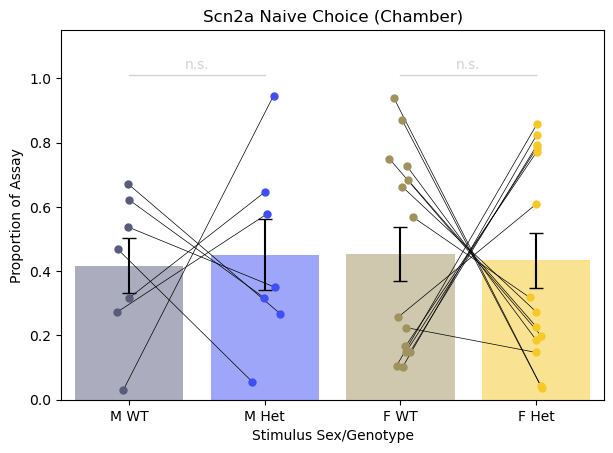

In [31]:
NC_side = NC_StatGraph(NC_chambertime,'side',mode='paired')

Male WT vs Male Het huddle: p = 0.813, paired t-test
Female WT vs Female Het huddle: p = 0.35, paired t-test


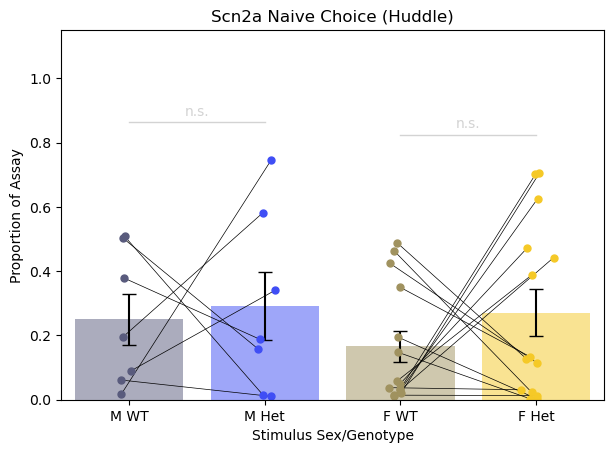

In [32]:
NC_huddle = NC_StatGraph(NC_chambertime,'huddle',mode='paired')

Male Huddle Index vs 0: p = 0.813, 1-sample t-test, null = 0
Female Huddle Index vs 0: p = 0.903, wilcoxon signed-rank test


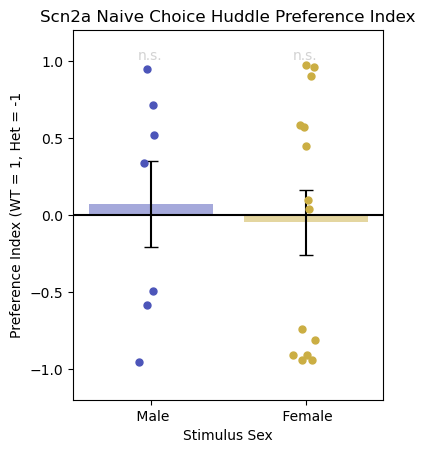

In [33]:
NC_huddle = NC_StatGraph(NC_chambertime,'huddle',mode='index')

Male Left vs Right chamber: p = 0.276, paired t-test
Female Left vs Right chamber: p = 0.135, wilcoxon signed-rank test


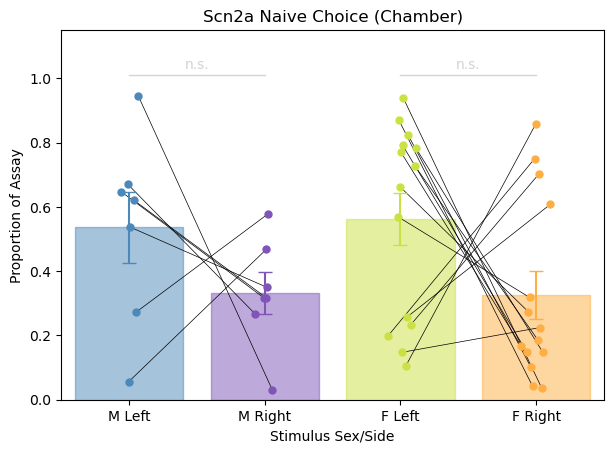

In [57]:
NC_sideBias = NC_SideBiasGraph(NC_chambertime,'side')

## Summary Metrics

### Code

In [ ]:
data_df = 
side_or_huddle = 'chamber'
metric='prop'
na_column = "Het_Side"
mode = 'paired'

if side_or_huddle == 'side' or side_or_huddle == 'chamber': 
    wt_col = 'WT_'+metric
    het_col = 'HT_'+metric
    side_or_huddle_word = 'Chamber'
elif side_or_huddle == 'huddle':
    wt_col = 'Huddle_WT_'+metric
    het_col = 'Huddle_HT_'+metric 
    side_or_huddle_word = 'Huddle'


male_df = pd.DataFrame({'WT_L': data_df[(data_df['Het_Sex']=='M')& (pd.notna(data_df[na_column])) & (data_df['Het_Side']=='Right')][wt_col], 
                        'Het_R': data_df[(data_df['Het_Sex']=='M')& (pd.notna(data_df[na_column]))& (data_df['Het_Side']=='Right')][het_col],
                        'WT_R': data_df[(data_df['Het_Sex']=='M')& (pd.notna(data_df[na_column])) & (data_df['Het_Side']=='Left')][wt_col], 
                        'Het_L': data_df[(data_df['Het_Sex']=='M')& (pd.notna(data_df[na_column]))& (data_df['Het_Side']=='Left')][het_col]})



male_df = pd.DataFrame({'WT_L': data_df[(data_df['Het_Sex']=='F')& (pd.notna(data_df[na_column])) & (data_df['Het_Side']=='Right')][wt_col], 
                        'Het_R': data_df[(data_df['Het_Sex']=='F')& (pd.notna(data_df[na_column]))& (data_df['Het_Side']=='Right')][het_col],
                        'WT_R': data_df[(data_df['Het_Sex']=='F')& (pd.notna(data_df[na_column])) & (data_df['Het_Side']=='Left')][wt_col], 
                        'Het_L': data_df[(data_df['Het_Sex']=='F')& (pd.notna(data_df[na_column]))& (data_df['Het_Side']=='Left')][het_col]})

#### Setting color schemes and labels based on sex ####

acols = [[0.627451,   0.57254905, 0.37254903], # all colors
    [0.9607843,  0.7882353,  0.15294118],
    [0.34901962, 0.35686275, 0.49019608],
    [0.24705882, 0.30588236, 0.9607843 ]]

fcols = acols[0:2] # female colors, WT first
mcols = acols[2:] # male colors, WT first    

In [2]:
def testNormal(input, alpha=0.05):
    if len(input) >= 20:
        #This function is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality
        results = scipy.stats.normaltest(input) 
        p_values = results.pvalue
        normal_method = "D'Agostino-Pearson test (combined kurtosis + skewness)"
        if p_value > alpha: isnormal = True
        elif p_value <= alpha: isnormal = False
    else: 
        #For n<20, we have to rely on a Monte Carlo approach to test skew and kurtosis (kurtosistest is only valid n>=20) 
        rvs = lambda size: scipy.stats.norm.rvs(size=size, random_state=np.random.default_rng())
        skew_results = scipy.stats.monte_carlo_test(input, rvs, scipy.stats.skew, vectorized=True)
        kurtosis_results = scipy.stats.monte_carlo_test(input, rvs, scipy.stats.kurtosis, vectorized=True)
        p_values = [skew_results.pvalue, kurtosis_results.pvalue]
        normal_method = "Monte Carlo method (Fisher kurtosis + Fisher-Pearson skewness)"
        # data is only treated as normal if it has both normal skew and kurtosis
        if p_values[0] > 0.05 and p_values[1] > alpha: isnormal = True
        else: isnormal = False
    return isnormal, p_values, normal_method

def NC_StatGraph_new(data_df, side_or_huddle, metric='prop', na_column = "Unknown_sec", mode = 'paired', show_plot=True, print_ps = True, show_ps = True, print_means = False, saveFig = False, figName = 'test.png', savePath = ''):
    # e.g. NC_StatGraph(NC_chambertime,'side',mode='paired')
    # e.g. NC_side = NC_StatGraph(NC_chambertime,'huddle',mode='index')
    # metric can be 'ct' (count), 'lat' (latency), 'prop' (proportion), or 'sec' (seconds) but defaults to proportions
    
    #### Setting basic parameters based on inputs ####
    if side_or_huddle == 'side' or side_or_huddle == 'chamber': 
        wt_col = 'WT_'+metric
        het_col = 'HT_'+metric
        side_or_huddle_word = 'Chamber'
    elif side_or_huddle == 'huddle':
        wt_col = 'Huddle_WT_'+metric
        het_col = 'Huddle_HT_'+metric 
        side_or_huddle_word = 'Huddle'


    #### Exclude rows that don't meet NA criteria and are sex-specific
    male_df = pd.DataFrame({'WT': data_df[(data_df['Het_Sex']=='M')& (data_df[na_column]<60)][wt_col], 
                            'Het': data_df[(data_df['Het_Sex']=='M')& (data_df[na_column]<60)][het_col]})
    female_df = pd.DataFrame({'WT': data_df[(data_df['Het_Sex']=='F')& (data_df[na_column]<60)][wt_col], 
                              'Het': data_df[(data_df['Het_Sex']=='F')& (data_df[na_column]<60)][het_col]})

    #### Setting color schemes and labels based on sex ####
    
    acols = [[0.627451,   0.57254905, 0.37254903], # all colors
        [0.9607843,  0.7882353,  0.15294118],
        [0.34901962, 0.35686275, 0.49019608],
        [0.24705882, 0.30588236, 0.9607843 ]]

    fcols = acols[0:2] # female colors, WT first
    mcols = acols[2:] # male colors, WT first    
    
    if mode == 'paired': ### Four column situation with lines
        #### Setting basic parameters based on inputs ####
        #if side_or_intxn == 'side': y_max = 1.3
        #elif side_or_intxn == 'intxn' or side_or_intxn == 'interact' or side_or_intxn == 'interaction': y_max = 1.15

        #### Stats ####
        #### Testing for normality via skew and kurtosis (normaltest for n>=20, monte carlo for n<20) ####
        mwt_norm = testNormal(male_df['WT'])[0]
        mhet_norm = testNormal(male_df['Het'])[0]
        fwt_norm = testNormal(female_df['WT'])[0]
        fhet_norm = testNormal(female_df['Het'])[0]
        
        normal_test = [mwt_norm, mhet_norm, fwt_norm, fhet_norm]

        #### paired tests: paired-t-test, wilcoxon signed-rank ####
        if mwt_norm == True and mhet_norm == True: 
            m_stat, m_p = scipy.stats.ttest_ind(male_df['WT'], male_df['Het'])
            m_test = 'independent t-test'
        else: 
            m_stat, m_p = scipy.stats.mannwhitneyu(male_df['WT'], male_df['Het'])
            m_test = 'mann-whitney u test'
            
        if fwt_norm == True and fhet_norm == True: 
            f_stat, f_p = scipy.stats.ttest_ind(female_df['WT'], female_df['Het'])
            f_test = 'independent t-test'
        else: 
            f_stat, f_p = scipy.stats.mannwhitneyu(female_df['WT'], female_df['Het'])
            f_test = 'mann-whitney u test'
        
        ps = [m_p, f_p] #stim_p, obj_p]
        p_statements = ['Male WT vs Male Het ','Female WT vs Female Het ']#, 'WT vs Het animal ', 'WT vs Het object ']
        stat_tests = [m_test, f_test] #stim_test, obj_test]

        #### Plotting ####
        if show_plot == True:

            # make dfs for jittered x-values (made of random numbers around +/-0.05) with same same column labels as original df
            jitter = 0.05
            df_m_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=male_df.values.shape), columns=male_df.columns,index = male_df.index)
            df_m_jitter += [0,1] # wt columns are jittered around 0 and 1 (animal and object, respectively)
            df_f_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=female_df.values.shape), columns=female_df.columns,index = female_df.index)
            df_f_jitter += [2,3] # het columns are jittered around 2 and 3 (animal and object, respectively)

            # Plot points and bars for wt and het dfs with appropriate colors and labels
            fig, ax = plt.subplots()
            for df, df_jitter, cols, wt_x in zip([male_df,female_df],[df_m_jitter,df_f_jitter],[mcols,fcols],[0,2]):
                ax.plot(df_jitter['WT'], df['WT'], 'o', markerfacecolor=cols[0] , markeredgecolor =cols[0],zorder=1, ms=5, mew=1, alpha = 1)
                ax.bar(wt_x, np.mean(df['WT']), color = cols[0], edgecolor = 'none', yerr = scipy.stats.sem(df['WT']), 
                       ecolor = 'k', capsize = 5,linewidth = 1, zorder=-1, alpha = 0.5, label=('WT'))
                ax.plot(df_jitter['Het'], df['Het'], 'o', markerfacecolor=cols[1] , markeredgecolor =cols[1],zorder=1, ms=5, mew=1, alpha = 1)
                ax.bar(wt_x+1, np.mean(df['Het']), color = cols[1], edgecolor = 'none', yerr = scipy.stats.sem(df['Het']), 
                       ecolor = 'k', capsize = 5,linewidth = 1, zorder=-1, alpha = 0.5, label=('Het'))
                
            ax.set_xticks([0,1,2,3]) 
            ax.set_xticklabels(['M WT', 'M Het', 'F WT', 'F Het']) # labels 0-3 with appropriate column name
            ax.set_xlim(-0.5,3.5) # set x limits to column +/- 0.5
        
            y_max = np.max([np.max(male_df[col]) for col in male_df.columns] + [np.max(female_df[col]) for col in female_df.columns])
            if metric == 'prop':
                ax.set_ylim(0,1.17) # set y limits
                ax.set_ylabel('Proportion of Assay')
                ax.set_title('Scn2a Naive Choice ('+side_or_huddle_word+')')
            elif metric == 'sec':
                ax.set_ylim(0,1.17*y_max) # set y limits
                ax.set_ylabel('Total duration (seconds)')
                ax.set_title('Scn2a Naive Choice ('+side_or_huddle_word+')')
            elif metric == 'ct':
                ax.set_ylim(0,1.17*y_max) # set y limits
                ax.set_ylabel('Count')
            elif metric == 'lat':
                ax.set_ylim(0,1.17*y_max) # set y limits
                ax.set_ylabel('Latency (seconds)')
                ax.set_title('Scn2a Naive Choice ('+side_or_huddle_word+ ' latency)')
            
            ax.set_xlabel('Stimulus Sex/Genotype')
            fig.set_figwidth(7)

            # Plot connecting lines
            for idx in male_df.index: ax.plot(df_m_jitter.loc[idx,['WT','Het']], male_df.loc[idx,['WT','Het']], color = 'k', linewidth = 0.5, linestyle = '-', zorder=-1)
            for idx in female_df.index: ax.plot(df_f_jitter.loc[idx,['WT','Het']], female_df.loc[idx,['WT','Het']], color = 'k', linewidth = 0.5, linestyle = '-', zorder=-1)

            # Make p-labels
            p_labels = ['label0','label1']#,'label2','label3']
            for i in range(len(ps)):
                if ps[i] < 0.01: 
                    p_formatted = np.format_float_scientific(ps[i], unique=False, precision=3)
                    if ps[i]< 0.001: p_label = '***'
                    else: p_label = '**'
                elif ps[i] >= 0.01: 
                    p_formatted = str(round(ps[i], 3))
                    if ps[i]<=0.05: p_label = '*'
                    else: p_label = 'n.s.'
                p_labels[i] = p_label
                if print_ps == True: 
                    print(p_statements[i] + side_or_huddle_word.lower() + ': p = ' + p_formatted + ', ' + stat_tests[i])

            # Define p-value bar values
            p_color = ['color0','color1']#,'color2','color3']
            for p_val, i in zip(ps,[0,1]):#,2,3]):
                if p_val>=0.05: p_color[i] = 'lightgray'
                elif p_val<0.05: p_color[i] = 'k'
            
            if metric == 'prop':
                if np.max([np.max(male_df['WT']),np.max(male_df['Het'])]) >= 0.89: m_y_bar = 1.01
                else: m_y_bar = np.max([np.max(male_df['WT']),np.max(male_df['Het'])]) + 0.12 
                if np.max([np.max(female_df['WT']),np.max(female_df['Het'])]) >= 0.89: f_y_bar = 1.01
                else: f_y_bar = np.max([np.max(female_df['WT']),np.max(female_df['Het'])]) + 0.12
            else:
                m_y_bar = np.max([np.max(male_df['WT']),np.max(male_df['Het'])]) * 1.12
                f_y_bar = np.max([np.max(female_df['WT']),np.max(female_df['Het'])]) * 1.12
            
            
            if show_ps == True:
                # Plot p-labels
                ax.plot([0,1],[m_y_bar,m_y_bar],color = p_color[0], linewidth = 1, linestyle = '-', zorder=1)
                ax.text(0.5, m_y_bar*1.02, p_labels[0], fontsize=10,ha='center',color = p_color[0])
                ax.plot([2,3],[f_y_bar,f_y_bar],color = p_color[1], linewidth = 1, linestyle = '-', zorder=1)
                ax.text(2.5, f_y_bar*1.02, p_labels[1], fontsize=10,ha='center',color = p_color[1])
                
                #ax.plot([0,2],[np.max([wt_y_bar,het_y_bar])+0.1,np.max([wt_y_bar,het_y_bar])+0.1],color = p_color[2], linewidth = 1, linestyle = '-', zorder=1)   
                #ax.text(1, np.max([wt_y_bar,het_y_bar])+0.11, p_labels[2], fontsize=10,ha='center',color = p_color[2])
                #ax.plot([1,3],[np.max([wt_y_bar,het_y_bar])+0.2,np.max([wt_y_bar,het_y_bar])+0.2],color = p_color[3], linewidth = 1, linestyle = '-', zorder=1)   
                #ax.text(2, np.max([wt_y_bar,het_y_bar])+0.21, p_labels[3], fontsize=10,ha='center',color = p_color[3])

            if saveFig == True: plt.savefig((savePath + figName))
            plt.show() 

        means = [np.mean(male_df['WT']), np.mean(male_df['Het']), np.mean(female_df['WT']), np.mean(female_df['Het'])]
        sems = [scipy.stats.sem(male_df['WT']), scipy.stats.sem(male_df['Het']), scipy.stats.sem(female_df['WT']), scipy.stats.sem(female_df['Het'])]
        if print_means == True: 
            for sex_word, stim_geno, i in zip(['Male','Male','Female','Female'],['WT','Het','WT','Het'],[0,1,2,3]):
                print(sex_word + ' ' + stim_geno + ' ' +side_or_intxn_word.lower() + ' = ' + str(round(means[i], 2)) + '±' + str(round(sems[i], 2)))
    
    elif mode == 'index' or mode == 'idx' or mode == 'Index':
        prefIndex_M = pd.DataFrame({'prefIdx': data_df[(data_df['Het_Sex']=='M')& (data_df[na_column]<60)]['Huddle_geno_PI']})
        prefIndex_F = pd.DataFrame({'prefIdx': data_df[(data_df['Het_Sex']=='F')& (data_df[na_column]<60)]['Huddle_geno_PI']})

        # normality test
        m_pi_norm = testNormal(prefIndex_M['prefIdx'])[0]
        f_pi_norm = testNormal(prefIndex_F['prefIdx'])[0]
        normal_test = [m_pi_norm, f_pi_norm]

        #### tests against 0 null: t-test or wilcoxon ####
        if m_pi_norm == True:
            m_res = scipy.stats.ttest_1samp(prefIndex_M['prefIdx'], popmean = 0)
            m_p = m_res.pvalue
            m_test = '1-sample t-test, null = 0'
        else:     
            m_stat, m_p = scipy.stats.wilcoxon(prefIndex_M['prefIdx'], zero_method = 'pratt')
            m_test = 'wilcoxon signed-rank test'
        if f_pi_norm == True:
            f_res = scipy.stats.ttest_1samp(prefIndex_F['prefIdx'], popmean = 0)
            f_p = m_res.pvalue
            f_test = '1-sample t-test, null = 0'
        else:     
            f_stat, f_p = scipy.stats.wilcoxon(prefIndex_F['prefIdx'], zero_method = 'pratt')
            f_test = 'wilcoxon signed-rank test'


        #### independent tests: t-test or mann-whitney ####
        #if wt_pi_norm == True and het_pi_norm == True: 
       #     prefIdx_stat, prefIdx_p = scipy.stats.ttest_ind(prefIndex_wt['prefIndex'], prefIndex_het['prefIndex'])
        #    prefIdx_test = 'independent samples t-test'
        #else: 
         #   prefIdx_stat, prefIdx_p = scipy.stats.mannwhitneyu(prefIndex_wt['prefIndex'], prefIndex_het['prefIndex']) 
          #  prefIdx_test = 'mann-whitney u test'   

        ps = [m_p, f_p]#, prefIdx_p]
        p_statements = [('Male '+'Huddle'+' Index vs 0:'),('Female '+'Huddle'+' Index vs 0:')]#,('WT vs Het '+side_or_intxn_idx_word+' Index:')]
        stat_tests = [m_test, f_test]#, prefIdx_test]
        
        if show_plot == True: 
            
            jitter = 0.05
            df_m_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=prefIndex_M.values.shape), columns=prefIndex_M.columns)
            df_m_jitter += 0 # wt columns are jittered around 0 
            df_f_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=prefIndex_F.values.shape), columns=prefIndex_F.columns)
            df_f_jitter += 1 # het columns are jittered around 1

            # Plot points and bars for wt and het dfs with appropriate colors and labels
            fig, ax = plt.subplots()
            mcol_ave = [np.average([col1,col2]) for col1,col2 in zip(mcols[0],mcols[1])]
            ax.plot(df_m_jitter['prefIdx'], prefIndex_M['prefIdx'], 'o', markerfacecolor=mcol_ave , markeredgecolor=mcol_ave,zorder=1, ms=5, mew=1)
            ax.bar(0, np.mean(prefIndex_M['prefIdx']), color = mcol_ave, edgecolor = 'none', yerr = scipy.stats.sem(prefIndex_M['prefIdx']), ecolor = 'k', 
                   capsize = 5,linewidth = 1, zorder=-1, alpha = 0.5)

            fcol_ave = [np.average([col1,col2]) for col1,col2 in zip(fcols[0],fcols[1])]
            ax.plot(df_f_jitter['prefIdx'], prefIndex_F['prefIdx'], 'o', markerfacecolor=fcol_ave , markeredgecolor=fcol_ave,zorder=1, ms=5, mew=1)
            ax.bar(1, np.mean(prefIndex_F['prefIdx']), color = fcol_ave, edgecolor = 'none', yerr = scipy.stats.sem(prefIndex_F['prefIdx']), ecolor = 'k', 
                   capsize = 5,linewidth = 1, zorder=-1, alpha = 0.5)
            
            ax.axhline(y=0, color='k', linestyle='-',zorder=1)
            ax.set_xticks([0, 1]) 
            ax.set_xticklabels([' Male',' Female']) 
            ax.set_xlim(-0.5,1.5) # set x limits to column +/- 0.5
            ax.set_ylabel('Preference Index (WT = 1, Het = -1')
            ax.set_xlabel('Stimulus Sex')
            ax.set_ylim(-1.2,1.2) # set y limits
            ax.set_title('Scn2a Naive Choice Huddle Preference Index')
            fig.set_figwidth(4)

            # Make p-labels
            p_labels = ['label0', 'label1']#, 'label2']
            for i in range(len(ps)):   
                if ps[i] < 0.01: 
                    p_formatted = np.format_float_scientific(ps[i], unique=False, precision=3)
                    if ps[i]< 0.001: p_label = '***'
                    else: p_label = '**'
                elif ps[i] >= 0.01: 
                    p_formatted = str(round(ps[i], 3))
                    if ps[i]<=0.05: p_label = '*'
                    else: p_label = 'n.s.'
                p_labels[i] = p_label
                if print_ps == True: print(p_statements[i] +' p = ' + p_formatted + ', ' + stat_tests[i])

            # Define p-value bar values
            p_color = ['color0', 'color1']#, 'color2']
            for p_val, i in zip(ps,[0,1,]):#2]):
                if p_val>=0.05: p_color[i] = 'lightgray'
                elif p_val<0.05: p_color[i] = 'k'
            if np.max([np.max(prefIndex_M['prefIdx']),np.max(prefIndex_F['prefIdx'])]) >= 0.94: y_bar = 1.0
            else: y_bar = np.max([np.max(prefIndex_M['prefIdx']),np.max(prefIndex_F['prefIdx'])]) + 0.06

            if show_ps == True:
                # Plot p-labels
                ax.text(0, y_bar+0.01, p_labels[0], fontsize=10, ha='center',color = p_color[0])
                ax.text(1, y_bar+0.01, p_labels[1], fontsize=10, ha='center',color = p_color[1])
                #ax.plot([0,1],[y_bar+0.11,y_bar+0.11],color = p_color[2], linewidth = 1, linestyle = '-', zorder=1)
                #ax.text(0.5, y_bar+0.13, p_labels[2], fontsize=10, ha='center',color = p_color[2])
            if saveFig == True: plt.savefig((savePath + figName))
            plt.show()

        means = [np.mean(prefIndex_M['prefIdx']), np.mean(prefIndex_F['prefIdx'])]
        sems = [scipy.stats.sem(prefIndex_M['prefIdx']), scipy.stats.sem(prefIndex_F['prefIdx'])]

        if print_means == True: 
            print('Male Left/Right Huddle Preference Index = ' + str(round(means[0], 2)) + '±' + str(round(sems[0], 2)))
            print('Female Left/Right Huddle Preference Index = ' + str(round(means[1], 2)) + '±' + str(round(sems[1], 2)))

    return means, sems, ps, p_statements, stat_tests, normal_test

def NC_SideBiasGraph_new(data_df, side_or_huddle, mode = 'paired', metric = 'prop',na_column = "Unknown_sec", show_plot=True, print_ps = True, show_ps = True, print_means = False, saveFig = False, figName = 'test.png', savePath = ''):
    # e.g. NC_StatGraph(NC_chambertime,'side',mode='paired')
    # e.g. NC_side = NC_StatGraph(NC_chambertime,'huddle',mode='index')
    
    #### Setting basic parameters based on inputs ####
    if side_or_huddle == 'side' or side_or_huddle == 'chamber': 
        left_col = 'Left_'+metric
        right_col = 'Right_'+metric
        side_or_huddle_word = 'Chamber'
    elif side_or_huddle == 'huddle':
        left_col = 'Huddle_Left_'+metric
        right_col = 'Huddle_Right_' +metric 
        side_or_huddle_word = 'Huddle'


    #### Exclude rows that don't meet NA criteria and are sex-specific
    male_rows = data_df[(data_df['Het_Sex']=='M')& (data_df[na_column]<60)]
    male_df = pd.DataFrame({'Left': male_rows[left_col], 'Right': male_rows[right_col]})
    
    female_rows = data_df[(data_df['Het_Sex']=='F')& (data_df[na_column]<60)]
    female_df = pd.DataFrame({'Left': female_rows[left_col], 'Right': female_rows[right_col]})
    #### Setting color schemes and labels based on sex ####
    
    acols = [[0.627451,   0.57254905, 0.37254903], # all colors
        [0.9607843,  0.7882353,  0.15294118],
        [0.34901962, 0.35686275, 0.49019608],
        [0.24705882, 0.30588236, 0.9607843 ]]
    fcols = acols[0:2] # female colors, WT first
    mcols = acols[2:] # male colors, WT first
    m_average = [np.average([color1,color2]) for color1,color2 in zip(mcols[0], mcols[1])]
    f_average = [np.average([color1,color2]) for color1,color2 in zip(fcols[0], fcols[1])]
    
    if mode == 'paired': ### Four column situation with lines
        
        #### Stats ####
        #### Testing for normality via skew and kurtosis (normaltest for n>=20, monte carlo for n<20) ####
        mL_norm = testNormal(male_df['Left'])[0]
        mR_norm = testNormal(male_df['Right'])[0]
        fL_norm = testNormal(female_df['Left'])[0]
        fR_norm = testNormal(female_df['Right'])[0]
        
        normal_test = [mL_norm, mR_norm, fL_norm, fR_norm]
    
        #### paired tests: paired-t-test, wilcoxon signed-rank ####
        if mL_norm == True and mR_norm == True: 
            m_stat, m_p = scipy.stats.ttest_rel(male_df['Left'], male_df['Right'])
            m_test = 'paired t-test'
        else: 
            m_stat, m_p = scipy.stats.wilcoxon(male_df['Left'], male_df['Right'], zero_method = 'pratt')
            m_test = 'wilcoxon signed-rank test'
            
        if fL_norm == True and fR_norm == True: 
            f_stat, f_p = scipy.stats.ttest_rel(female_df['Left'], female_df['Right'])
            f_test = 'paired t-test'
        else: 
            f_stat, f_p = scipy.stats.wilcoxon(female_df['Left'], female_df['Right'], zero_method = 'pratt')
            f_test = 'wilcoxon signed-rank test'
        
        ps = [m_p, f_p] #stim_p, obj_p]
        p_statements = ['Male Left vs Right ','Female Left vs Right ']#, 'WT vs Het animal ', 'WT vs Het object ']
        stat_tests = [m_test, f_test] #stim_test, obj_test]
    
        #### Plotting ####
        if show_plot == True:
    
            # make dfs for jittered x-values (made of random numbers around +/-0.05) with same same column labels as original df
            jitter = 0.05
            df_m_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=male_df.values.shape), columns=male_df.columns,index = male_df.index)
            df_m_jitter += [0,1] # wt columns are jittered around 0 and 1 (animal and object, respectively)
            df_f_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=female_df.values.shape), columns=female_df.columns,index = female_df.index)
            df_f_jitter += [2,3] # het columns are jittered around 2 and 3 (animal and object, respectively)

            # Plot points and bars for wt and het dfs with appropriate colors and labels
            fig, ax = plt.subplots()
            for df, df_jitter, col, left_x in zip([male_df,female_df],[df_m_jitter,df_f_jitter],[m_average,f_average],[0,2]):
                ax.plot(df_jitter['Left'], df['Left'], 'o', markerfacecolor=[col[0],col[1]+0.2,col[2]] , markeredgecolor =[col[0],col[1]+0.2,col[2]],zorder=1, ms=5, mew=1, alpha = 1)
                ax.bar(left_x, np.mean(df['Left']), color = [col[0],col[1]+0.2,col[2]], edgecolor = [col[0],col[1]+0.2,col[2]], yerr = scipy.stats.sem(df['Left']), 
                       ecolor = [col[0],col[1]+0.2,col[2]], capsize = 5,linewidth = 1, zorder=-1, alpha = 0.5, label=('Left'))
                
                ax.plot(df_jitter['Right'], df['Right'], 'o', markerfacecolor=[col[0]+0.2,col[1],col[2]], markeredgecolor =[col[0]+0.2,col[1],col[2]],zorder=1, ms=5, mew=1, alpha = 1)
                ax.bar(left_x+1, np.mean(df['Right']), color = [col[0]+0.2,col[1],col[2]], edgecolor = [col[0]+0.2,col[1],col[2]], yerr = scipy.stats.sem(df['Right']), 
                       ecolor = [col[0]+0.2,col[1],col[2]], capsize = 5,linewidth = 1, zorder=-1, alpha = 0.5, label=('Right'))
                
            ax.set_xticks([0,1,2,3]) 
            ax.set_xticklabels(['M Left', 'M Right', 'F Left', 'F Right']) # labels 0-3 with appropriate column name
            ax.set_xlim(-0.5,3.5) # set x limits to column +/- 0.5
        
            y_max = np.max([np.max(male_df[col]) for col in male_df.columns] + [np.max(female_df[col]) for col in female_df.columns])
            ax.set_ylim(0,1.15) # set y limits
            ax.set_ylabel('Proportion of Assay')
            ax.set_xlabel('Stimulus Sex/Side')
            ax.set_title('Scn2a Naive Choice ('+side_or_huddle_word+')')
            fig.set_figwidth(7)
    
            # Plot connecting lines
            for idx in male_df.index: ax.plot(df_m_jitter.loc[idx,['Left','Right']], male_df.loc[idx,['Left','Right']], color = 'k', linewidth = 0.5, linestyle = '-', zorder=-1)
            for idx in female_df.index: ax.plot(df_f_jitter.loc[idx,['Left','Right']], female_df.loc[idx,['Left','Right']], color = 'k', linewidth = 0.5, linestyle = '-', zorder=-1)

            # Make p-labels
            p_labels = ['label0','label1']#,'label2','label3']
            for i in range(len(ps)):
                if ps[i] < 0.01: 
                    p_formatted = np.format_float_scientific(ps[i], unique=False, precision=3)
                    if ps[i]< 0.001: p_label = '***'
                    else: p_label = '**'
                elif ps[i] >= 0.01: 
                    p_formatted = str(round(ps[i], 3))
                    if ps[i]<=0.05: p_label = '*'
                    else: p_label = 'n.s.'
                p_labels[i] = p_label
                if print_ps == True: 
                    print(p_statements[i] + side_or_huddle_word.lower() + ': p = ' + p_formatted + ', ' + stat_tests[i])
    
            # Define p-value bar values
            p_color = ['color0','color1']#,'color2','color3']
            for p_val, i in zip(ps,[0,1]):#,2,3]):
                if p_val>=0.05: p_color[i] = 'lightgray'
                elif p_val<0.05: p_color[i] = 'k'
            if np.max([np.max(male_df['Left']),np.max(male_df['Right'])]) >= 0.89: m_y_bar = 1.01
            else: m_y_bar = np.max([np.max(male_df['Left']),np.max(male_df['Right'])]) + 0.12 
            if np.max([np.max(female_df['Left']),np.max(female_df['Right'])]) >= 0.89: f_y_bar = 1.01
            else: f_y_bar = np.max([np.max(female_df['Left']),np.max(female_df['Right'])]) + 0.12
        
        
            if show_ps == True:
                # Plot p-labels
                ax.plot([0,1],[m_y_bar,m_y_bar],color = p_color[0], linewidth = 1, linestyle = '-', zorder=1)
                ax.text(0.5, m_y_bar+0.02, p_labels[0], fontsize=10,ha='center',color = p_color[0])
                ax.plot([2,3],[f_y_bar,f_y_bar],color = p_color[1], linewidth = 1, linestyle = '-', zorder=1)
                ax.text(2.5, f_y_bar+0.02, p_labels[1], fontsize=10,ha='center',color = p_color[1])
                
                #ax.plot([0,2],[np.max([wt_y_bar,het_y_bar])+0.1,np.max([wt_y_bar,het_y_bar])+0.1],color = p_color[2], linewidth = 1, linestyle = '-', zorder=1)   
                #ax.text(1, np.max([wt_y_bar,het_y_bar])+0.11, p_labels[2], fontsize=10,ha='center',color = p_color[2])
                #ax.plot([1,3],[np.max([wt_y_bar,het_y_bar])+0.2,np.max([wt_y_bar,het_y_bar])+0.2],color = p_color[3], linewidth = 1, linestyle = '-', zorder=1)   
                #ax.text(2, np.max([wt_y_bar,het_y_bar])+0.21, p_labels[3], fontsize=10,ha='center',color = p_color[3])
    
            if saveFig == True: plt.savefig((savePath + figName))
            plt.show() 
    
        means = [np.mean(male_df['Left']), np.mean(male_df['Right']), np.mean(female_df['Left']), np.mean(female_df['Right'])]
        sems = [scipy.stats.sem(male_df['Left']), scipy.stats.sem(male_df['Right']), scipy.stats.sem(female_df['Left']), scipy.stats.sem(female_df['Right'])]
        if print_means == True: 
            for sex_word, stim_geno, i in zip(['Male','Male','Female','Female'],['Left','Right','Left','Right'],[0,1,2,3]):
                print(sex_word + ' ' + stim_geno + ' ' +side_or_intxn_word.lower() + ' = ' + str(round(means[i], 2)) + '±' + str(round(sems[i], 2)))



    elif mode == 'index' or mode == 'idx' or mode == 'Index':
        prefIndex_M = pd.DataFrame({'prefIdx': data_df[(data_df['Het_Sex']=='M')& (data_df[na_column]<60)]['Huddle_LR_PI']})
        prefIndex_F = pd.DataFrame({'prefIdx': data_df[(data_df['Het_Sex']=='F')& (data_df[na_column]<60)]['Huddle_LR_PI']})

        # normality test
        m_pi_norm = testNormal(prefIndex_M['prefIdx'])[0]
        f_pi_norm = testNormal(prefIndex_F['prefIdx'])[0]
        normal_test = [m_pi_norm, f_pi_norm]

        #### tests against 0 null: t-test or wilcoxon ####
        if m_pi_norm == True:
            m_res = scipy.stats.ttest_1samp(prefIndex_M['prefIdx'], popmean = 0)
            m_p = m_res.pvalue
            m_test = '1-sample t-test, null = 0'
        else:     
            m_stat, m_p = scipy.stats.wilcoxon(prefIndex_M['prefIdx'], zero_method = 'pratt')
            m_test = 'wilcoxon signed-rank test'
        if f_pi_norm == True:
            f_res = scipy.stats.ttest_1samp(prefIndex_F['prefIdx'], popmean = 0)
            f_p = m_res.pvalue
            f_test = '1-sample t-test, null = 0'
        else:     
            f_stat, f_p = scipy.stats.wilcoxon(prefIndex_F['prefIdx'], zero_method = 'pratt')
            f_test = 'wilcoxon signed-rank test'


        #### independent tests: t-test or mann-whitney ####
        #if wt_pi_norm == True and het_pi_norm == True: 
       #     prefIdx_stat, prefIdx_p = scipy.stats.ttest_ind(prefIndex_wt['prefIndex'], prefIndex_het['prefIndex'])
        #    prefIdx_test = 'independent samples t-test'
        #else: 
         #   prefIdx_stat, prefIdx_p = scipy.stats.mannwhitneyu(prefIndex_wt['prefIndex'], prefIndex_het['prefIndex']) 
          #  prefIdx_test = 'mann-whitney u test'   

        ps = [m_p, f_p]#, prefIdx_p]
        p_statements = [('Male '+'Huddle'+' Index vs 0:'),('Female '+'Huddle'+' Index vs 0:')]#,('WT vs Het '+side_or_intxn_idx_word+' Index:')]
        stat_tests = [m_test, f_test]#, prefIdx_test]
        
        if show_plot == True: 
            
            jitter = 0.05
            df_m_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=prefIndex_M.values.shape), columns=prefIndex_M.columns)
            df_m_jitter += 0 # wt columns are jittered around 0 
            df_f_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=prefIndex_F.values.shape), columns=prefIndex_F.columns)
            df_f_jitter += 1 # het columns are jittered around 1

            # Plot points and bars for wt and het dfs with appropriate colors and labels
            fig, ax = plt.subplots()
            ax.plot(df_m_jitter['prefIdx'], prefIndex_M['prefIdx'], 'o', markerfacecolor=m_average , markeredgecolor=m_average,zorder=1, ms=5, mew=1)
            ax.bar(0, np.mean(prefIndex_M['prefIdx']), color = m_average, edgecolor = 'none', yerr = scipy.stats.sem(prefIndex_M['prefIdx']), ecolor = 'k', 
                   capsize = 5,linewidth = 1, zorder=-1, alpha = 0.5)

            ax.plot(df_f_jitter['prefIdx'], prefIndex_F['prefIdx'], 'o', markerfacecolor=f_average , markeredgecolor=f_average,zorder=1, ms=5, mew=1)
            ax.bar(1, np.mean(prefIndex_F['prefIdx']), color = f_average, edgecolor = 'none', yerr = scipy.stats.sem(prefIndex_F['prefIdx']), ecolor = 'k', 
                   capsize = 5,linewidth = 1, zorder=-1, alpha = 0.5)
            
            ax.axhline(y=0, color='k', linestyle='-',zorder=1)
            ax.set_xticks([0, 1]) 
            ax.set_xticklabels([' Male',' Female']) 
            ax.set_xlim(-0.5,1.5) # set x limits to column +/- 0.5
            ax.set_ylabel('Preference Index (Left = 1, Right = -1')
            ax.set_xlabel('Stimulus Sex')
            ax.set_ylim(-1.2,1.2) # set y limits
            ax.set_title('Scn2a Naive Choice Huddle Preference Index')
            fig.set_figwidth(4)

            # Make p-labels
            p_labels = ['label0', 'label1']#, 'label2']
            for i in range(len(ps)):   
                if ps[i] < 0.01: 
                    p_formatted = np.format_float_scientific(ps[i], unique=False, precision=3)
                    if ps[i]< 0.001: p_label = '***'
                    else: p_label = '**'
                elif ps[i] >= 0.01: 
                    p_formatted = str(round(ps[i], 3))
                    if ps[i]<=0.05: p_label = '*'
                    else: p_label = 'n.s.'
                p_labels[i] = p_label
                if print_ps == True: print(p_statements[i] +' p = ' + p_formatted + ', ' + stat_tests[i])

            # Define p-value bar values
            p_color = ['color0', 'color1']#, 'color2']
            for p_val, i in zip(ps,[0,1,]):#2]):
                if p_val>=0.05: p_color[i] = 'lightgray'
                elif p_val<0.05: p_color[i] = 'k'
            if np.max([np.max(prefIndex_M['prefIdx']),np.max(prefIndex_F['prefIdx'])]) >= 0.94: y_bar = 1.0
            else: y_bar = np.max([np.max(prefIndex_M['prefIdx']),np.max(prefIndex_F['prefIdx'])]) + 0.06

            if show_ps == True:
                # Plot p-labels
                ax.text(0, y_bar+0.01, p_labels[0], fontsize=10, ha='center',color = p_color[0])
                ax.text(1, y_bar+0.01, p_labels[1], fontsize=10, ha='center',color = p_color[1])
                #ax.plot([0,1],[y_bar+0.11,y_bar+0.11],color = p_color[2], linewidth = 1, linestyle = '-', zorder=1)
                #ax.text(0.5, y_bar+0.13, p_labels[2], fontsize=10, ha='center',color = p_color[2])
            if saveFig == True: plt.savefig((savePath + figName))
            plt.show()

        means = [np.mean(prefIndex_M['prefIdx']), np.mean(prefIndex_F['prefIdx'])]
        sems = [scipy.stats.sem(prefIndex_M['prefIdx']), scipy.stats.sem(prefIndex_F['prefIdx'])]

        if print_means == True: 
            print('Male Huddle Preference Index = ' + str(round(means[0], 2)) + '±' + str(round(sems[0], 2)))
            print('Female Huddle Preference Index = ' + str(round(means[1], 2)) + '±' + str(round(sems[1], 2)))

    return means, sems, ps, p_statements, stat_tests, normal_test

### Plots

In [431]:
NC_chambertime = pd.read_csv('/Users/joshsteighner/Library/CloudStorage/Box-Box/Scn2a_X1Behavior_Nov22/Naive_Choice/combinedChamberTime_241205.csv',index_col = 0)
NC_chambertime.head(5)

,NC,Het_Sex,Het_Side,Center_ct,Center_lat,Center_prop,Center_sec,Huddle_Center_ct,Huddle_Center_lat,Huddle_Center_prop,...,WT_sec,Huddle_HT_ct,Huddle_HT_lat,Huddle_HT_prop,Huddle_HT_sec,HT_ct,HT_lat,HT_prop,HT_sec,Huddle_geno_PI
NC1,1,M,Left,68.0,0.0,0.023886,517.466664,0.0,0.0,0.000000,...,639.850000,696.0,373.383333,0.745278,16145.683310,716.0,372.083333,0.946579,20506.650006,-0.954287
NC2,2,M,Right,129.0,0.0,0.060288,1305.050008,0.0,0.0,0.000000,...,14543.299987,469.0,40.400000,0.013590,294.183379,493.0,47.350000,0.267866,5798.450005,0.948025
NC4,4,F,Right,338.0,0.0,0.112434,2447.416667,0.0,0.0,0.000000,...,12393.633333,994.0,577.666667,0.133795,2912.400000,1111.0,89.883333,0.318206,6926.600000,0.446484
NC5,5,F,Left,192.0,0.0,0.049301,1072.816667,0.0,0.0,0.000063,...,16344.050000,731.0,51.666667,0.128282,2791.483333,787.0,49.833333,0.199610,4343.616667,0.584727
NC6,6,F,Left,260.0,0.0,0.068117,1481.516676,0.0,0.0,0.000000,...,3210.866658,946.0,81.383333,0.626685,13630.199980,1040.0,75.450000,0.784255,17057.299996,-0.909729


Male WT vs Male Het chamber: p = 0.729, paired t-test
Female WT vs Female Het chamber: p = 0.893, wilcoxon signed-rank test


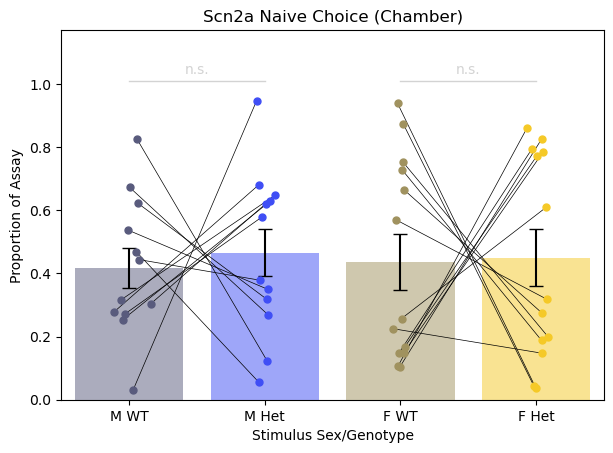

In [493]:
NC_side = NC_StatGraph_new(NC_chambertime,'side',mode='paired')

Male WT vs Male Het huddle: p = 0.481, paired t-test
Female WT vs Female Het huddle: p = 0.273, wilcoxon signed-rank test


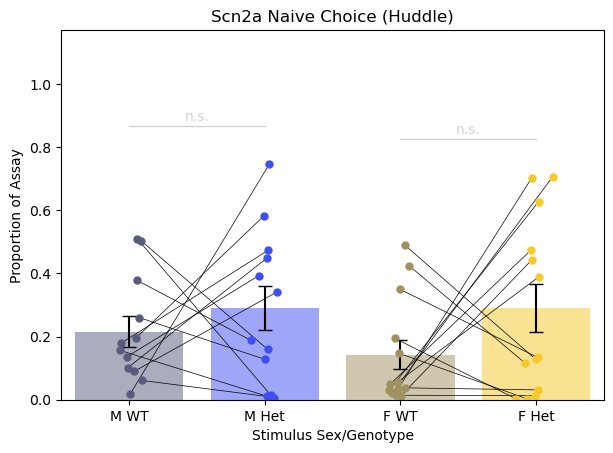

In [494]:
NC_huddle = NC_StatGraph_new(NC_chambertime,'huddle',mode='paired')

Male Huddle Index vs 0: p = 1.0, wilcoxon signed-rank test
Female Huddle Index vs 0: p = 0.735, wilcoxon signed-rank test


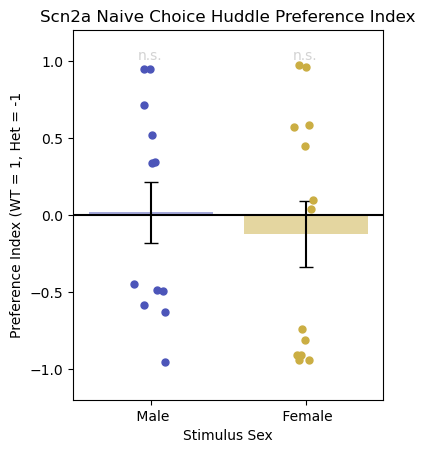

In [495]:
NC_huddle = NC_StatGraph_new(NC_chambertime,'huddle',mode='index')

Male WT vs Male Het chamber: p = 0.85, wilcoxon signed-rank test
Female WT vs Female Het chamber: p = 0.735, wilcoxon signed-rank test


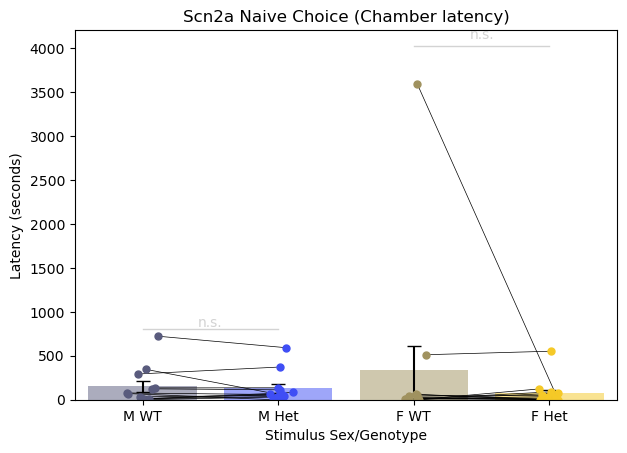

In [496]:
NC_huddle = NC_StatGraph_new(NC_chambertime,'chamber',mode='paired',metric='lat')

Male WT vs Male Het huddle: p = 0.424, wilcoxon signed-rank test
Female WT vs Female Het huddle: p = 0.839, wilcoxon signed-rank test


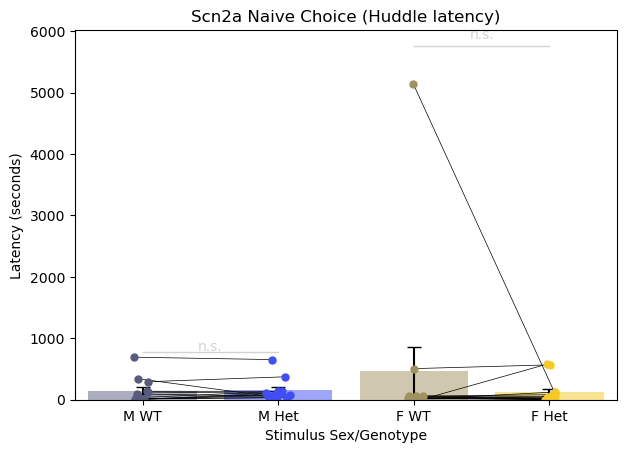

In [497]:
NC_huddle = NC_StatGraph_new(NC_chambertime,'huddle',mode='paired',metric='lat')

Male Left vs Right chamber: p = 0.105, paired t-test
Female Left vs Right chamber: p = 0.08, paired t-test


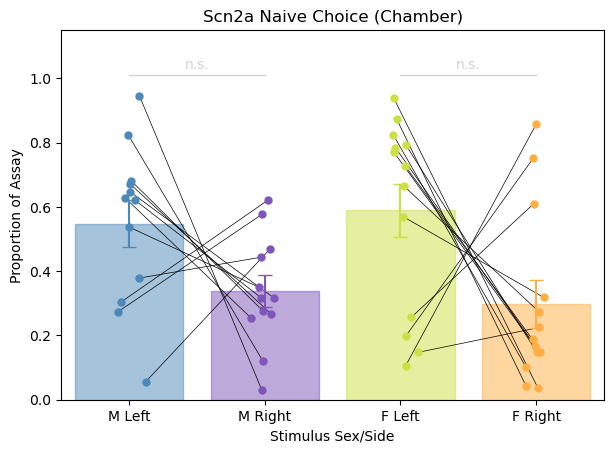

In [498]:
NC_sideBias = NC_SideBiasGraph_new(NC_chambertime,'side')

Male Left vs Right huddle: p = 0.058, paired t-test
Female Left vs Right huddle: p = 0.244, wilcoxon signed-rank test


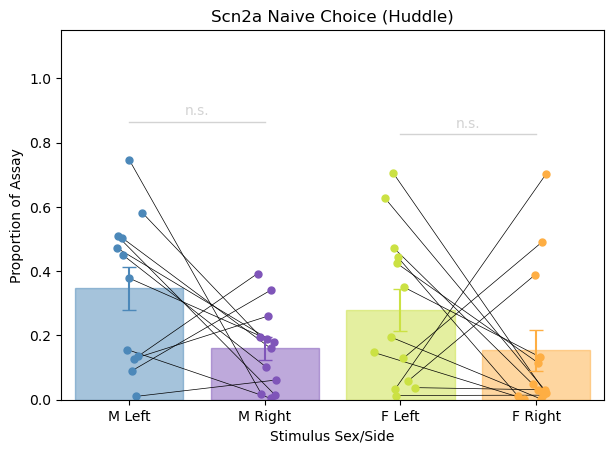

In [499]:
NC_sideBias_huddle = NC_SideBiasGraph_new(NC_chambertime,'huddle')

Male Huddle Index vs 0: p = 0.173, 1-sample t-test, null = 0
Female Huddle Index vs 0: p = 0.173, 1-sample t-test, null = 0


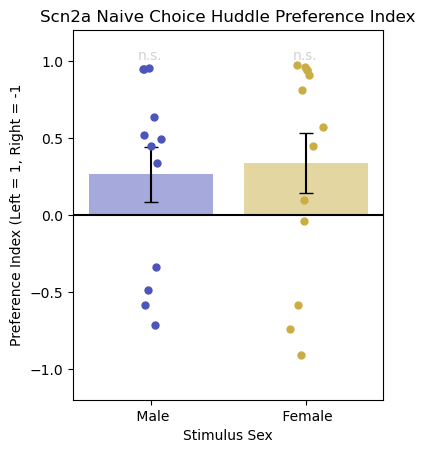

In [500]:
NC_sideBias_huddle = NC_SideBiasGraph_new(NC_chambertime,'huddle',mode='index')

## Cumulative huddle

### Code

In [759]:
def testNormal(inp, alpha=0.05):
    if len(inp) >= 20:
        #This function is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality
        results = scipy.stats.normaltest(inp) 
        p_values = results.pvalue
        normal_method = "D'Agostino-Pearson test (combined kurtosis + skewness)"
        if p_value > alpha: isnormal = True
        elif p_value <= alpha: isnormal = False
    else: 
        #For n<20, we have to rely on a Monte Carlo approach to test skew and kurtosis (kurtosistest is only valid n>=20) 
        rvs = lambda size: scipy.stats.norm.rvs(size=size, random_state=np.random.default_rng())
        skew_results = scipy.stats.monte_carlo_test(inp, rvs, scipy.stats.skew, vectorized=True)
        kurtosis_results = scipy.stats.monte_carlo_test(inp, rvs, scipy.stats.kurtosis, vectorized=True)
        p_values = [skew_results.pvalue, kurtosis_results.pvalue]
        normal_method = "Monte Carlo method (Fisher kurtosis + Fisher-Pearson skewness)"
        # data is only treated as normal if it has both normal skew and kurtosis
        if p_values[0] > 0.05 and p_values[1] > alpha: isnormal = True
        else: isnormal = False
    return isnormal, p_values, normal_method
def generate_ps(WT_DF, HT_DF):
    ps = []
    tests = []
    for idx in WT_DF.index:
        if idx > 0:
            stat, p = scipy.stats.mannwhitneyu(WT_DF.loc[idx,:], HT_DF.loc[idx,:])
            test = 'mann-whitney u test'
            ps.append(p)
            tests.append(test)
        else:
            ps.append(1)
            tests.append('none')
    return ps, tests



In [627]:
def identify_MOATside(groupDF, chambertimeDF,PI_thresh=0.25):
    NC_ID = groupDF.index.name
    target_geno_PI = chambertimeDF[chambertimeDF.index==NC_ID]['Huddle_geno_PI'].values[0]
    Het_Side = chambertimeDF[chambertimeDF.index==NC_ID]['Het_Side'].values[0]
    if target_geno_PI >=PI_thresh: #NOTE: Ruchira set threshold at 0 (i.e. excluded no animals)
        MOAT = 'WT'
        if Het_Side == 'Left': MOAT_side = 'Right'
        elif Het_Side == 'Right': MOAT_side = 'Left'
    elif target_geno_PI <=-PI_thresh: 
        MOAT = 'HT'
        MOAT_side = Het_Side
    else: 
        MOAT = 'None'
        MOAT_side = 'None'

    return NC_ID, MOAT_side

def adjust_starts(df, start_time):

    start_col = [col for col in df.columns if col.endswith('start')][0]
    stop_col = [col for col in df.columns if col.endswith('stop')][0]
    starts = []
    stops = []
    for start in df[start_col]: starts.append(start - start_time)
    for stop in df[stop_col]: stops.append(stop - start_time)

    df.insert(2, start_col+'_adj', starts)
    df.insert(3, stop_col+'_adj', stops)

    return df

def cumulative_duration(time, df, start_col, stop_col, dur_col):
    completed_duration = np.sum(df[(df[start_col]<time) & (df[stop_col]<time)][dur_col]) #sum of durations for events completed before "time"
    
    if len(df[(df[start_col]<time) & (df[stop_col]>time)][start_col].values) == 0: remainder = 0
    else: remainder = time - df[(df[start_col]<time) & (df[stop_col]>time)][start_col].values[0] # for events split at "time," subtract start time from "time"
    
    cumulative_duration = completed_duration + remainder
    return cumulative_duration

def cumulative_duration_list(df, times):
    start_col = [col for col in df.columns if col.endswith('start_adj')][0]
    stop_col = [col for col in df.columns if col.endswith('stop_adj')][0]
    dur_col = [col for col in df.columns if col.endswith('duration')][0]
    cumulative_time = []
    for time in times:
        if time > 0: cumulative_time.append(cumulative_duration(time, df, start_col, 
                                                                stop_col, dur_col))
        elif time == 0: cumulative_time.append(0)
        else: print('Error: Negative time')
    return cumulative_time

def cumulative_MOAT_LOAT(groupDF, side_or_huddle = 'huddle', prop_or_sec = 'prop_assay'):

    NC_ID, MOAT_side = identify_MOATside(groupDF, NC_chambertime)
    print('analyzing '+NC_ID)
    print('... MOAT side = '+ MOAT_side)
    
    if MOAT_side == 'None': 
        print('...skipping')
        return 'None', MOAT_side
    else:
        if side_or_huddle == 'side' or side_or_huddle == 'chamber': 
            MOAT_col = MOAT_side
            if MOAT_side == 'Left': LOAT_col = 'Right'
            elif MOAT_side == 'Right': LOAT_col = 'Left'
            side_or_huddle_word = 'Chamber'
        elif side_or_huddle == 'huddle':
            MOAT_col = 'Huddle_'+MOAT_side
            if MOAT_side == 'Left': LOAT_col = 'Huddle_Right'
            elif MOAT_side == 'Right': LOAT_col = 'Huddle_Left'
            side_or_huddle_word = 'Huddle'
        print('... generating cumulative durations for '+side_or_huddle_word.lower())
    
        MOAT_DF = pd.DataFrame(data={'MOAT_start': groupDF[MOAT_col+'_start'],
                                    'MOAT_stop': groupDF[MOAT_col+'_stop'],
                                    'MOAT_duration': groupDF[MOAT_col+'_duration']})
        MOAT_DF = MOAT_DF.dropna(axis=0, how='all')
        LOAT_DF = pd.DataFrame(data={'LOAT_start': groupDF[LOAT_col+'_start'],
                                    'LOAT_stop': groupDF[LOAT_col+'_stop'],
                                    'LOAT_duration': groupDF[LOAT_col+'_duration']})
        LOAT_DF = LOAT_DF.dropna(axis=0, how='all')
        
        start_time = np.min(groupDF.loc[0,['Center_start', 'Left_start', 'Right_start', 
                            'Huddle_Right_start', 'Huddle_Left_start']].values)
        
        MOAT_DF = adjust_starts(MOAT_DF, start_time)
        LOAT_DF = adjust_starts(LOAT_DF, start_time)
        
        times = [i for i in range(0,21601,300)]
        MOAT_list = cumulative_duration_list(MOAT_DF, times)
        LOAT_list = cumulative_duration_list(LOAT_DF, times)

        if prop_or_sec == 'prop_assay':
            MOAT_list = [i/21600 for i in MOAT_list]
            LOAT_list = [i/21600 for i in LOAT_list]
        elif prop_or_sec == 'prop_behavior':
            MOAT_list = [i/MOAT_list[-1] for i in MOAT_list]
            LOAT_list = [i/LOAT_list[-1] for i in LOAT_list]
        
        MOAT_LOAT_cmltv = pd.DataFrame(data = {NC_ID+'_MOAT':MOAT_list, NC_ID+'_LOAT':LOAT_list},index = times)
        
        return MOAT_LOAT_cmltv, MOAT_side


### Plots

In [628]:
cumulativeList = []
for groupDF in groupList:
    cumulativeDF, MOAT_side = cumulative_MOAT_LOAT(groupDF, side_or_huddle = 'huddle', prop_or_sec = 'prop_assay')
    if MOAT_side != 'None': cumulativeList.append(cumulativeDF)
cumulativeDF = pd.concat(cumulativeList, axis=1)
cumulativeDF.head()

analyzing NC6
... MOAT side = Left
... generating cumulative durations for huddle
analyzing NC25
... MOAT side = Left
... generating cumulative durations for huddle
analyzing NC18
... MOAT side = Right
... generating cumulative durations for huddle
analyzing NC22
... MOAT side = Left
... generating cumulative durations for huddle
analyzing NC10
... MOAT side = Left
... generating cumulative durations for huddle
analyzing NC24
... MOAT side = Left
... generating cumulative durations for huddle
analyzing NC30
... MOAT side = Left
... generating cumulative durations for huddle
analyzing NC8
... MOAT side = Left
... generating cumulative durations for huddle
analyzing NC29
... MOAT side = Left
... generating cumulative durations for huddle
analyzing NC1
... MOAT side = Left
... generating cumulative durations for huddle
analyzing NC15
... MOAT side = Left
... generating cumulative durations for huddle
analyzing NC13
... MOAT side = None
...skipping
analyzing NC14
... MOAT side = Left
... g

,NC6_MOAT,NC6_LOAT,NC25_MOAT,NC25_LOAT,NC18_MOAT,NC18_LOAT,NC22_MOAT,NC22_LOAT,NC10_MOAT,NC10_LOAT,...,NC32_MOAT,NC32_LOAT,NC19_MOAT,NC19_LOAT,NC33_MOAT,NC33_LOAT,NC31_MOAT,NC31_LOAT,NC5_MOAT,NC5_LOAT
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
300,0.003101,0.000042,0.003034,0.001962,0.000000,0.000000,0.000635,0.000397,0.003759,0.000630,...,0.003653,0.003626,0.002318,0.000826,0.000492,0.000630,0.000000,0.000000,0.001281,0.007890
600,0.007444,0.000345,0.005050,0.005592,0.001471,0.000498,0.001592,0.000557,0.006453,0.000899,...,0.005733,0.005054,0.003813,0.000826,0.000753,0.000850,0.000000,0.000000,0.001381,0.012920
900,0.011958,0.000539,0.006857,0.007700,0.005479,0.003850,0.003377,0.000986,0.006724,0.000899,...,0.007594,0.006167,0.004426,0.002144,0.002730,0.000850,0.001977,0.000096,0.002441,0.012920
1200,0.016873,0.000676,0.008293,0.012201,0.005855,0.006059,0.004012,0.000986,0.008290,0.000907,...,0.009579,0.008581,0.004426,0.003897,0.005559,0.002424,0.002289,0.000829,0.004998,0.015356


N=6 WT-preferring N=6 HT-preferring


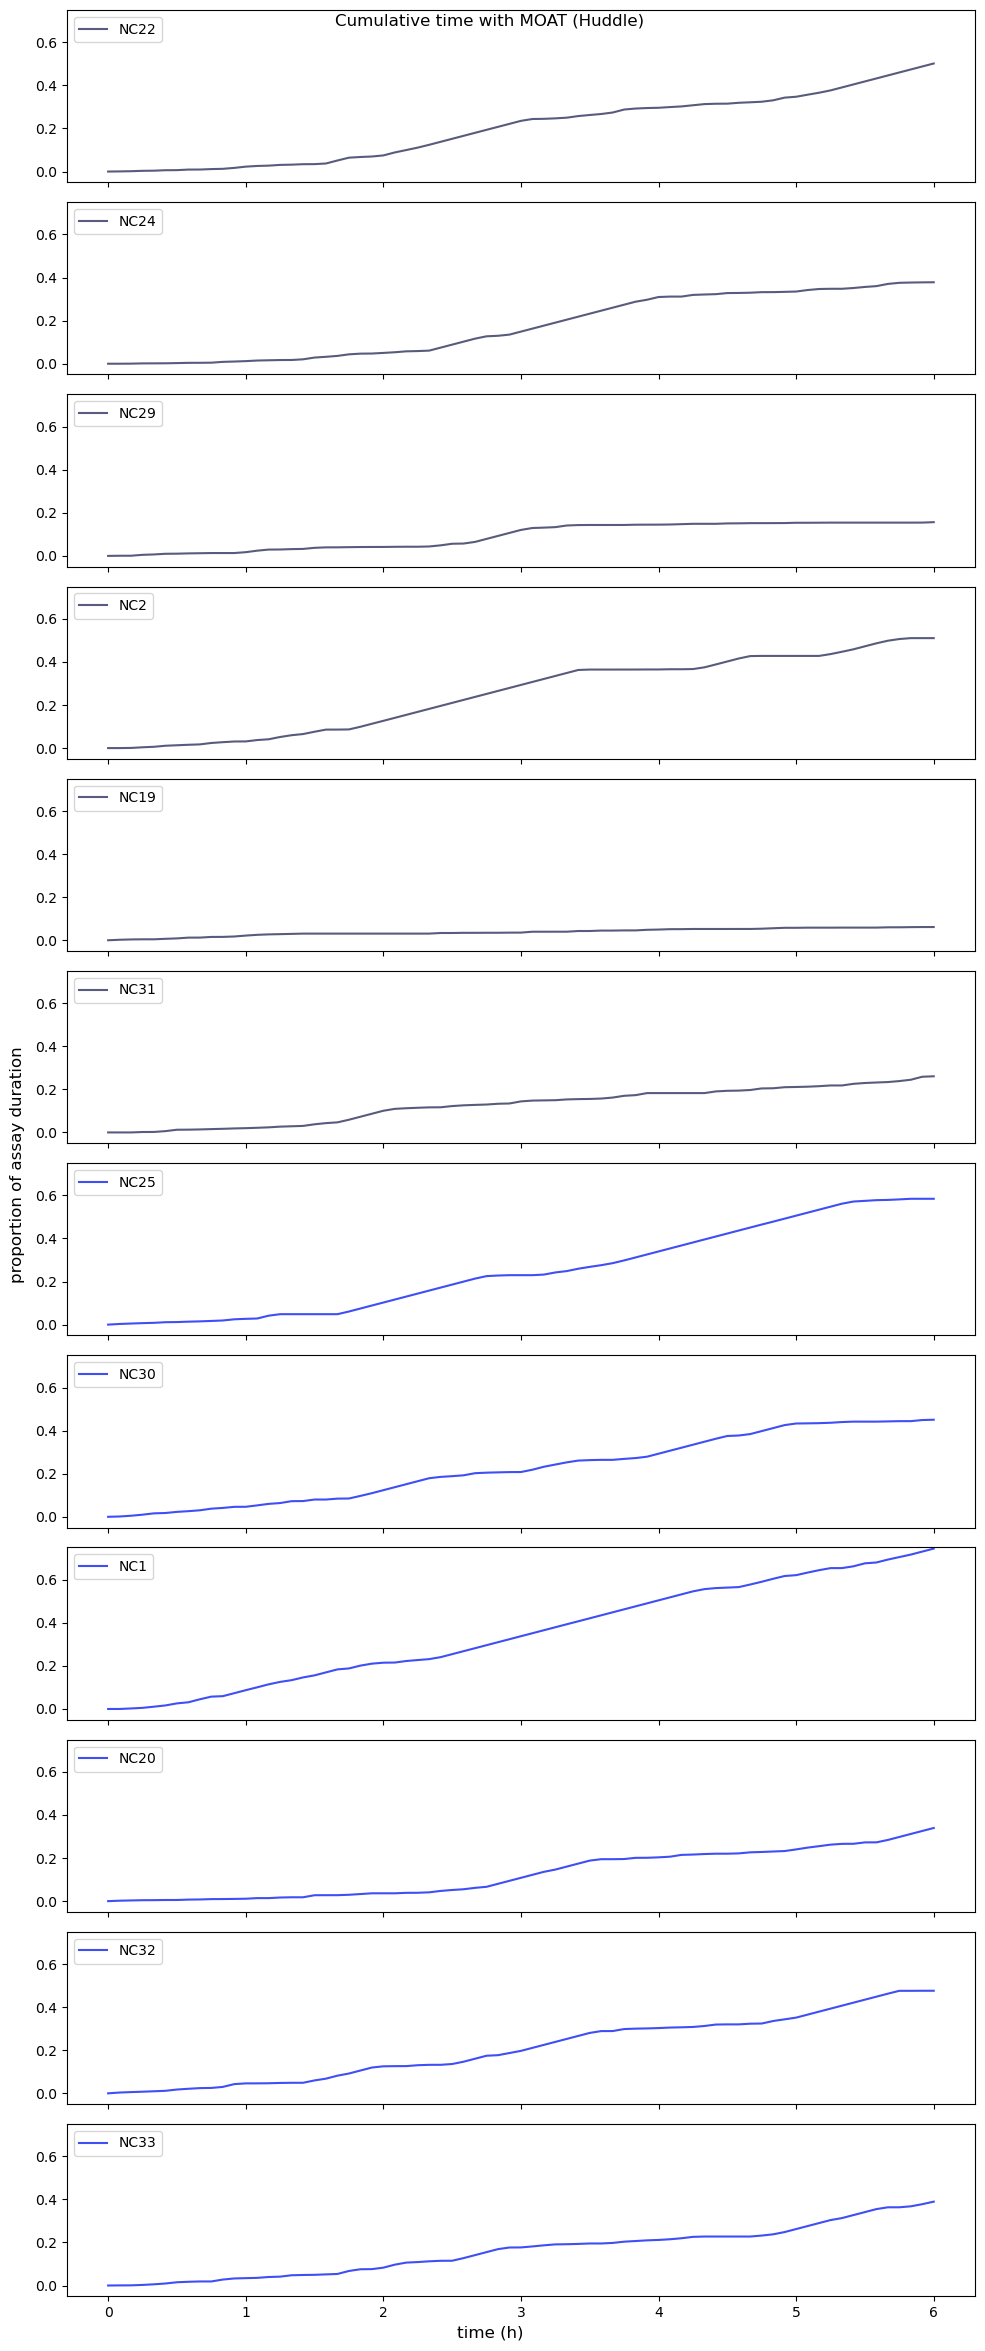

In [749]:


sex = 'M'
chambertimeDF = NC_chambertime
cmltvDF = cumulativeDF


def plot_cumulative_moat(cmltvDF, chambertimeDF, sex = 'both', side_or_huddle = 'huddle', PI_thresh=0.25, mode = 'averaged', 

acols = [[0.627451,   0.57254905, 0.37254903], # all colors
    [0.9607843,  0.7882353,  0.15294118],
    [0.34901962, 0.35686275, 0.49019608],
    [0.24705882, 0.30588236, 0.9607843 ]]

if sex == 'F': colors = acols[0:2] # female colors, WT first
elif sex == 'M': colors = acols[2:] # male colors, WT first    

WT_MOAT = NC_chambertime[(NC_chambertime['Huddle_geno_PI']>PI_thresh) & (
    NC_chambertime['Het_Sex']==sex) & (
    NC_chambertime['Unknown_sec']<60)].index
HT_MOAT = NC_chambertime[(NC_chambertime['Huddle_geno_PI']<-PI_thresh) & (
    NC_chambertime['Het_Sex']==sex) & (
    NC_chambertime['Unknown_sec']<60)].index
WT_MOAT_cols = [col for col in cmltvDF.columns if (col.split('_')[0] in WT_MOAT
                                        ) & (col.endswith('MOAT'))]
HT_MOAT_cols = [col for col in cmltvDF.columns if (col.split('_')[0] in HT_MOAT
                                        ) & (col.endswith('MOAT'))]

WT_DF = cmltvDF[WT_MOAT_cols]
HT_DF = cmltvDF[HT_MOAT_cols]

if mode == 'individual':

    total_samples = len(WT_DF.columns) + len(HT_DF.columns)
    
    fig, axs = plt.subplots(total_samples,1,figsize = [10,2*total_samples],sharex=True, sharey=True)
    for ax, column in zip(axs[0:len(WT_DF.columns)],WT_DF.columns):
        ax.plot(WT_DF.index, WT_DF[column], color= colors[0])
        ax.set_xticks(range(0,21601,3600),[0,1,2,3,4,5,6])
        ax.legend(column.split('_'),loc='upper left')
        ax.set_ylim([-0.05,0.75])
    for ax, column in zip(axs[len(WT_DF.columns):],HT_DF.columns):
        ax.plot(HT_DF.index, HT_DF[column], color= colors[1])
        ax.set_xticks(range(0,21601,3600),[0,1,2,3,4,5,6])
        ax.legend(column.split('_'),loc='upper left')
        ax.set_ylim([-0.05,0.75])
    fig.supxlabel('time (h)')
    fig.supylabel('proportion of assay duration')
    fig.suptitle('Cumulative time with MOAT ('+side_or_huddle.title()+')')
    fig.tight_layout()
    
    print('N='+str(len(WT_DF.columns))+' WT-preferring', 'N='+str(len(HT_DF.columns))+' HT-preferring')

elif mode == 'averaged':
    fig, ax = plt.subplots(2,1,figsize = [10,10])
    
    
    for sex, i in zip(['M','F'],[0,1]):
    
        WT_MOAT = NC_chambertime[(NC_chambertime['Huddle_geno_PI']>PI_thresh) & (
            NC_chambertime['Het_Sex']==sex) & (
            NC_chambertime['Unknown_sec']<60)].index
        HT_MOAT = NC_chambertime[(NC_chambertime['Huddle_geno_PI']<-PI_thresh) & (
            NC_chambertime['Het_Sex']==sex) & (
            NC_chambertime['Unknown_sec']<60)].index
        WT_MOAT_cols = [col for col in cmltvDF.columns if (col.split('_')[0] in WT_MOAT
                                                ) & (col.endswith('MOAT'))]
        HT_MOAT_cols = [col for col in cmltvDF.columns if (col.split('_')[0] in HT_MOAT
                                                ) & (col.endswith('MOAT'))]
        
        WT_DF = cmltvDF[WT_MOAT_cols]
        HT_DF = cmltvDF[HT_MOAT_cols]
        
        WT_mean = np.average(WT_DF,axis=1)
        WT_sem = scipy.stats.sem(WT_DF,axis=1)
        HT_mean = np.average(HT_DF,axis=1)
        HT_sem = scipy.stats.sem(HT_DF,axis=1)
    
        ps, tests = generate_ps(WT_DF, HT_DF)
        pThresh = [p<alpha for p in ps]
        
        ax[i].plot(WT_DF.index, WT_mean, color= colors[0], label = 'WT MOAT mean +/- sem')
        ax[i].fill_between(WT_DF.index, [y-er for y, er in zip(WT_mean,WT_sem)], [y+er for y, er in zip(WT_mean,WT_sem)], color= colors[0],alpha = 0.5)
        ax[i].plot(HT_DF.index, HT_mean, color= colors[1], label = 'HT MOAT mean +/- sem')
        ax[i].fill_between(HT_DF.index, [y-er for y, er in zip(HT_mean,HT_sem)], [y+er for y, er in zip(HT_mean,HT_sem)], color= colors[1],alpha = 0.5)
    
        ax[i].scatter(x = WT_DF.index[pThresh], y = [0.7]*len(WT_DF.index[pThresh]),color = 'k',marker='_')
        
        ax[i].set_xticks(range(0,21601,3600),[0,1,2,3,4,5,6])
        ax[i].legend(loc='lower right')
        ax[i].set_ylim([-0.05,0.75])
        ax[i].set_xlabel('time (h)')
        ax[i].set_ylabel('proportion of assay duration')
        ax[i].set_title('Cumulative time with MOAT ('+side_or_huddle.title()+')')
        fig.tight_layout()

    

In [1]:
cumulativeDF.head()

NameError: name 'cumulativeDF' is not defined

N=5 WT-preferring N=6 HT-preferring


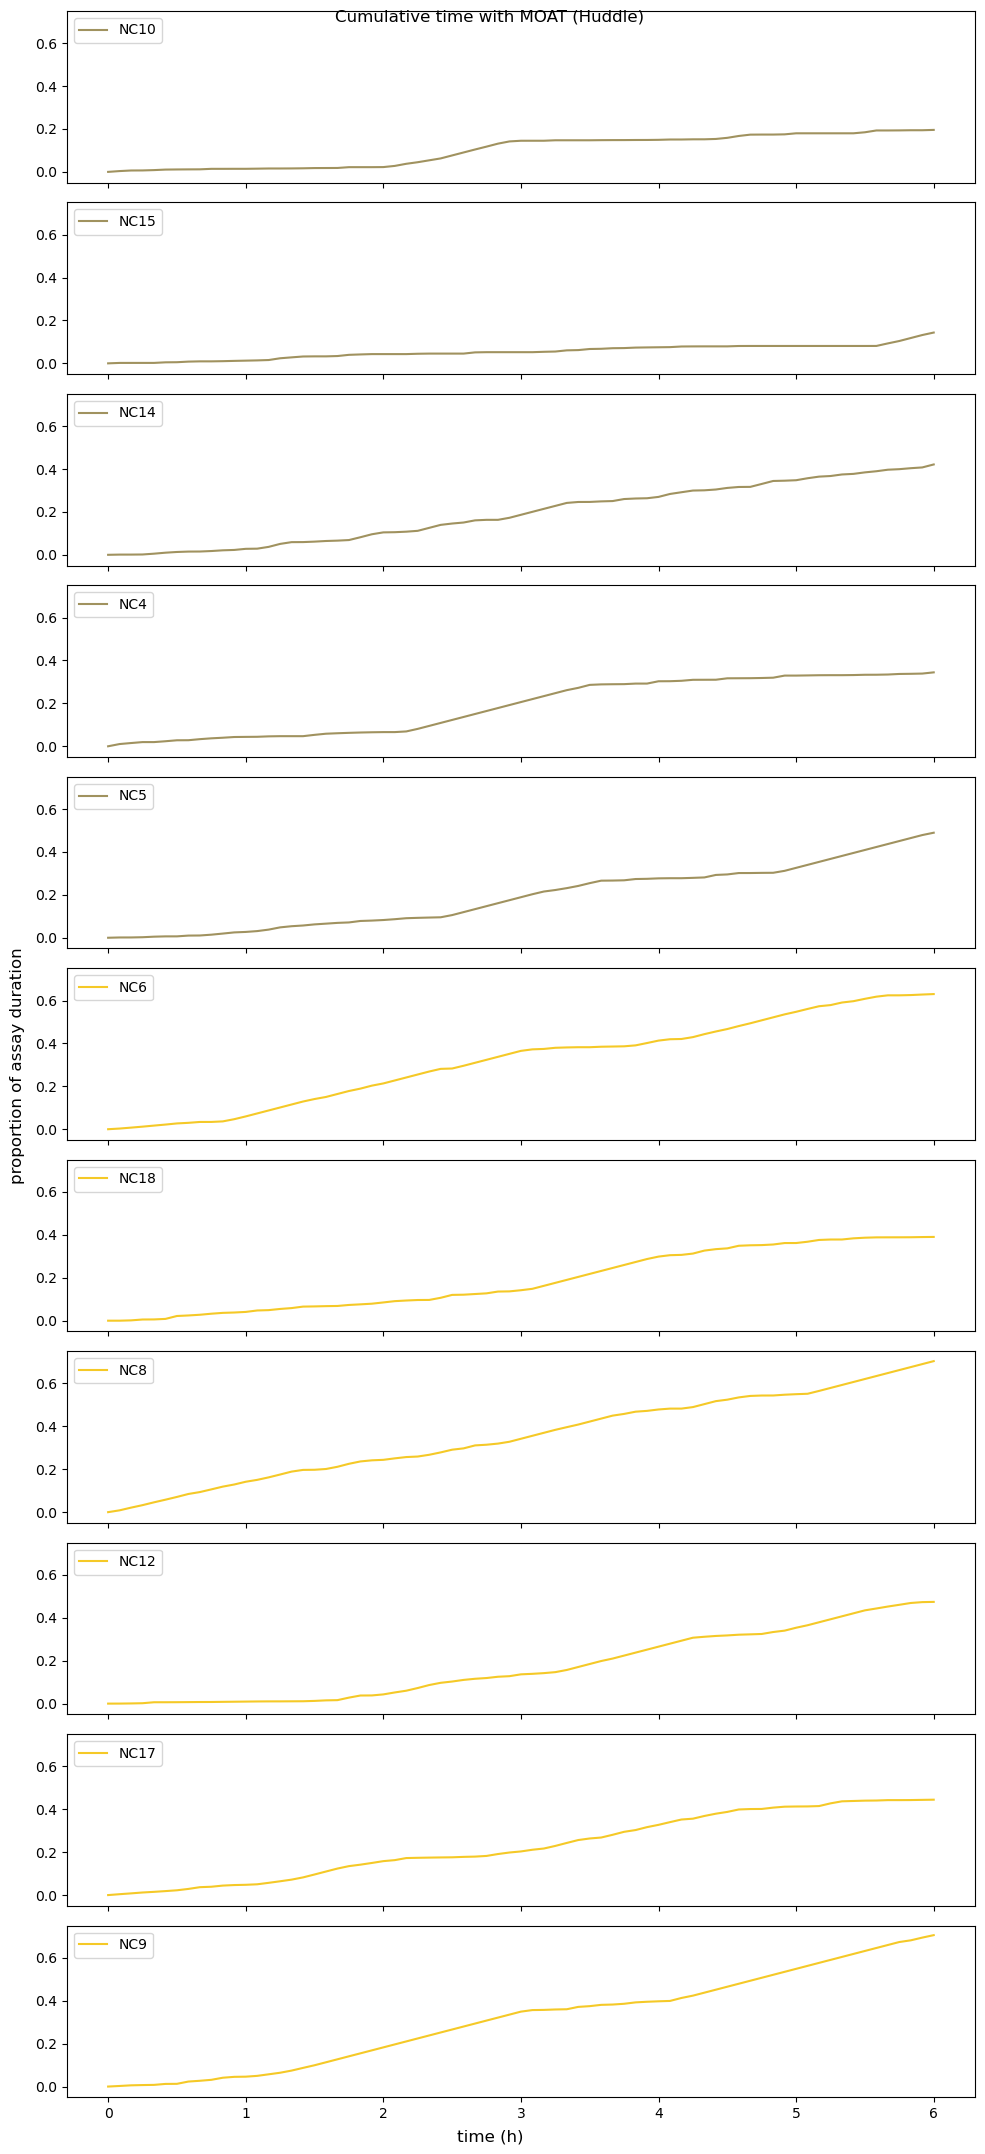

In [748]:

PI_thresh=0.25
sex = 'F'
chambertimeDF = NC_chambertime
cmltvDF = cumulativeDF
side_or_huddle = 'huddle'



acols = [[0.627451,   0.57254905, 0.37254903], # all colors
    [0.9607843,  0.7882353,  0.15294118],
    [0.34901962, 0.35686275, 0.49019608],
    [0.24705882, 0.30588236, 0.9607843 ]]

if sex == 'F': colors = acols[0:2] # female colors, WT first
elif sex == 'M': colors = acols[2:] # male colors, WT first    


WT_MOAT = NC_chambertime[(NC_chambertime['Huddle_geno_PI']>PI_thresh) & (
    NC_chambertime['Het_Sex']==sex)& (
    NC_chambertime['Unknown_sec']<60)].index
HT_MOAT = NC_chambertime[(NC_chambertime['Huddle_geno_PI']<-PI_thresh) & (
    NC_chambertime['Het_Sex']==sex)& (
    NC_chambertime['Unknown_sec']<60)].index
WT_MOAT_cols = [col for col in cmltvDF.columns if (col.split('_')[0] in WT_MOAT
                                        ) & (col.endswith('MOAT'))]
HT_MOAT_cols = [col for col in cmltvDF.columns if (col.split('_')[0] in HT_MOAT
                                        ) & (col.endswith('MOAT'))]

WT_DF = cmltvDF[WT_MOAT_cols]
HT_DF = cmltvDF[HT_MOAT_cols]

total_samples = len(WT_DF.columns) + len(HT_DF.columns)


fig, axs = plt.subplots(total_samples,1,figsize = [10,2*total_samples],sharex=True, sharey=True)
for ax, column in zip(axs[0:len(WT_DF.columns)],WT_DF.columns):
    ax.plot(WT_DF.index, WT_DF[column], color= colors[0])
    ax.set_xticks(range(0,21601,3600),[0,1,2,3,4,5,6])
    ax.legend(column.split('_'),loc='upper left')
    ax.set_ylim([-0.05,0.75])
for ax, column in zip(axs[len(WT_DF.columns):],HT_DF.columns):
    ax.plot(HT_DF.index, HT_DF[column], color= colors[1])
    ax.set_xticks(range(0,21601,3600),[0,1,2,3,4,5,6])
    ax.legend(column.split('_'),loc='upper left')
    ax.set_ylim([-0.05,0.75])
fig.supxlabel('time (h)')
fig.supylabel('proportion of assay duration')
fig.suptitle('Cumulative time with MOAT ('+side_or_huddle.title()+')')
fig.tight_layout()
print('N='+str(len(WT_DF.columns))+' WT-preferring', 'N='+str(len(HT_DF.columns))+' HT-preferring')

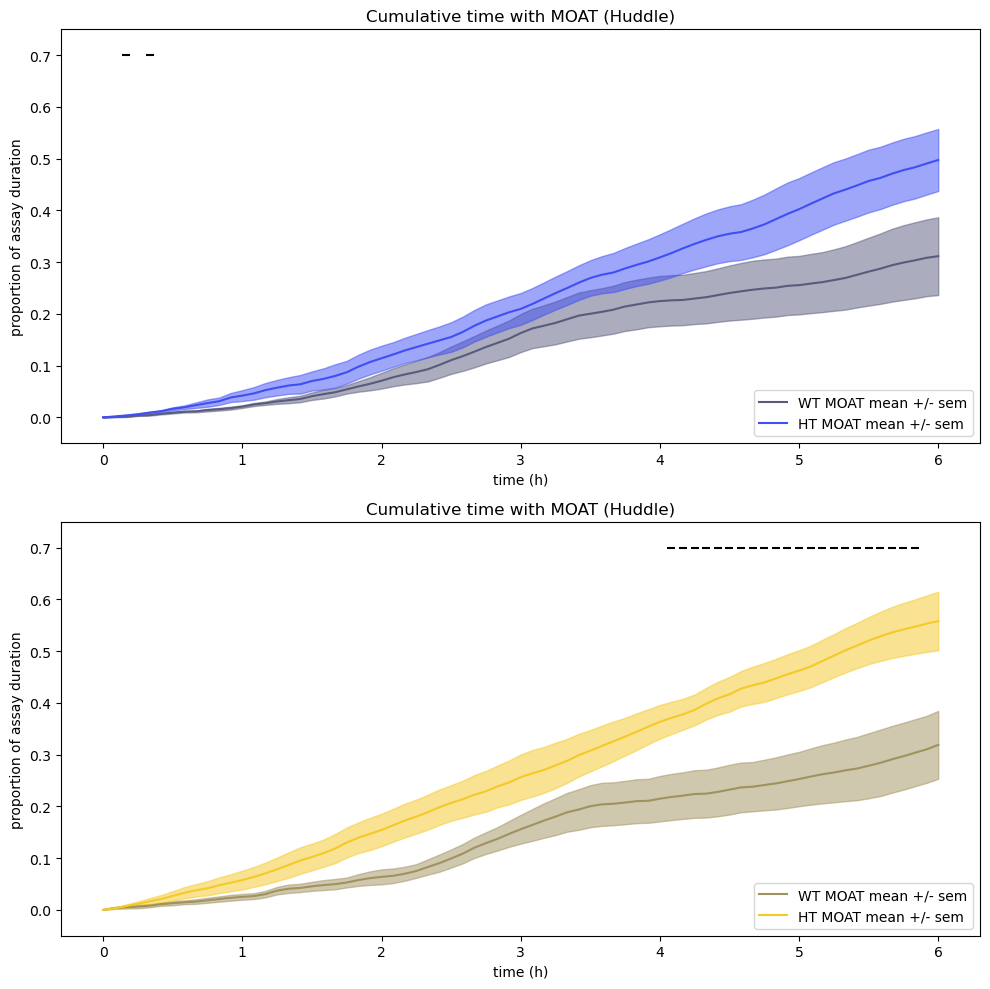

In [758]:
fig, ax = plt.subplots(2,1,figsize = [10,10])
alpha = 0.05

for sex, i in zip(['M','F'],[0,1]):

    acols = [[0.627451,   0.57254905, 0.37254903], # all colors
    [0.9607843,  0.7882353,  0.15294118],
    [0.34901962, 0.35686275, 0.49019608],
    [0.24705882, 0.30588236, 0.9607843 ]]

    if sex == 'F': colors = acols[0:2] # female colors, WT first
    elif sex == 'M': colors = acols[2:] # male colors, WT first    
    
    WT_MOAT = NC_chambertime[(NC_chambertime['Huddle_geno_PI']>PI_thresh) & (
        NC_chambertime['Het_Sex']==sex) & (
        NC_chambertime['Unknown_sec']<60)].index
    HT_MOAT = NC_chambertime[(NC_chambertime['Huddle_geno_PI']<-PI_thresh) & (
        NC_chambertime['Het_Sex']==sex) & (
        NC_chambertime['Unknown_sec']<60)].index
    WT_MOAT_cols = [col for col in cmltvDF.columns if (col.split('_')[0] in WT_MOAT
                                            ) & (col.endswith('MOAT'))]
    HT_MOAT_cols = [col for col in cmltvDF.columns if (col.split('_')[0] in HT_MOAT
                                            ) & (col.endswith('MOAT'))]
    
    WT_DF = cmltvDF[WT_MOAT_cols]
    HT_DF = cmltvDF[HT_MOAT_cols]
    
    WT_mean = np.average(WT_DF,axis=1)
    WT_sem = scipy.stats.sem(WT_DF,axis=1)
    HT_mean = np.average(HT_DF,axis=1)
    HT_sem = scipy.stats.sem(HT_DF,axis=1)

    ps, tests = generate_ps(WT_DF, HT_DF)
    pThresh = [p<alpha for p in ps]
    
    ax[i].plot(WT_DF.index, WT_mean, color= colors[0], label = 'WT MOAT mean +/- sem')
    ax[i].fill_between(WT_DF.index, [y-er for y, er in zip(WT_mean,WT_sem)], [y+er for y, er in zip(WT_mean,WT_sem)], color= colors[0],alpha = 0.5)
    ax[i].plot(HT_DF.index, HT_mean, color= colors[1], label = 'HT MOAT mean +/- sem')
    ax[i].fill_between(HT_DF.index, [y-er for y, er in zip(HT_mean,HT_sem)], [y+er for y, er in zip(HT_mean,HT_sem)], color= colors[1],alpha = 0.5)

    ax[i].scatter(x = WT_DF.index[pThresh], y = [0.7]*len(WT_DF.index[pThresh]),color = 'k',marker='_')
    
    ax[i].set_xticks(range(0,21601,3600),[0,1,2,3,4,5,6])
    ax[i].legend(loc='lower right')
    ax[i].set_ylim([-0.05,0.75])
    ax[i].set_xlabel('time (h)')
    ax[i].set_ylabel('proportion of assay duration')
    ax[i].set_title('Cumulative time with MOAT ('+side_or_huddle.title()+')')
    fig.tight_layout()


## Contact distributions

In [783]:
NC_chambertime.head()

,NC,Het_Sex,Het_Side,Center_ct,Center_lat,Center_prop,Center_sec,Huddle_Center_ct,Huddle_Center_lat,Huddle_Center_prop,...,WT_sec,Huddle_HT_ct,Huddle_HT_lat,Huddle_HT_prop,Huddle_HT_sec,HT_ct,HT_lat,HT_prop,HT_sec,Huddle_geno_PI
NC1,1,M,Left,68.0,0.0,0.023886,517.466664,0.0,0.0,0.000000,...,639.850000,696.0,373.383333,0.745278,16145.683310,716.0,372.083333,0.946579,20506.650006,-0.954287
NC2,2,M,Right,129.0,0.0,0.060288,1305.050008,0.0,0.0,0.000000,...,14543.299987,469.0,40.400000,0.013590,294.183379,493.0,47.350000,0.267866,5798.450005,0.948025
NC4,4,F,Right,338.0,0.0,0.112434,2447.416667,0.0,0.0,0.000000,...,12393.633333,994.0,577.666667,0.133795,2912.400000,1111.0,89.883333,0.318206,6926.600000,0.446484
NC5,5,F,Left,192.0,0.0,0.049301,1072.816667,0.0,0.0,0.000063,...,16344.050000,731.0,51.666667,0.128282,2791.483333,787.0,49.833333,0.199610,4343.616667,0.584727
NC6,6,F,Left,260.0,0.0,0.068117,1481.516676,0.0,0.0,0.000000,...,3210.866658,946.0,81.383333,0.626685,13630.199980,1040.0,75.450000,0.784255,17057.299996,-0.909729


In [786]:
chambertimeDF = NC_chambertime

WTM_durations = []
HTM_durations = []
WTF_durations = []
HTF_durations = []

for groupDF in groupList:
    NC_ID = groupDF.index.name
    Het_Side = chambertimeDF[chambertimeDF.index==NC_ID]['Het_Side'].values[0]
    Het_Sex = chambertimeDF[chambertimeDF.index==NC_ID]['Het_Sex'].values[0]

    unknown_s = chambertimeDF[chambertimeDF.index==NC_ID]['Unknown_sec'].values[0]

    if unknown_s < 60:
        print('...adding '+NC_ID +' contacts to list')
        HT_duration = groupDF['Huddle_' + Het_Side + '_duration'].dropna()
        if Het_Side == 'Left': WT_duration = groupDF['Huddle_Right_duration'].dropna()
        elif Het_Side == 'Right': WT_duration = groupDF['Huddle_Left_duration'].dropna()

        if Het_Sex == 'M':
            WTM_durations.append(WT_duration)
            HTM_durations.append(HT_duration)
        elif Het_Sex == 'F':
            WTF_durations.append(WT_duration)
            HTF_durations.append(HT_duration)
        
    else: print('...excluding '+NC_ID +' contacts from list (unknown duration = '+str(round(unknown_s,2))+' seconds)')


WTMdurDF = pd.concat(WTM_durations)
HTMdurDF = pd.concat(HTM_durations)
WTFdurDF = pd.concat(WTF_durations)
HTFdurDF = pd.concat(HTF_durations)

print('Completed.')
print('Total WT male contacts = '+str(len(WTMdurDF))+'. Total HT male contacts = '+str(len(HTMdurDF))+'.')
print('Total WT female contacts = '+str(len(WTFdurDF))+'. Total HT female contacts = '+str(len(HTFdurDF))+'.')

...adding NC6 contacts to list
...adding NC25 contacts to list
...adding NC18 contacts to list
...adding NC22 contacts to list
...adding NC10 contacts to list
...adding NC24 contacts to list
...adding NC30 contacts to list
...adding NC8 contacts to list
...adding NC29 contacts to list
...adding NC1 contacts to list
...adding NC15 contacts to list
...adding NC13 contacts to list
...adding NC14 contacts to list
...adding NC2 contacts to list
...excluding NC16 contacts from list (unknown duration = 559.12 seconds)
...adding NC4 contacts to list
...adding NC12 contacts to list
...adding NC20 contacts to list
...adding NC17 contacts to list
...adding NC9 contacts to list
...adding NC11 contacts to list
...adding NC32 contacts to list
...adding NC19 contacts to list
...adding NC33 contacts to list
...adding NC31 contacts to list
...adding NC5 contacts to list
Completed.
Total WT male contacts = 7384. Total HT male contacts = 7154.
Total WT female contacts = 11757. Total HT female contacts = 

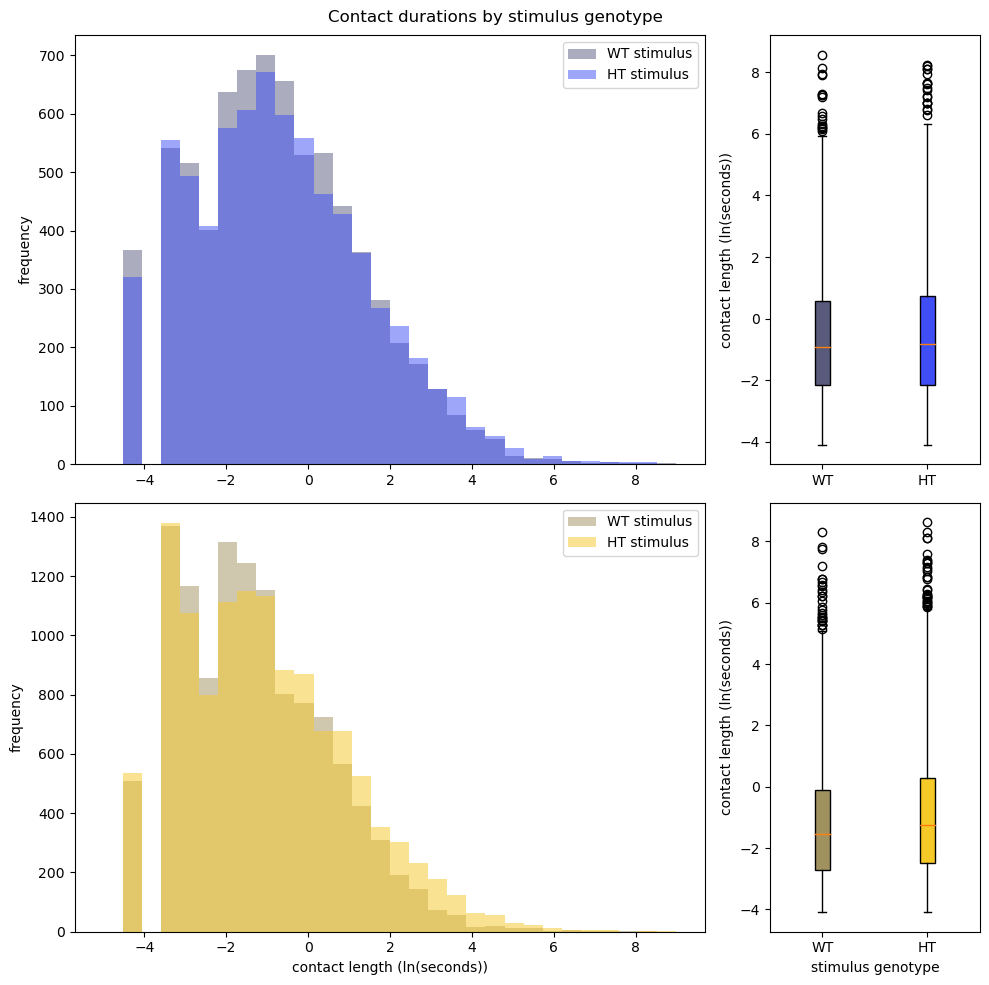

In [868]:

acols = [[0.627451,   0.57254905, 0.37254903],
         [0.9607843,  0.7882353,  0.15294118],
         [0.34901962, 0.35686275, 0.49019608],
         [0.24705882, 0.30588236, 0.9607843 ]]

fig, ax = plt.subplots(2,2,figsize = [10,10], gridspec_kw={'width_ratios': [3, 1]})
alpha = 0.05

for sex, i, DFs in zip(['M','F'],[0,1],[[WTMdurDF,HTMdurDF],[WTFdurDF,HTFdurDF]]):

    if sex == 'F': colors = acols[0:2] # female colors, WT first
    elif sex == 'M': colors = acols[2:] # male colors, WT first    

    ax[i,0].hist(np.log(DFs[0].values), bins = 30, color = colors[0],range = (-5,9), alpha=0.5,label = 'WT stimulus')
    ax[i,0].hist(np.log(DFs[1].values), bins = 30,color = colors[1],range = (-5,9), alpha=0.5, label = 'HT stimulus')
    ax[i,0].legend()
    ax[i,0].set_ylabel('frequency')

    bplot = ax[i,1].boxplot([np.log(DFs[0].values),np.log(DFs[1].values)], patch_artist=True, whis = 2)
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    ax[i,1].set_xticks([1,2],['WT', 'HT'])
    ax[i,1].set_ylabel('contact length (ln(seconds))')

ax[1,1].set_xlabel('stimulus genotype')
ax[1,0].set_xlabel('contact length (ln(seconds))')
fig.suptitle('Contact durations by stimulus genotype')
fig.tight_layout()

In [827]:
statm, pm = scipy.stats.mannwhitneyu(WTMdurDF,HTMdurDF)
print('median contact time: WT  = '+str(round(np.median(WTMdurDF),3)) + ', HT = '+str(round(np.median(HTMdurDF),3)))
print('mann-whitney u between male WT and HT contact durations: p = '+str(pm))

statf, pf = scipy.stats.mannwhitneyu(WTFdurDF,HTFdurDF)
print('median contact time: WT  = '+str(round(np.median(WTFdurDF),3)) + ', HT = '+str(round(np.median(HTFdurDF),3)))
print('mann-whitney u between female WT and HT contact durations: p = '+str(pf))

median contact time: WT  = 0.4, HT = 0.433
mann-whitney u between male WT and HT contact durations: p = 0.03119697183252977
median contact time: WT  = 0.217, HT = 0.283
mann-whitney u between female WT and HT contact durations: p = 6.860671053526951e-20


In [863]:
chambertimeDF = NC_chambertime
prefThresh = 0.25

WTM_durations = []
HTM_durations = []
WTF_durations = []
HTF_durations = []

for groupDF in groupList:
    NC_ID = groupDF.index.name
    Het_Side = chambertimeDF[chambertimeDF.index==NC_ID]['Het_Side'].values[0]
    Het_Sex = chambertimeDF[chambertimeDF.index==NC_ID]['Het_Sex'].values[0]
    prefIDX = chambertimeDF[chambertimeDF.index==NC_ID]['Huddle_geno_PI'].values[0]

    unknown_s = chambertimeDF[chambertimeDF.index==NC_ID]['Unknown_sec'].values[0]

    if unknown_s < 60:
        print('...adding '+NC_ID +' contacts to list')
        if Het_Side == 'Left': 
           if prefIDX >= prefThresh: 
               MOAT_duration = groupDF['Huddle_Right_duration'].dropna()
               MOAT_geno = 'WT'
           elif prefIDX <= -prefThresh: 
               MOAT_duration = groupDF['Huddle_Left_duration'].dropna()
               MOAT_geno = 'HT'
        elif Het_Side == 'Right': 
            if prefIDX >= prefThresh: 
                MOAT_duration = groupDF['Huddle_Left_duration'].dropna()
                MOAT_geno = 'WT'
            elif prefIDX <= -prefThresh: 
               MOAT_duration = groupDF['Huddle_Right_duration'].dropna()
               MOAT_geno = 'HT'
            
        if Het_Sex == 'M':
            if MOAT_geno == 'WT': WTM_durations.append(MOAT_duration)
            elif MOAT_geno == 'HT': HTM_durations.append(MOAT_duration)
        elif Het_Sex == 'F':
            if MOAT_geno == 'WT': WTF_durations.append(MOAT_duration)
            elif MOAT_geno == 'HT': HTF_durations.append(MOAT_duration)
        
    else: print('...excluding '+NC_ID +' contacts from list (unknown duration = '+str(round(unknown_s,2))+' seconds)')


WTMMOATdurDF = pd.concat(WTM_durations)
HTMMOATdurDF = pd.concat(HTM_durations)
WTFMOATdurDF = pd.concat(WTF_durations)
HTFMOATdurDF = pd.concat(HTF_durations)

print('Completed.')
print('Total WT male MOAT contacts = '+str(len(WTMMOATdurDF))+'. Total HT male MOAT contacts = '+str(len(HTMMOATdurDF))+'.')
print('Total WT female MOAT contacts = '+str(len(WTFMOATdurDF))+'. Total HT female MOAT contacts = '+str(len(HTFMOATdurDF))+'.')

...adding NC6 contacts to list
...adding NC25 contacts to list
...adding NC18 contacts to list
...adding NC22 contacts to list
...adding NC10 contacts to list
...adding NC24 contacts to list
...adding NC30 contacts to list
...adding NC8 contacts to list
...adding NC29 contacts to list
...adding NC1 contacts to list
...adding NC15 contacts to list
...adding NC13 contacts to list
...adding NC14 contacts to list
...adding NC2 contacts to list
...excluding NC16 contacts from list (unknown duration = 559.12 seconds)
...adding NC4 contacts to list
...adding NC12 contacts to list
...adding NC20 contacts to list
...adding NC17 contacts to list
...adding NC9 contacts to list
...adding NC11 contacts to list
...adding NC32 contacts to list
...adding NC19 contacts to list
...adding NC33 contacts to list
...adding NC31 contacts to list
...adding NC5 contacts to list
Completed.
Total WT male MOAT contacts = 4190. Total HT male MOAT contacts = 4315.
Total WT female MOAT contacts = 7931. Total HT fema

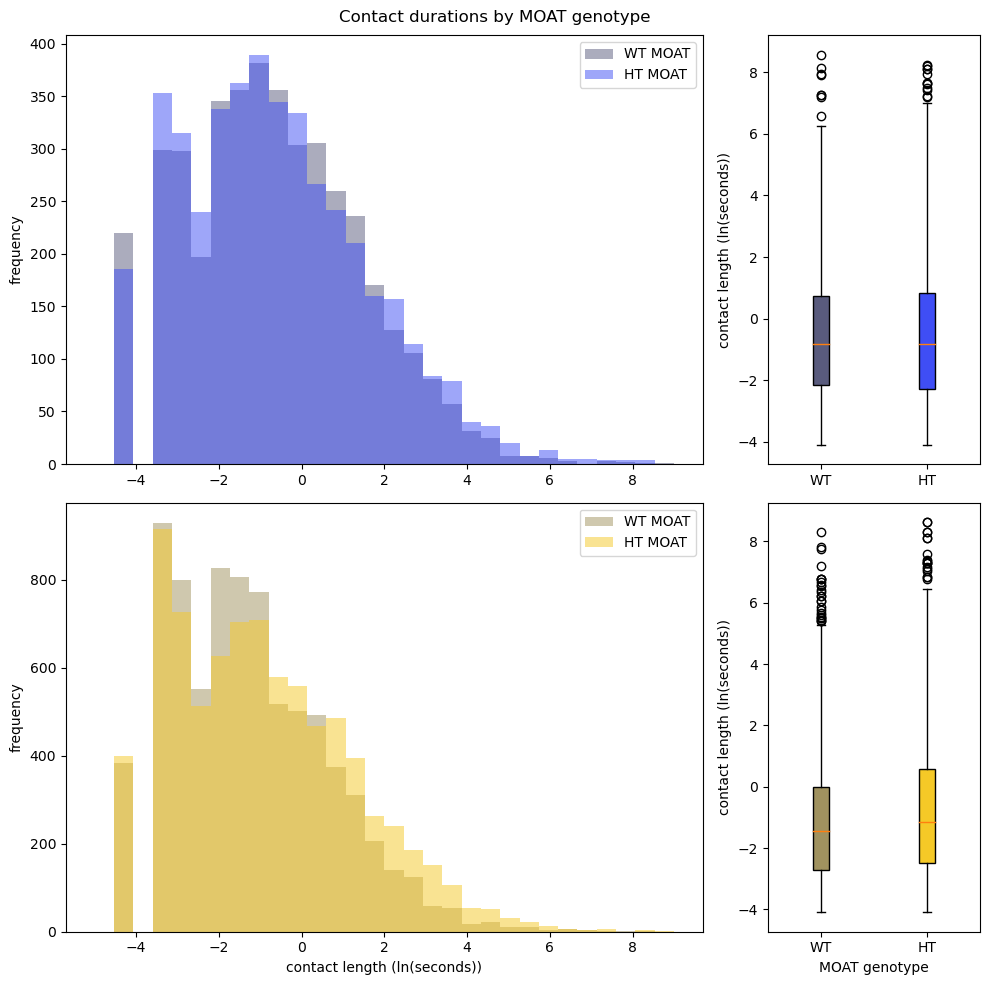

In [867]:

acols = [[0.627451,   0.57254905, 0.37254903],
         [0.9607843,  0.7882353,  0.15294118],
         [0.34901962, 0.35686275, 0.49019608],
         [0.24705882, 0.30588236, 0.9607843 ]]

fig, ax = plt.subplots(2,2,figsize = [10,10], gridspec_kw={'width_ratios': [3, 1]})
alpha = 0.05

for sex, i, DFs in zip(['M','F'],[0,1],[[WTMMOATdurDF,HTMMOATdurDF],[WTFMOATdurDF,HTFMOATdurDF]]):

    if sex == 'F': colors = acols[0:2] # female colors, WT first
    elif sex == 'M': colors = acols[2:] # male colors, WT first    

    ax[i,0].hist(np.log(DFs[0].values), bins = 30, color = colors[0],range = (-5,9), alpha=0.5,label = 'WT MOAT')
    ax[i,0].hist(np.log(DFs[1].values), bins = 30,color = colors[1],range = (-5,9), alpha=0.5, label = 'HT MOAT')
    ax[i,0].legend()
    ax[i,0].set_ylabel('frequency')

    bplot = ax[i,1].boxplot([np.log(DFs[0].values),np.log(DFs[1].values)], patch_artist=True, whis = 2)
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    ax[i,1].set_xticks([1,2],['WT', 'HT'])
    ax[i,1].set_ylabel('contact length (ln(seconds))')

ax[1,1].set_xlabel('MOAT genotype')
ax[1,0].set_xlabel('contact length (ln(seconds))')
fig.suptitle('Contact durations by MOAT genotype')
fig.tight_layout()

In [866]:
statm, pm = scipy.stats.mannwhitneyu(WTMMOATdurDF,HTMMOATdurDF)
print('median MOAT contact time: WT  = '+str(round(np.median(WTMMOATdurDF),3)) + ', HT = '+str(round(np.median(HTMMOATdurDF),3)))
print('mann-whitney u between male WT and HT MOAT contact durations: p = '+str(pm))

statf, pf = scipy.stats.mannwhitneyu(WTFMOATdurDF,HTFMOATdurDF)
print('median MOAT contact time: WT  = '+str(round(np.median(WTFMOATdurDF),3)) + ', HT = '+str(round(np.median(HTFMOATdurDF),3)))
print('mann-whitney u between female WT and HT MOAT contact durations: p = '+str(pf))

median MOAT contact time: WT  = 0.433, HT = 0.433
mann-whitney u between male WT and HT MOAT contact durations: p = 0.7633588027374948
median MOAT contact time: WT  = 0.233, HT = 0.317
mann-whitney u between female WT and HT MOAT contact durations: p = 1.5691513954559144e-22


## Sliding window and cumulative preference index

In [1107]:
def cumulative_duration(time, df, start_col, stop_col, dur_col):
    completed_duration = np.sum(df[(df[start_col]<time) & (df[stop_col]<time)][dur_col]) #sum of durations for events completed before "time"
    
    if len(df[(df[start_col]<time) & (df[stop_col]>time)][start_col].values) == 0: remainder = 0
    else: remainder = time - df[(df[start_col]<time) & (df[stop_col]>time)][start_col].values[0] # for events split at "time," subtract start time from "time"
    
    cumulative_duration = completed_duration + remainder
    return cumulative_duration

def cumulative_duration_list(df, times):
    start_col = [col for col in df.columns if col.endswith('start_adj')][0]
    stop_col = [col for col in df.columns if col.endswith('stop_adj')][0]
    dur_col = [col for col in df.columns if col.endswith('duration')][0]
    cumulative_time = []
    for time in times:
        if time > 0: cumulative_time.append(cumulative_duration(time, df, start_col, 
                                                                stop_col, dur_col))
        elif time == 0: cumulative_time.append(0)
        else: print('Error: Negative time')
    return cumulative_time



def calculate_duration_in_bins(df, starts, stops):
    
    start_col = [col for col in df.columns if col.endswith('start_adj')][0]
    stop_col = [col for col in df.columns if col.endswith('stop_adj')][0]
    dur_col = [col for col in df.columns if col.endswith('duration')][0]

    bin_durations = []
    for start, stop in zip(starts,stops):
    
        # if an event fully covers a bin, duration = bin length
        if len(df[(df[start_col]<=start) & (df[stop_col]>=stop)]) > 0: bin_duration = stop-start
        
        # if the bin is not fully within an event, need to add duration of events within bin, as well as relevant portions of events that start or stop outside the interval
        else: 
            # if an event starts and stops within the bin, add full durations
            if len(df[(df[start_col]>=start) & (df[stop_col]<=stop)]) == 0: completed = 0 
            else: completed = np.sum(df[(df[start_col]>=start) & (df[stop_col]<=stop)][dur_col])
            
            # if there is a row that starts before the bin but ends during the bin:
            if len(df[(df[start_col]<start) & (df[stop_col]>start) & (df[stop_col]<=stop)]) == 0: remainder_pre = 0 
            else: remainder_pre =df[(df[start_col]<start) & (df[stop_col]>start) & (df[stop_col]<=stop)][stop_col].values[0] - start
            
            # if there is a row that stops after the bin but starts during the bin:
            if len(df[(df[start_col]>=start) & (df[start_col]<stop) & (df[stop_col]>stop)]) == 0: remainder_post = 0 
            else: remainder_post = stop - df[(df[start_col]>=start) & (df[start_col]<stop) & (df[stop_col]>stop)][start_col].values[0]
        
            bin_duration = completed + remainder_pre + remainder_post

        bin_durations.append(bin_duration)
    return bin_durations


def preference_index_plot(DF, chambertimeDF, mode = 'sex', PI = 'genotype', yaxis = 'cmltv', alpha = 0.05, prefThresh = 0.25): 

    if yaxis.lower() == 'cmltv' or yaxis.lower == 'cumulative': 
        plot = 'prefIdx_cmltv'
        title_prefix = 'Cumulative'
    elif yaxis.lower().startswith('slid'): 
        plot = 'prefIdx'
        title_prefix = 'Sliding window'
    
    if PI.lower().startswith('moat'): 
        plot = plot+'_moat'
        ylabel = 'preference index (MOAT vs LOAT)'
    elif PI.lower().startswith('geno'): ylabel = 'preference index (WT vs HT)'
    
    if mode == 'genotype':
    
        fig, ax = plt.subplots(2,1,figsize = [10,10],sharex=True)
        alpha = 0.05
        
        plot_cols = [col for col in DF.columns if col.endswith(plot)]

        for sex, i in zip(['M','F'],[0,1]):
        
            acols = [[0.627451,   0.57254905, 0.37254903], # all colors
            [0.9607843,  0.7882353,  0.15294118],
            [0.34901962, 0.35686275, 0.49019608],
            [0.24705882, 0.30588236, 0.9607843 ]]
        
            if sex == 'F': 
                colors = acols[0:2] # female colors, WT first
                sexword = 'Female'
            elif sex == 'M': 
                colors = acols[2:] # male colors, WT first
                sexword = 'Male'
            
            idxSexWT = chambertimeDF[(chambertimeDF['Het_Sex']==sex) & (chambertimeDF['Huddle_geno_PI']>prefThresh) & (chambertimeDF['Unknown_sec']<60)].index
            idxSexHT = chambertimeDF[(chambertimeDF['Het_Sex']==sex) & (chambertimeDF['Huddle_geno_PI']<-prefThresh) & (chambertimeDF['Unknown_sec']<60)].index
        
            WT_cols = [col for col in plot_cols if col.split('_')[0] in idxSexWT.values]
            HT_cols = [col for col in plot_cols if col.split('_')[0] in idxSexHT.values]
            
            WT_DF = DF[WT_cols]
            HT_DF = DF[HT_cols]
            
            WT_mean = np.average(WT_DF,axis=1)
            WT_sem = scipy.stats.sem(WT_DF,axis=1)
            HT_mean = np.average(HT_DF,axis=1)
            HT_sem = scipy.stats.sem(HT_DF,axis=1)
        
            ps = []
            for idx in WT_DF.index:
                stat, p = scipy.stats.mannwhitneyu(WT_DF.loc[idx,:], HT_DF.loc[idx,:])
                # mann-whitney u test
                ps.append(p)
            pThresh = [p<alpha for p in ps]
        
            ax[i].hlines(0, 0, 21600, 'k',alpha=0.7, zorder=-1)
            ax[i].plot(WT_DF.index, WT_mean, color= colors[0], label = 'WT ' + sexword)
            ax[i].fill_between(WT_DF.index, [y-er for y, er in zip(WT_mean,WT_sem)], [y+er for y, er in zip(WT_mean,WT_sem)], color= colors[0],alpha = 0.5)
            ax[i].plot(HT_DF.index, HT_mean, color= colors[1], label = 'HT ' + sexword)
            ax[i].fill_between(HT_DF.index, [y-er for y, er in zip(HT_mean,HT_sem)], [y+er for y, er in zip(HT_mean,HT_sem)], color= colors[1],alpha = 0.5)
            ax[i].scatter(x = WT_DF.index[pThresh], y = [1.05]*len(WT_DF.index[pThresh]),color = 'k',marker='_')
        
            ax[i].legend(loc='lower right')
            ax[i].set_ylim([-1.1,1.1])
            ax[i].set_xlim([0,21600])
            ax[i].set_ylabel(ylabel)
        ax[1].set_xticks(range(0,21601,3600),[0,1,2,3,4,5,6])
        ax[0].set_title(title_prefix+' '+ylabel)
        ax[1].set_xlabel('time (h)')
        fig.tight_layout()
    
    elif mode == 'sex':
        fig, ax = plt.subplots(2,1,figsize = [10,10],sharex=True)
        alpha = 0.05
        
        plot_cols = [col for col in DF.columns if col.endswith(plot)]
        
        for sex, i in zip(['M','F'],[0,1]):
        
            acols = [[0.627451,   0.57254905, 0.37254903], # all colors
            [0.9607843,  0.7882353,  0.15294118],
            [0.34901962, 0.35686275, 0.49019608],
            [0.24705882, 0.30588236, 0.9607843 ]]
        
            if sex == 'F': 
                colors = acols[0:2] # female colors, WT first
                sexword = 'Female'
            elif sex == 'M': 
                colors = acols[2:] # male colors, WT first
                sexword = 'Male'
            
        
            idxSex = chambertimeDF[(chambertimeDF['Het_Sex']==sex) & (chambertimeDF['Unknown_sec']<60)].index
            cols = [col for col in plot_cols if col.split('_')[0] in idxSex.values]
            plotDF = DF[cols]
            
            sex_mean = np.average(plotDF,axis=1)
            sex_sem = scipy.stats.sem(plotDF,axis=1)
        
            ps = []
            for row in plotDF.iterrows():
                stat, p = scipy.stats.wilcoxon(row[1].values, zero_method = 'pratt')
                test = 'wilcoxon signed-rank test'
                ps.append(p)
            pThresh = [p<alpha for p in ps]
        
            c = [np.average([a,b]) for a, b in zip(colors[0],colors[1])]
            ax[i].hlines(0, 0, 21600, 'k',alpha=0.7, zorder=-1)
            ax[i].plot(plotDF.index, sex_mean, color= c, label = sexword)
            ax[i].fill_between(plotDF.index, [y-er for y, er in zip(sex_mean,sex_sem)], [y+er for y, er in zip(sex_mean,sex_sem)], color= c,alpha = 0.5)
            ax[i].scatter(x = plotDF.index[pThresh], y = [1.05]*len(plotDF.index[pThresh]),color = 'k',marker='_')
        
            ax[i].legend(loc='lower right')
            ax[i].set_ylim([-1.1,1.1])
            ax[i].set_xlim([0,21600])
            ax[i].set_ylabel(ylabel)
        ax[1].set_xticks(range(0,21601,3600),[0,1,2,3,4,5,6])
        ax[0].set_title(title_prefix+' ' + ylabel)
        ax[1].set_xlabel('time (h)')
        fig.tight_layout()



In [1066]:
chambertimeDF = NC_chambertime
step_size = 300 # five minute steps
bin_size = 1200 # 20 minute bins
assay_length = 21600

slidingList = []
for groupDF in groupList:
    NC_ID = groupDF.index.name
    Het_Side = chambertimeDF[chambertimeDF.index==NC_ID]['Het_Side'].values[0]
    Het_Sex = chambertimeDF[chambertimeDF.index==NC_ID]['Het_Sex'].values[0]
    
    Het_col = 'Huddle_'+Het_Side
    if Het_Side == 'Right': WT_col = 'Huddle_Left'
    elif Het_Side == 'Left': WT_col = 'Huddle_Right'
    
    WT_DF = pd.DataFrame(data={'WT_start': groupDF[WT_col+'_start'],
                                'WT_stop': groupDF[WT_col+'_stop'],
                                'WT_duration': groupDF[WT_col+'_duration']})
    WT_DF = WT_DF.dropna(axis=0, how='all')
    HT_DF = pd.DataFrame(data={'HT_start': groupDF[Het_col+'_start'],
                                'HT_stop': groupDF[Het_col+'_stop'],
                                'HT_duration': groupDF[Het_col+'_duration']})
    HT_DF = HT_DF.dropna(axis=0, how='all')
    
    start_time = np.min(groupDF.loc[0,['Center_start', 'Left_start', 'Right_start', 
                        'Huddle_Right_start', 'Huddle_Left_start']].values)
    
    WT_DF = adjust_starts(WT_DF, start_time)
    HT_DF = adjust_starts(HT_DF, start_time)
    
    i = 0
    bin_start = []
    bin_stop = []
    while i+bin_size<=assay_length: 
        bin_start.append(i)
        bin_stop.append(i+bin_size)
        i+=step_size
    
    WT_list = calculate_duration_in_bins(WT_DF, bin_start, bin_stop)
    HT_list = calculate_duration_in_bins(HT_DF, bin_start, bin_stop)
    
    WT_list_cmltv = cumulative_duration_list(WT_DF, bin_stop)
    HT_list_cmltv = cumulative_duration_list(HT_DF, bin_stop)
    
    genotype_sliding = pd.DataFrame(data = {NC_ID+'_WT':WT_list, NC_ID+'_HT':HT_list, NC_ID+'_WT_cmltv':WT_list_cmltv, NC_ID+'_HT_cmltv':HT_list_cmltv}, index = bin_stop)
    genotype_sliding.index.name = 'bin_stop'
    
    prefIdx = []
    prefIdx_cmltv = []

    for row in genotype_sliding.iterrows():
        WT_data = row[1][NC_ID+'_WT']
        HT_data = row[1][NC_ID+'_HT']
        WT_cmltv_data = row[1][NC_ID+'_WT_cmltv']
        HT_cmltv_data = row[1][NC_ID+'_HT_cmltv']

        if WT_data + HT_data == 0: prefIdx.append(0)
        else: prefIdx.append((WT_data - HT_data)/(WT_data + HT_data))

        if WT_cmltv_data + HT_cmltv_data == 0: prefIdx_cmltv.append(0)
        else: prefIdx_cmltv.append((WT_cmltv_data - HT_cmltv_data)/(WT_cmltv_data + HT_cmltv_data))

    genotype_sliding.insert(4, NC_ID+'_prefIdx', prefIdx)
    genotype_sliding.insert(5, NC_ID+'_prefIdx_cmltv', prefIdx_cmltv)

    slidingList.append(genotype_sliding)
sliding_cmltv_DF = pd.concat(slidingList, axis=1)
sliding_cmltv_DF.head()

,NC6_WT,NC6_HT,NC6_WT_cmltv,NC6_HT_cmltv,NC6_prefIdx,NC6_prefIdx_cmltv,NC25_WT,NC25_HT,NC25_WT_cmltv,NC25_HT_cmltv,...,NC31_WT_cmltv,NC31_HT_cmltv,NC31_prefIdx,NC31_prefIdx_cmltv,NC5_WT,NC5_HT,NC5_WT_cmltv,NC5_HT_cmltv,NC5_prefIdx,NC5_prefIdx_cmltv
bin_stop,,,,,,,,,,,,,,,,,,,,,
1200,14.600000,364.466666,14.600000,364.466666,-0.922969,-0.922969,263.549996,179.133332,263.549996,179.133332,...,49.433334,17.916665,0.467954,0.467954,107.950000,331.700000,107.950000,331.700000,-0.508928,-0.508928
1500,16.666668,401.083332,17.583335,468.066665,-0.920207,-0.927588,303.333330,175.850000,345.716663,241.383333,...,131.600001,18.016665,0.759162,0.759162,110.300000,253.933333,137.966667,424.350000,-0.394344,-0.509292
1800,10.816669,422.199999,18.266669,582.983332,-0.950040,-0.939238,311.166661,145.949999,431.949994,255.033332,...,270.749999,33.933333,0.777255,0.777255,109.883333,381.916667,139.716667,660.983333,-0.553138,-0.651014
2100,22.200000,384.783335,33.833333,643.083335,-0.890905,-0.900037,423.766662,148.616665,590.083328,296.733332,...,278.399998,39.883334,0.723583,0.749385,164.900000,429.916667,217.633333,708.983333,-0.445543,-0.530262
2400,30.083336,366.800004,44.683336,731.266670,-0.848402,-0.884829,512.233333,146.616667,775.783329,325.749999,...,301.066664,93.666670,0.537240,0.525418,119.500000,552.516667,227.450000,884.216667,-0.644354,-0.590795


In [1067]:
sliding_prefIdx_cols = [col for col in sliding_cmltv_DF.columns if col.endswith('prefIdx')]
cmltv_cols = [col for col in sliding_cmltv_DF.columns if col.endswith('prefIdx_cmltv')]
PI_tresh = 0.25


newcol_list = []
for cmltv_col in cmltv_cols:
    
    ID = cmltv_col.split('_')[0]
    sliding_col = [col for col in sliding_prefIdx_cols if col.startswith(ID)][0]
    
    PI = sliding_cmltv_DF[cmltv_col].loc[21600]
    if PI < -PI_tresh: MOAT_sign = -1
    elif PI > PI_tresh: MOAT_sign = 1
    else: MOAT_sign = 0
    
    moat_slidingPI = []
    moat_cmltvPI = []
    for PI_slide, PI_cmltv in zip(sliding_cmltv_DF[sliding_col], sliding_cmltv_DF[cmltv_col]):
        moat_slidingPI.append(PI_slide*MOAT_sign)
        moat_cmltvPI.append(PI_cmltv*MOAT_sign)
    tmp_df = pd.DataFrame(data = {ID+'_prefIdx_cmltv_moat': moat_cmltvPI, ID+'_prefIdx_moat': moat_slidingPI}, index = sliding_cmltv_DF.index)
    newcol_list.append(tmp_df)

sliding_cmltv_moat = pd.concat(newcol_list, axis=1)
sliding_cmltv_moat.tail()

,NC6_prefIdx_cmltv_moat,NC6_prefIdx_moat,NC25_prefIdx_cmltv_moat,NC25_prefIdx_moat,NC18_prefIdx_cmltv_moat,NC18_prefIdx_moat,NC22_prefIdx_cmltv_moat,NC22_prefIdx_moat,NC10_prefIdx_cmltv_moat,NC10_prefIdx_moat,...,NC32_prefIdx_cmltv_moat,NC32_prefIdx_moat,NC19_prefIdx_cmltv_moat,NC19_prefIdx_moat,NC33_prefIdx_cmltv_moat,NC33_prefIdx_moat,NC31_prefIdx_cmltv_moat,NC31_prefIdx_moat,NC5_prefIdx_cmltv_moat,NC5_prefIdx_moat
bin_stop,,,,,,,,,,,,,,,,,,,,,
20400,0.916376,0.991423,0.568248,0.561019,0.774396,0.014325,0.472145,1.0,0.977525,1.000000,...,0.551016,1.000000,0.708811,0.531787,0.463018,0.949768,0.312880,0.540090,0.543527,1.0
20700,0.911304,0.871489,0.563228,0.239419,0.769374,-0.322237,0.483970,1.0,0.977561,1.000000,...,0.559555,0.982276,0.709006,0.547940,0.458918,0.861847,0.315796,0.423951,0.554455,1.0
21000,0.910139,0.764720,0.557058,0.047196,0.751966,-0.705848,0.495276,1.0,0.975117,0.948463,...,0.524854,0.481434,0.711845,0.669353,0.462672,0.795206,0.319442,0.379623,0.564873,1.0
21300,0.909984,0.597214,0.528763,-0.542895,0.747659,-0.713403,0.506098,1.0,0.975117,0.617371,...,0.497209,0.027846,0.712204,0.944524,0.468529,0.662643,0.343921,0.725719,0.574814,1.0
21600,0.909612,0.388519,0.501549,-0.734506,0.744153,-0.610226,0.516466,1.0,0.975309,0.823163,...,0.466310,-0.486656,0.712204,0.893443,0.480509,0.774705,0.340956,0.648782,0.582362,1.0


In [1068]:
sliding_cmltv_DF = sliding_cmltv_DF.join(sliding_cmltv_moat)
sliding_cmltv_DF.head()

,NC6_WT,NC6_HT,NC6_WT_cmltv,NC6_HT_cmltv,NC6_prefIdx,NC6_prefIdx_cmltv,NC25_WT,NC25_HT,NC25_WT_cmltv,NC25_HT_cmltv,...,NC32_prefIdx_cmltv_moat,NC32_prefIdx_moat,NC19_prefIdx_cmltv_moat,NC19_prefIdx_moat,NC33_prefIdx_cmltv_moat,NC33_prefIdx_moat,NC31_prefIdx_cmltv_moat,NC31_prefIdx_moat,NC5_prefIdx_cmltv_moat,NC5_prefIdx_moat
bin_stop,,,,,,,,,,,,,,,,,,,,,
1200,14.600000,364.466666,14.600000,364.466666,-0.922969,-0.922969,263.549996,179.133332,263.549996,179.133332,...,0.054939,0.054939,0.063601,0.063601,0.392615,0.392615,0.467954,0.467954,-0.508928,-0.508928
1500,16.666668,401.083332,17.583335,468.066665,-0.920207,-0.927588,303.333330,175.850000,345.716663,241.383333,...,0.058618,0.085533,0.200849,0.094881,0.435221,0.488009,0.759162,0.759162,-0.509292,-0.394344
1800,10.816669,422.199999,18.266669,582.983332,-0.950040,-0.939238,311.166661,145.949999,431.949994,255.033332,...,0.195200,0.271371,0.309492,0.127467,0.529214,0.581322,0.777255,0.777255,-0.651014,-0.553138
2100,22.200000,384.783335,33.833333,643.083335,-0.890905,-0.900037,423.766662,148.616665,590.083328,296.733332,...,0.242047,0.335894,0.365715,0.376329,0.541046,0.544025,0.749385,0.723583,-0.530262,-0.445543
2400,30.083336,366.800004,44.683336,731.266670,-0.848402,-0.884829,512.233333,146.616667,775.783329,325.749999,...,0.149495,0.221075,0.368093,0.627309,0.468769,0.503189,0.525418,0.537240,-0.590795,-0.644354


/opt/anaconda3/envs/environment/lib/python3.9/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/envs/environment/lib/python3.9/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


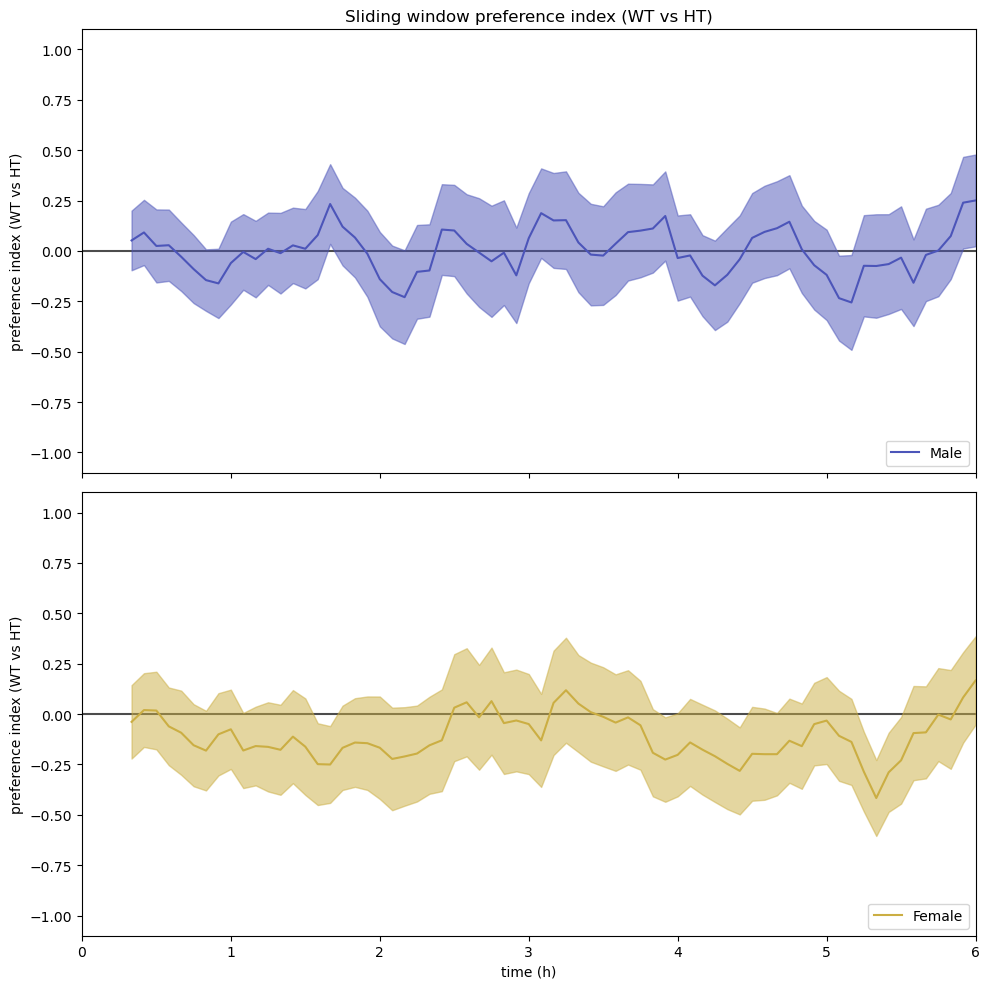

In [1102]:
preference_index_plot(sliding_cmltv_DF, NC_chambertime, mode = 'sex', PI = 'genotype', yaxis = 'sliding')

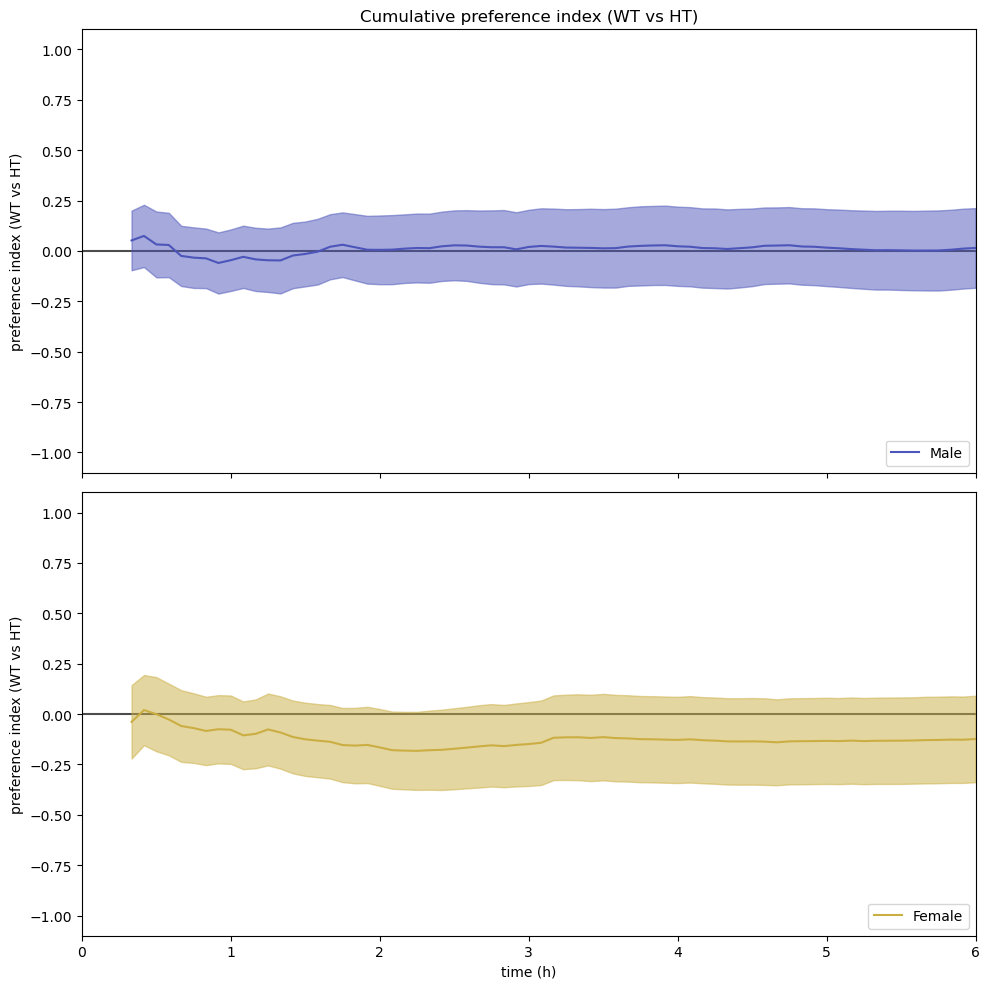

In [1103]:
preference_index_plot(sliding_cmltv_DF, NC_chambertime, mode = 'sex', PI = 'genotype', yaxis = 'cmltv')

/opt/anaconda3/envs/environment/lib/python3.9/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


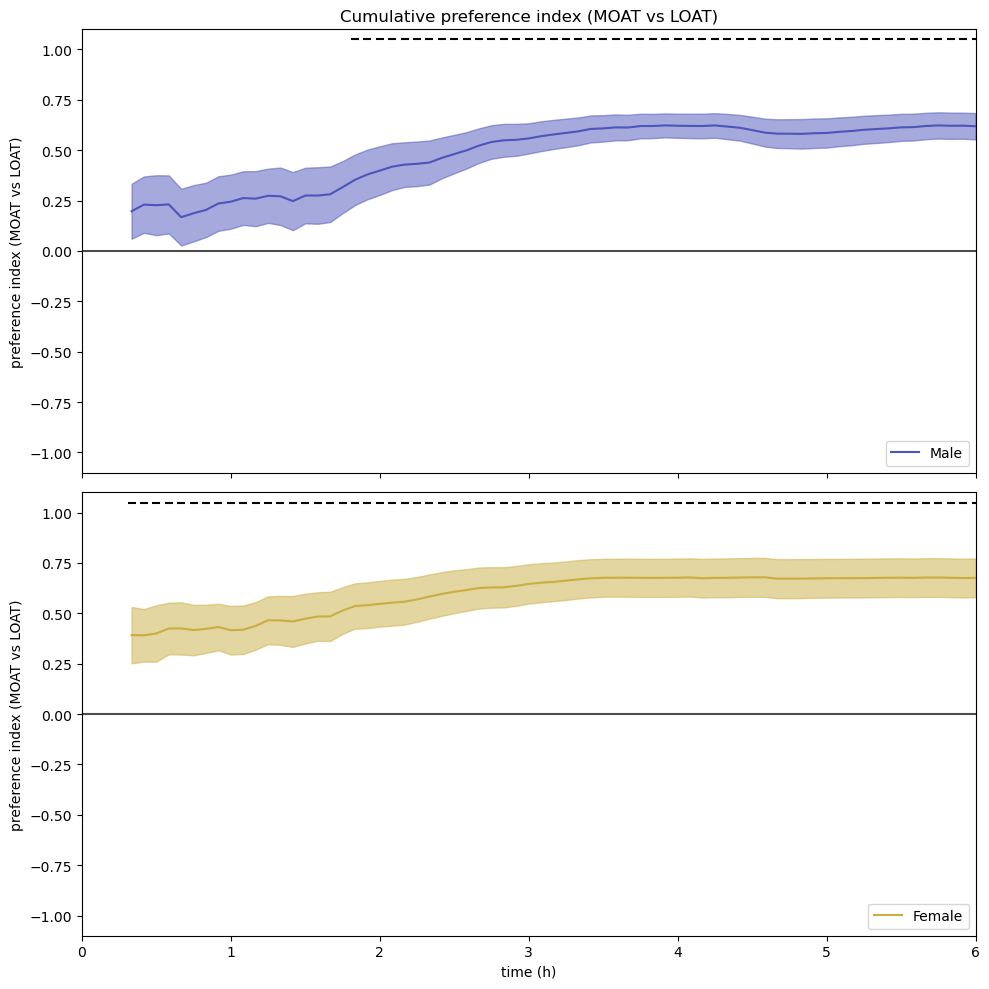

In [1113]:
preference_index_plot(sliding_cmltv_DF, NC_chambertime, mode = 'sex', PI = 'moat', yaxis = 'cmltv')

/opt/anaconda3/envs/environment/lib/python3.9/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/envs/environment/lib/python3.9/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


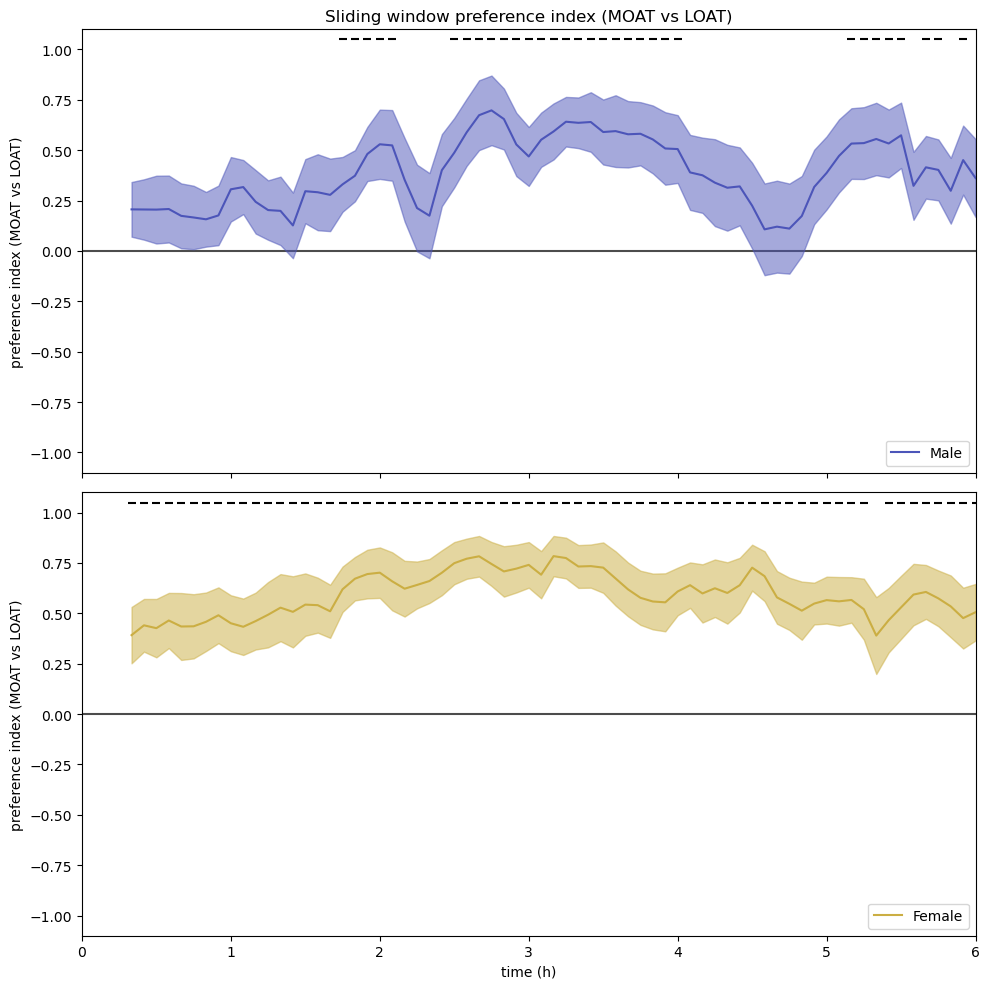

In [1104]:
preference_index_plot(sliding_cmltv_DF, NC_chambertime, mode = 'sex', PI = 'moat', yaxis = 'sliding')

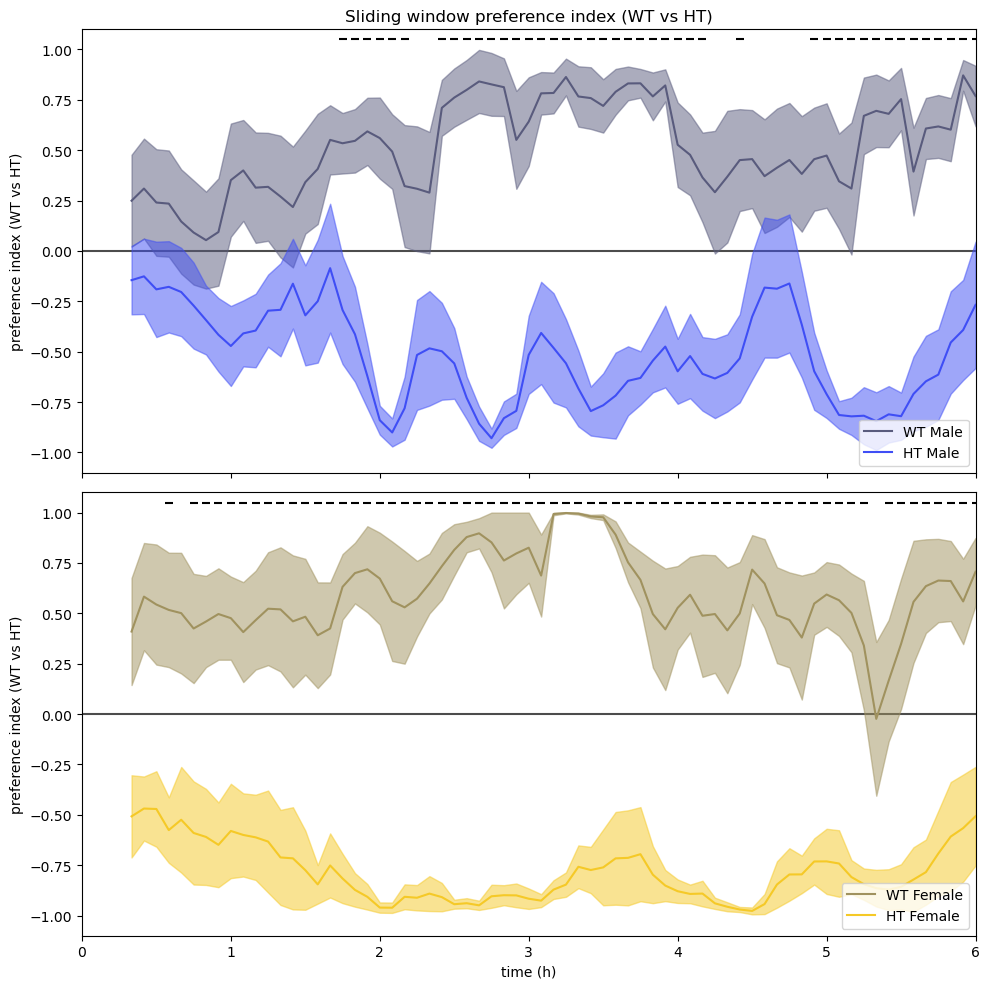

In [1109]:
preference_index_plot(sliding_cmltv_DF, NC_chambertime, mode = 'genotype', PI = 'genotype', yaxis = 'sliding')

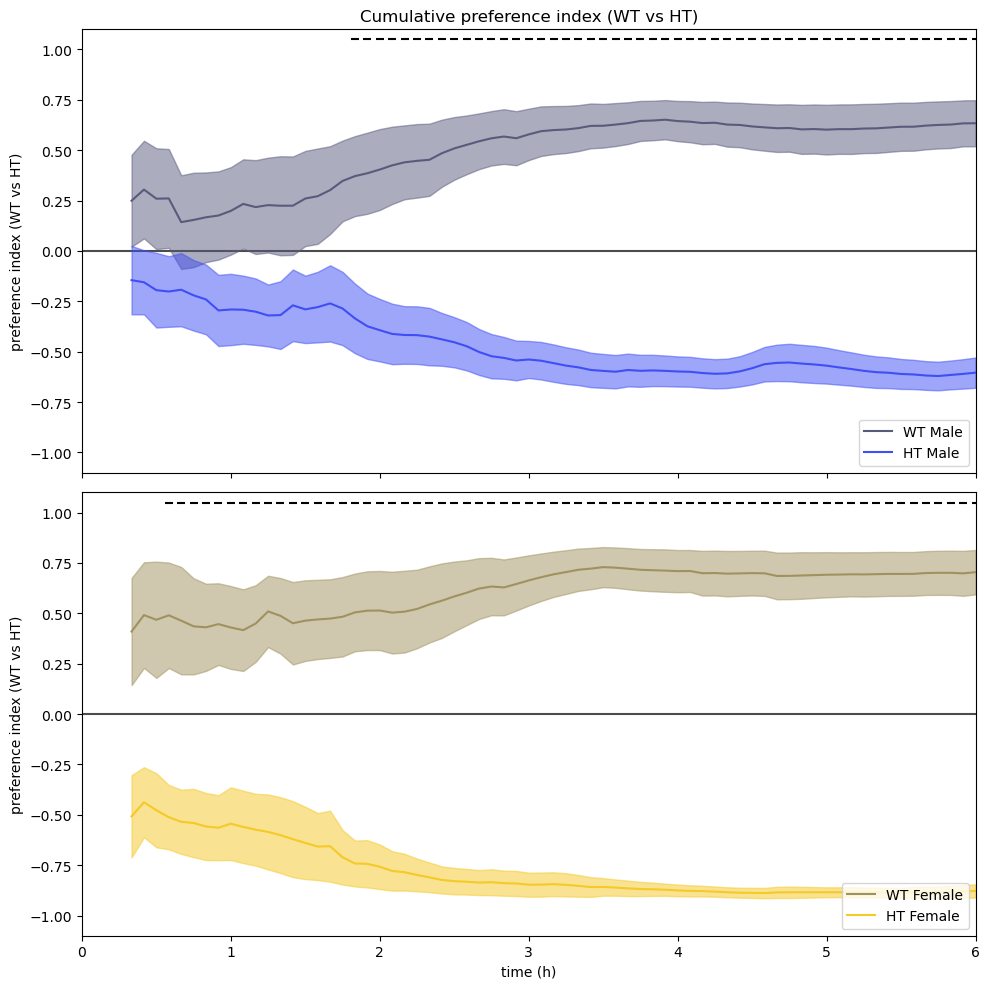

In [1110]:
preference_index_plot(sliding_cmltv_DF, NC_chambertime, mode = 'genotype', PI = 'genotype', yaxis = 'cmltv')

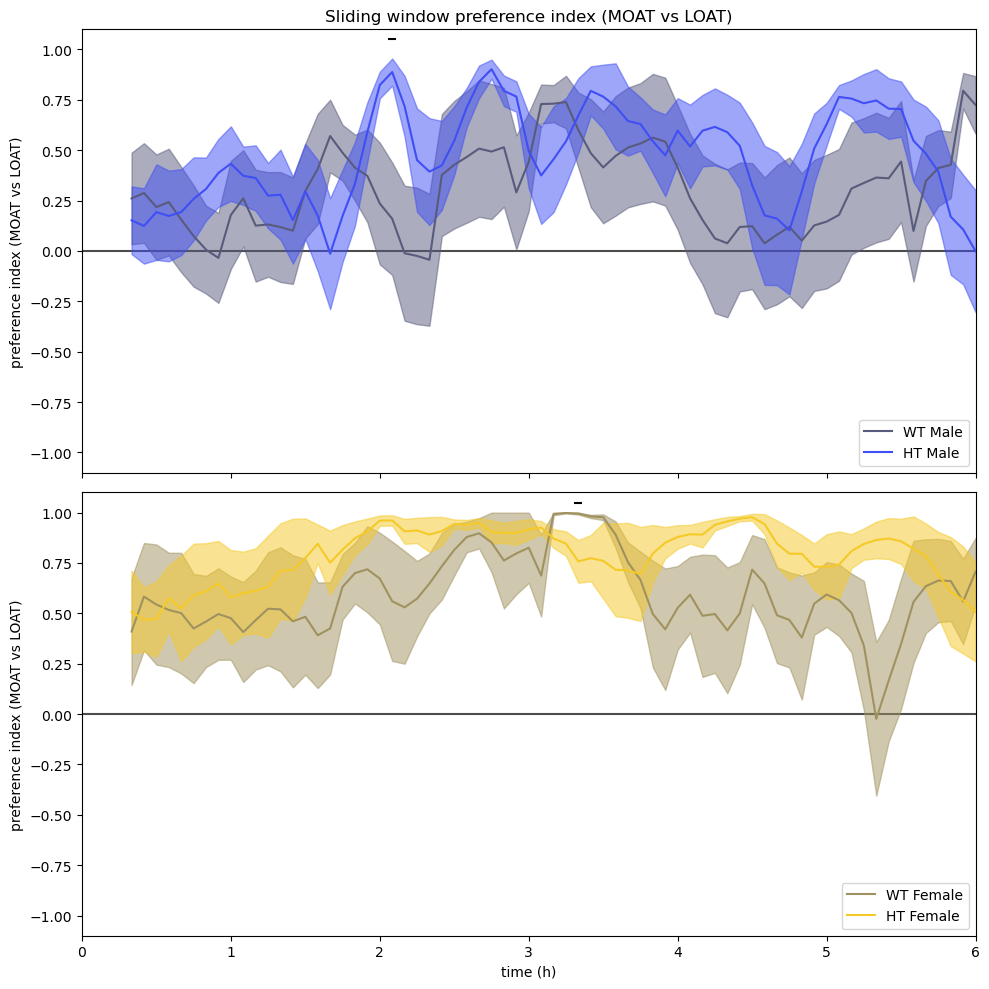

In [1111]:
preference_index_plot(sliding_cmltv_DF, NC_chambertime, mode = 'genotype', PI = 'moat', yaxis = 'sliding')

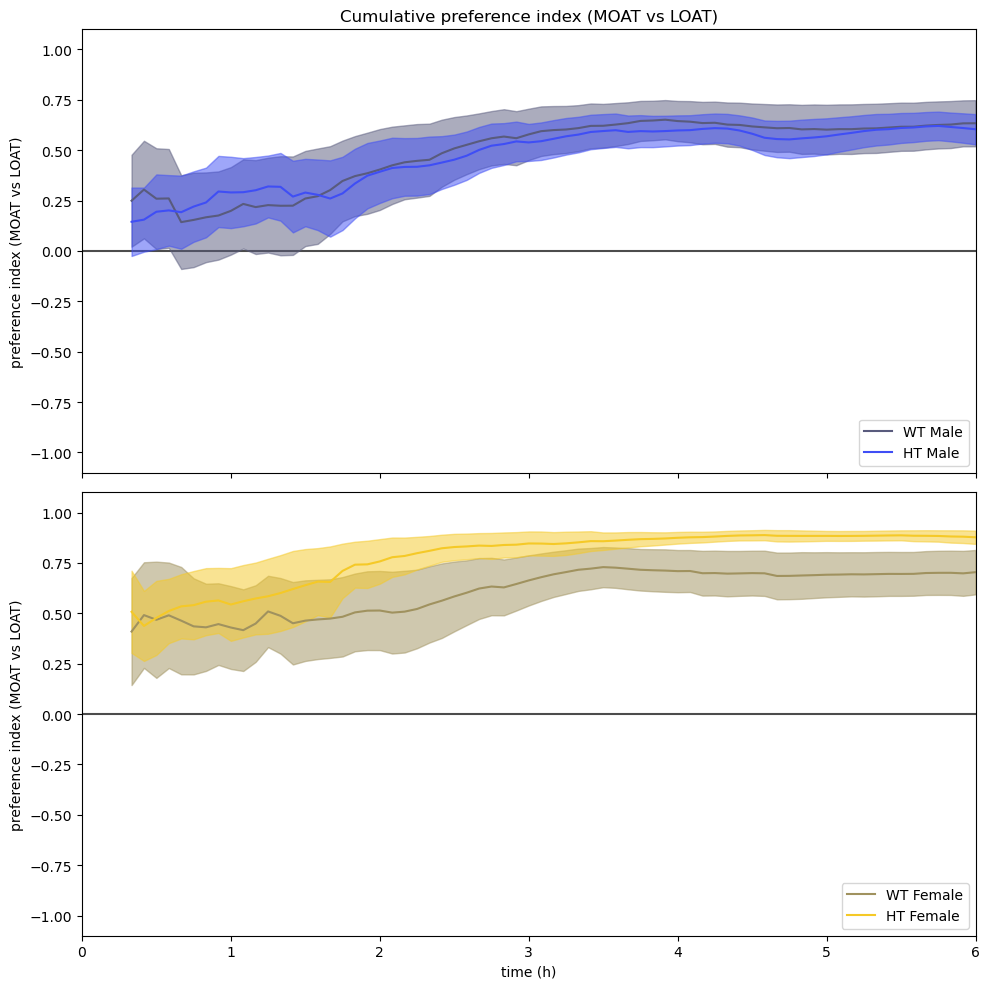

In [1112]:
preference_index_plot(sliding_cmltv_DF, NC_chambertime, mode = 'genotype', PI = 'moat', yaxis = 'cmltv')